### **DATA CLEANING AND PREPROCESSING**

In [97]:
# Importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import LabelEncoder

In [98]:
# Define file path and chunk size
TRAIN_FILE_PATH = r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Raw\new_train_sample.csv"  
TEST_FILE_PATH = r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Raw\GUIDE_Test.csv"
CHUNK_SIZE = 50000  

In [99]:
# Function to load a large dataset easily
def data_loader(file_path, chunksize=CHUNK_SIZE):
    """
    Loads a large CSV file efficiently in chunks, cleans it, and combines it into a single DataFrame.

    Args:
        file_path (str): Path to the CSV file to be loaded.
        chunksize (int): Number of rows per chunk to load into memory. Default is CHUNK_SIZE.

    Returns: 
        DataFrame: A cleaned, combined DataFrame with all chunks concatenated.
    """

    chunk_list = []  # List to store processed chunks

    for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
        chunk = chunk.drop(columns=['Unnamed: 0'], errors='ignore')
        chunk_list.append(chunk)  # Append each chunk to the list
    
    # Combine all chunks into a single DataFrame
    full_data = pd.concat(chunk_list, ignore_index=True)
    return full_data

### **TRAIN DATA**

In [100]:
# Load the full training dataset
train_data = data_loader(TRAIN_FILE_PATH)
pd.set_option('display.max_columns', None)
train_data.head() 

Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1709396985476     26       18583   687462  2024-06-06T05:56:47.000Z   
1   927712939180     33        5065     3990  2024-06-03T10:45:09.000Z   
2  1090921697002    201      150787   807590  2024-06-13T03:36:40.000Z   
3  1434519079555    204      108287    28575  2024-06-08T16:54:57.000Z   
4  1005022347708     54      528202  1458226  2024-06-09T02:48:01.000Z   

   DetectorId  AlertTitle            Category  \
0          31         813             Malware   
1          38          25              Impact   
2         419         444           Execution   
3          44        1233  SuspiciousActivity   
4         102       58829        Exfiltration   

                                     MitreTechniques   IncidentGrade  \
0                                                NaN  BenignPositive   
1                                                NaN  BenignPositive   
2  T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...  BenignPositive   
3                                                NaN    TruePositive   
4                                                NaN  BenignPositive   

  ActionGrouped ActionGranular EntityType EvidenceRole  DeviceId  Sha256  \
0           NaN            NaN       File      Related     98799    1296   
1           NaN            NaN    Machine     Impacted     98799  138268   
2           NaN            NaN    Machine     Impacted     98799  138268   
3           NaN            NaN       File      Related     98799  138268   
4           NaN            NaN       File     Impacted     98799  138268   

   IpAddress     Url  AccountSid  AccountUpn  AccountObjectId  AccountName  \
0     360606  160396      441377      673934           425863       453297   
1     360606  160396      441377      673934           425863       453297   
2     360606  160396      441377      673934           425863       453297   
3     360606  160396      441377      673934           425863       453297   
4     360606  160396      441377      673934           425863       453297   

   DeviceName  NetworkMessageId  EmailClusterId  RegistryKey  \
0      153085            529644             NaN         1631   
1        3142            529644             NaN         1631   
2        4181            529644             NaN         1631   
3      153085            529644             NaN         1631   
4      153085            529644             NaN         1631   

   RegistryValueName  RegistryValueData  ApplicationId  ApplicationName  \
0                635                860           2251             3421   
1                635                860           2251             3421   
2                635                860           2251             3421   
3                635                860           2251             3421   
4                635                860           2251             3421   

   OAuthApplicationId ThreatFamily  FileName  FolderPath  ResourceIdName  \
0                 881       Casdet      4132        4227            3586   
1                 881          NaN    289573      117668            3586   
2                 881          NaN    289573      117668            3586   
3                 881          NaN     97007        9177            3586   
4                 881          NaN     39978      114449            3586   

  ResourceType        Roles  OSFamily  OSVersion AntispamDirection  \
0          NaN          NaN         5         66               NaN   
1          NaN          NaN         5         66               NaN   
2          NaN  Destination         5         66               NaN   
3          NaN          NaN         5         66               NaN   
4          NaN          NaN         5         66               NaN   

  SuspicionLevel LastVerdict  CountryCode  State   City  
0     Suspicious   Malicious          242   1445  10630  
1            NaN         NaN          242   1445  10630  
2            NaN         Na

In [101]:
# Basic Exploration
print(f"Dataset shape: {train_data.shape}\n")
print("Columns in the dataset:")
print(train_data.columns)

Dataset shape: (4758418, 45)

Columns in the dataset:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [102]:
print("Data type of columns in the dataset:")
print(train_data.dtypes)

Data type of columns in the dataset:
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
Fil

In [103]:
# Display distribution of target variable
print("\n--- TARGET VARIABLE DISTRIBUTION ---")
print(train_data['IncidentGrade'].value_counts(), '\n')
print(train_data['IncidentGrade'].value_counts(normalize=True) * 100)


--- TARGET VARIABLE DISTRIBUTION ---
IncidentGrade
BenignPositive    2054774
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64 

IncidentGrade
BenignPositive    43.417050
TruePositive      35.119636
FalsePositive     21.463313
Name: proportion, dtype: float64


In [104]:
# Check for missing values
print("\n--- MISSING VALUES DATA ---")
missing = train_data.isnull().sum()
missing_percent = (missing / len(train_data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))


--- MISSING VALUES DATA ---
                   Missing Values  Missing Percentage
ResourceType              4754863           99.925290
ActionGranular            4730205           99.407093
ActionGrouped             4730205           99.407093
ThreatFamily              4721038           99.214445
EmailClusterId            4710241           98.987542
AntispamDirection         4669846           98.138625
Roles                     4649117           97.702997
SuspicionLevel            4037145           84.842168
LastVerdict               3642221           76.542687
MitreTechniques           2733136           57.437913
IncidentGrade               25775            0.541672


In [105]:
# DATA CLEANING
print("\n--- DATA CLEANING ---")

# Create a copy of the dataframe for cleaning
clean_df = train_data.copy()

# Drop columns with >50% missing values
print("Dropping columns with >50% missing values...")
clean_df = clean_df.drop(missing_percent[missing_percent > 50].index, axis=1)

# Drop rows with null values in target variable 
print("Dropping rows with null values in target variable ...")
clean_df = clean_df.dropna(subset=['IncidentGrade'])

# Convert Timestamp to datetime if it's not already
if clean_df['Timestamp'].dtype == 'object':
    print("Converting Timestamp to datetime...")
    clean_df['Timestamp'] = pd.to_datetime(clean_df['Timestamp'], errors='coerce')
    
    # Extract time-related features
    print("Extracting time-related features...")
    clean_df['Hour'] = clean_df['Timestamp'].dt.hour
    clean_df['Day'] = clean_df['Timestamp'].dt.day
    clean_df['DayOfWeek'] = clean_df['Timestamp'].dt.dayofweek
    clean_df['Month'] = clean_df['Timestamp'].dt.month
    clean_df['Year'] = clean_df['Timestamp'].dt.year
    clean_df = clean_df.drop('Timestamp', axis=1)

# Remove duplicates if any
duplicates = clean_df.duplicated().sum()
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    clean_df = clean_df.drop_duplicates()

print(f"Shape after cleaning: {clean_df.shape}")


--- DATA CLEANING ---
Dropping columns with >50% missing values...
Dropping rows with null values in target variable ...
Converting Timestamp to datetime...
Extracting time-related features...
Removing 155243 duplicate rows...
Shape after cleaning: (4577400, 39)


### **EDA**

In [106]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577400 entries, 0 to 4758417
Data columns (total 39 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

In [107]:
clean_df.describe().T

count          mean           std     min  \
Id                  4577400.0  8.419716e+11  4.965472e+11     0.0   
OrgId               4577400.0  1.730889e+02  3.731760e+02     0.0   
IncidentId          4577400.0  6.973234e+04  1.203110e+05     0.0   
AlertId             4577400.0  4.110693e+05  4.605476e+05     0.0   
DetectorId          4577400.0  1.096099e+02  4.252050e+02     0.0   
AlertTitle          4577400.0  2.862698e+03  1.106618e+04     0.0   
DeviceId            4577400.0  9.556584e+04  1.659709e+04     0.0   
Sha256              4577400.0  1.283791e+05  3.454983e+04     0.0   
IpAddress           4577400.0  2.829348e+05  1.430936e+05     0.0   
Url                 4577400.0  1.506187e+05  3.711049e+04     0.0   
AccountSid          4577400.0  3.544669e+05  1.651846e+05     0.0   
AccountUpn          4577400.0  4.717130e+05  2.874341e+05     0.0   
AccountObjectId     4577400.0  3.429710e+05  1.586342e+05     0.0   
AccountName         4577400.0  3.588808e+05  1.732754e+05     0.0   
DeviceName          4577400.0  1.428748e+05  3.666529e+04     0.0   
NetworkMessageId    4577400.0  4.829440e+05  1.381830e+05     0.0   
RegistryKey         4577400.0  1.628050e+03  6.814881e+01     0.0   
RegistryValueName   4577400.0  6.347218e+02  1.287077e+01     0.0   
RegistryValueData   4577400.0  8.595315e+02  1.950382e+01     0.0   
ApplicationId       4577400.0  2.198992e+03  3.377066e+02     0.0   
ApplicationName     4577400.0  3.339762e+03  5.199114e+02     0.0   
OAuthApplicationId  4577400.0  8.807908e+02  1.307672e+01     0.0   
FileName            4577400.0  2.612549e+05  8.284195e+04     0.0   
FolderPath          4577400.0  1.072358e+05  3.275077e+04     0.0   
ResourceIdName      4577400.0  3.583357e+03  9.241788e+01     0.0   
OSFamily            4577400.0  4.895628e+00  7.133100e-01     0.0   
OSVersion           4577400.0  6.461704e+01  9.444711e+00     0.0   
CountryCode         4577400.0  2.230627e+02  6.374760e+01     0.0   
State               4577400.0  1.348427e+03  3.562757e+02     0.0   
City                4577400.0  9.913553e+03  2.645918e+03     0.0   
Hour                4577400.0  1.215379e+01  6.773679e+00     0.0   
Day                 4577400.0  9.813268e+00  6.229133e+00     1.0   
DayOfWeek           4577400.0  2.491206e+00  1.860505e+00     0.0   
Month               4577400.0  5.906433e+00  2.947794e-01     1.0   
Year                4577400.0  2.024000e+03  4.258197e-03  2023.0   

                             25%           50%           75%           max  
Id                  4.123169e+11  8.418136e+11  1.271310e+12  1.709397e+12  
OrgId               9.000000e+00  4.200000e+01  1.610000e+02  6.129000e+03  
IncidentId          4.630000e+02  9.215000e+03  8.201100e+04  5.997030e+05  
AlertId             2.135500e+04  2.218820e+05  6.850460e+05  1.721456e+06  
DetectorId          2.000000e+00  9.000000e+00  4.600000e+01  9.522000e+03  
AlertTitle          2.000000e+00  1.300000e+01  1.950000e+02  1.131730e+05  
DeviceId            9.879900e+04  9.879900e+04  9.879900e+04  9.879900e+04  
Sha256              1.382680e+05  1.382680e+05  1.382680e+05  1.382680e+05  
IpAddress           3.606060e+05  3.606060e+05  3.606060e+05  3.606060e+05  
Url                 1.603960e+05  1.603960e+05  1.603960e+05  1.603960e+05  
AccountSid          4.413770e+05  4.413770e+05  4.413770e+05  4.413770e+05  
AccountUpn          1.077420e+05  6.739340e+05  6.739340e+05  6.739340e+05  
AccountObjectId     4.258630e+05  4.258630e+05  4.258630e+05  4.258630e+05  
AccountName         4.532970e+05  4.532970e+05  4.532970e+05  4.532970e+05  
DeviceName          1.530850e+05  1.530850e+05  1.530850e+05  1.530850e+05  
NetworkMessageId    5.296440e+05  5.296440e+05  5.296440e+05  5.296440e+05  
RegistryKey         1.631000e+03  1.631000e+03  1.631000e+03  1.631000e+03  
RegistryValueName   6.350000e+02  6.350000e+02  6.350000e+02  6.350000e+02  
RegistryValueData   8.600000e+02  8.600000e+02  8.600000e+02  8.600000e+02  

In [108]:
clean_df.nunique()

Id                     642342
OrgId                    5236
IncidentId             421530
AlertId               1150459
DetectorId               7369
AlertTitle              74710
Category                   20
IncidentGrade               3
EntityType                 31
EvidenceRole                2
DeviceId                55204
Sha256                  73078
IpAddress              195384
Url                     85332
AccountSid             265788
AccountUpn             394186
AccountObjectId        257733
AccountName            272375
DeviceName              80956
NetworkMessageId       260032
RegistryKey               937
RegistryValueName         401
RegistryValueData         496
ApplicationId            1003
ApplicationName          1610
OAuthApplicationId        416
FileName               142641
FolderPath              59652
ResourceIdName           1497
OSFamily                    6
OSVersion                  48
CountryCode               212
State                    1197
City      

In [109]:
num_features = [feature for feature in clean_df.columns if clean_df[feature].dtype != 'O']
num_features

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City',
 'Hour',
 'Day',
 'DayOfWeek',
 'Month',
 'Year']

In [110]:
cat_features = [feature for feature in clean_df.columns if clean_df[feature].dtype == 'O']
cat_features

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

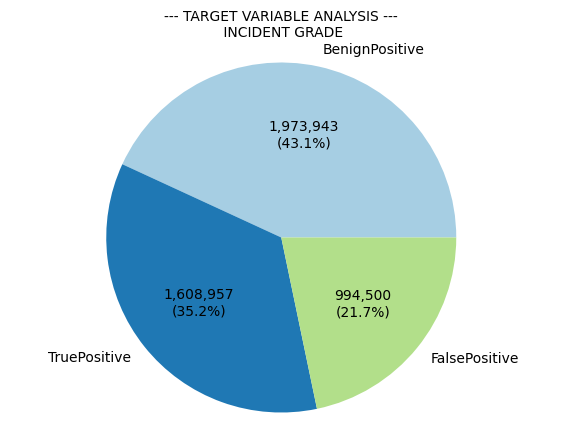

In [111]:
# TARGET VARIABLE ANALYSIS
grade_counts = clean_df['IncidentGrade'].value_counts()
def autopct_format(pct, sizes = grade_counts.values):
    count = int(round(pct/100.*sum(sizes)))
    return f"{count:,}\n({pct:.1f}%)"

plt.figure(figsize=(7, 5))
plt.pie(grade_counts, labels=grade_counts.index, autopct=lambda pct: autopct_format(pct), colors=plt.cm.Paired.colors)
plt.title('--- TARGET VARIABLE ANALYSIS ---\n INCIDENT GRADE', fontsize=10)
plt.axis('equal')
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots/target_variable.png", dpi=300, bbox_inches='tight') 
plt.show()

- The target variable (IncidentGrade) has 3 classes - False Positive, True Positive & Benign Positive (FP, TP & BP)
- There is visible class imbalance with BP class(43.1%) having twice as much data as the FP class(21.7%)

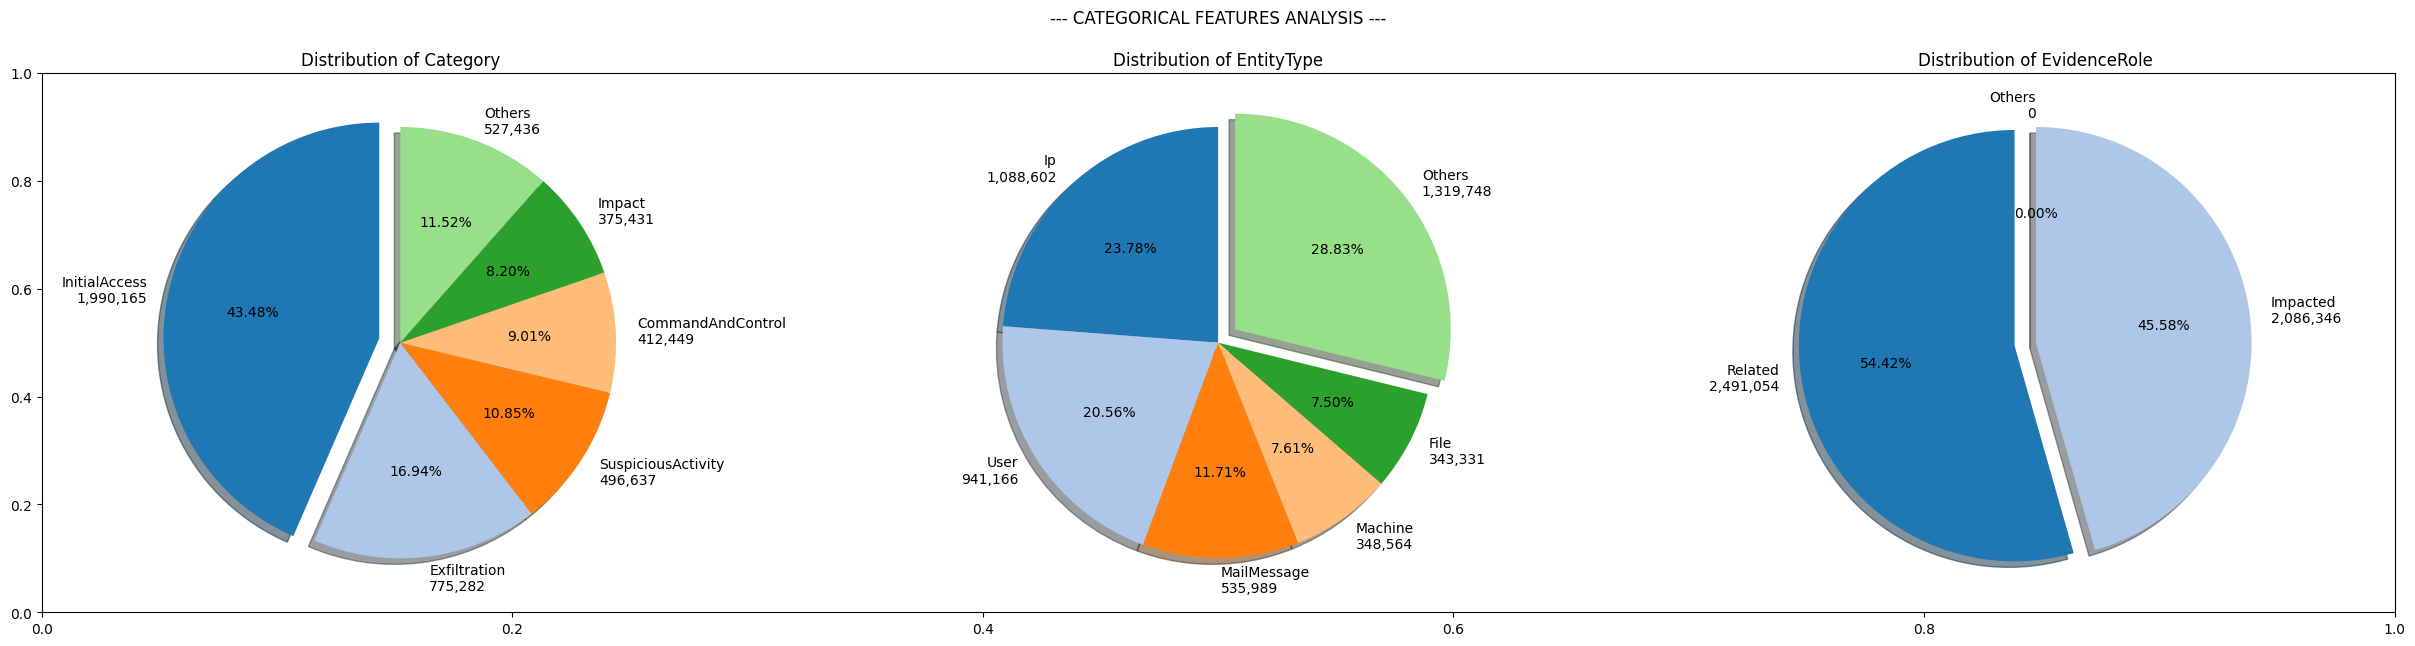

In [112]:
# CATEGORICAL FEATURES ANALYSIS
plt.figure(figsize=(25, 7))
plt.title("--- CATEGORICAL FEATURES ANALYSIS ---\n\n")

cols = ['Category', 'EntityType', 'EvidenceRole']
for i, col in enumerate(cols):
    value_counts = clean_df[col].value_counts()
    
    top_5 = value_counts.nlargest(5)
    others = value_counts.iloc[5:].sum()
    top_5['Others'] = others
    
    labels = [f"{cat}\n{count:,}" for cat, count in top_5.items()]
    explode = [0.1 if cat == top_5.idxmax() else 0 for cat in top_5.index]
    colors = plt.cm.tab20.colors[:len(top_5)]

    # Plot pie chart
    plt.subplot(1, 3, i + 1)
    plt.title(f'\nDistribution of {col}')
    plt.pie(top_5, labels=labels, autopct='%2.2f%%', startangle=90, colors=colors, explode=explode, shadow=True)

plt.tight_layout()
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots/cat_feature_analysis.png", dpi=300, bbox_inches='tight') 
plt.show()

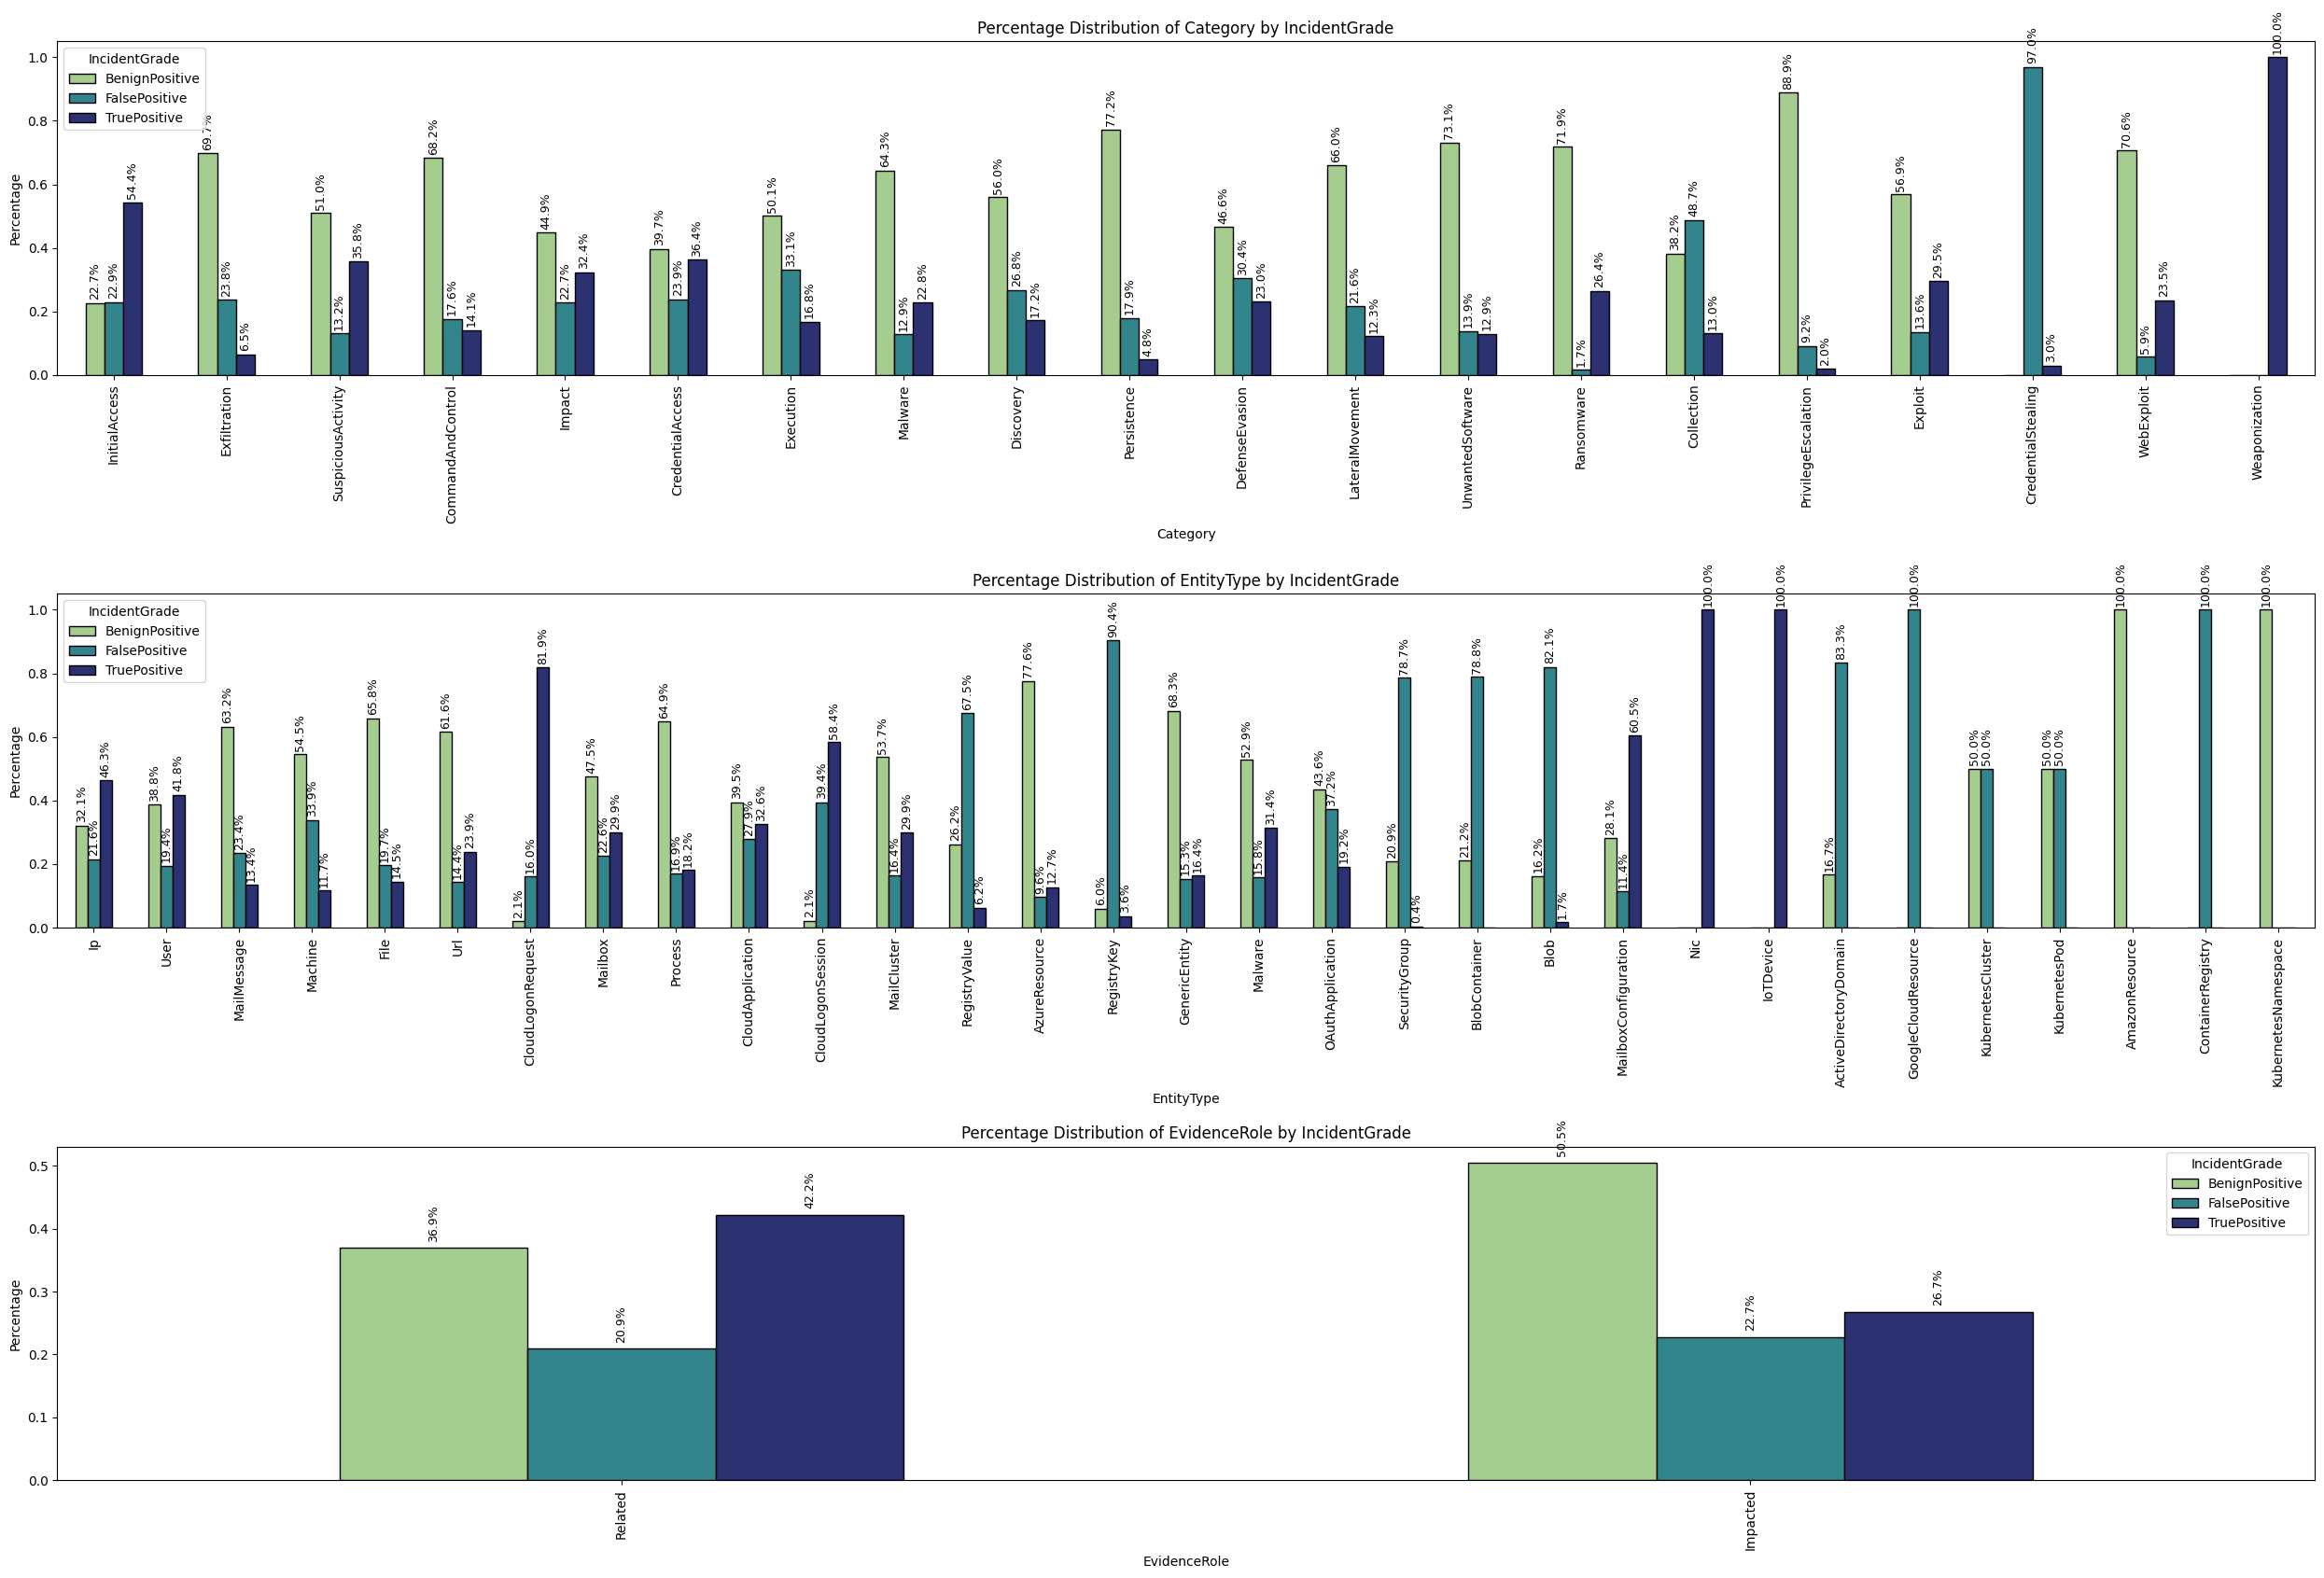

In [113]:
cols_to_plot = [col for col in cat_features if col != 'IncidentGrade']
fig, axes = plt.subplots(3, 1, figsize=(25, 17))
axes = axes.flatten()

for idx, col in enumerate(cols_to_plot): 
    cross_tab = pd.crosstab(clean_df[col], clean_df['IncidentGrade'], normalize='index')
    order = clean_df[col].value_counts().index
    cross_tab = cross_tab.loc[order]

    ax = cross_tab.plot(kind='bar', ax=axes[idx], cmap='crest', edgecolor='black', legend=True)

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', ha='center', va='bottom', fontsize=9, rotation=90)

    ax.set_title(f'Percentage Distribution of {col} by IncidentGrade')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots/cat_vs_target.png", dpi=300, bbox_inches='tight') 
plt.show()

##### **Distribution of CATEGORY**
- There are 20 unique categories of alerts with most incidents occuring in the top 5 categories being IntialAccess, Exfiltration, SuspiciousActivity, CommandAndControl & Impact. 
- The other incidents occur in the rest of the 15 categories but they are only 11.52% of the incidents.

##### **Distribution of ENTITYTYPE**
- There are 31 different types of entites with almost 45% of alerts coming from Ip & User entity types.
- The top 5 entity types ip, User, MailMessage, Machine & File contribute to more than 70% incidents & the rest 26 entity types contributing to almost 30% of incidents

##### **Distribution of EVIDENCEROLE**
- EvidenceRole has only 2 unique vaules with Related (54.42%) being the most occuring EvidenceRole in incidents followed by Impacted (45.58%) 

In [114]:
def plot_feature_distribution(df, feature_name, target_column='IncidentGrade', top_n=10, figsize=(25, 8), others_label='Others', title_prefix=None, cmap='crest', rotation=0):
    
    value_counts = df[feature_name].value_counts()
    top_categories = value_counts.nlargest(top_n).index.tolist()
    plot_order = top_categories + [others_label]
    
    mapped_feature = df[feature_name].apply(lambda x: x if x in top_categories else others_label)
    
    filtered_df = df.copy()
    mapped_column_name = f'Mapped_{feature_name}'
    filtered_df[mapped_column_name] = mapped_feature
    
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    if title_prefix is None:
        title_prefix = feature_name
    
    # ============ COUNT PLOT ============
    sns.countplot(data=filtered_df, x=mapped_column_name, order=plot_order, ax=ax[0], legend=False)
    
    total = len(filtered_df)
    for p in ax[0].patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax[0].annotate(f'{count:,}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., count), ha='center', va='bottom', fontsize=10)
    
    ax[0].set_title(f'Top {top_n} {title_prefix} & {others_label} - Count Distribution')
    ax[0].set_xlabel(title_prefix)
    ax[0].set_ylabel('Count')
    
    # ============ INCIDENT GRADE DISTRIBUTION PLOT ============
    feature_ct = pd.crosstab(filtered_df[mapped_column_name], filtered_df[target_column], normalize='index')
    safe_plot_order = [cat for cat in plot_order if cat in feature_ct.index]
    feature_ct = feature_ct.loc[safe_plot_order]
    feature_ct.plot(kind='bar', ax=ax[1], cmap=cmap)
    
    for container in ax[1].containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + 0.01, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10, rotation=90)
    
    ax[1].set_title(f'Top {top_n} {title_prefix} & {others_label} - {target_column} Distribution')
    ax[1].set_xlabel(title_prefix)
    ax[1].set_ylabel('Proportion')
    
    plt.setp(ax[0].get_xticklabels(), rotation=rotation)
    plt.setp(ax[1].get_xticklabels(), rotation=rotation)
    
    plt.tight_layout()
    plt.savefig(fr"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots\{feature_name.lower()}_analysis.png", dpi=300, bbox_inches='tight') 
    plt.show()

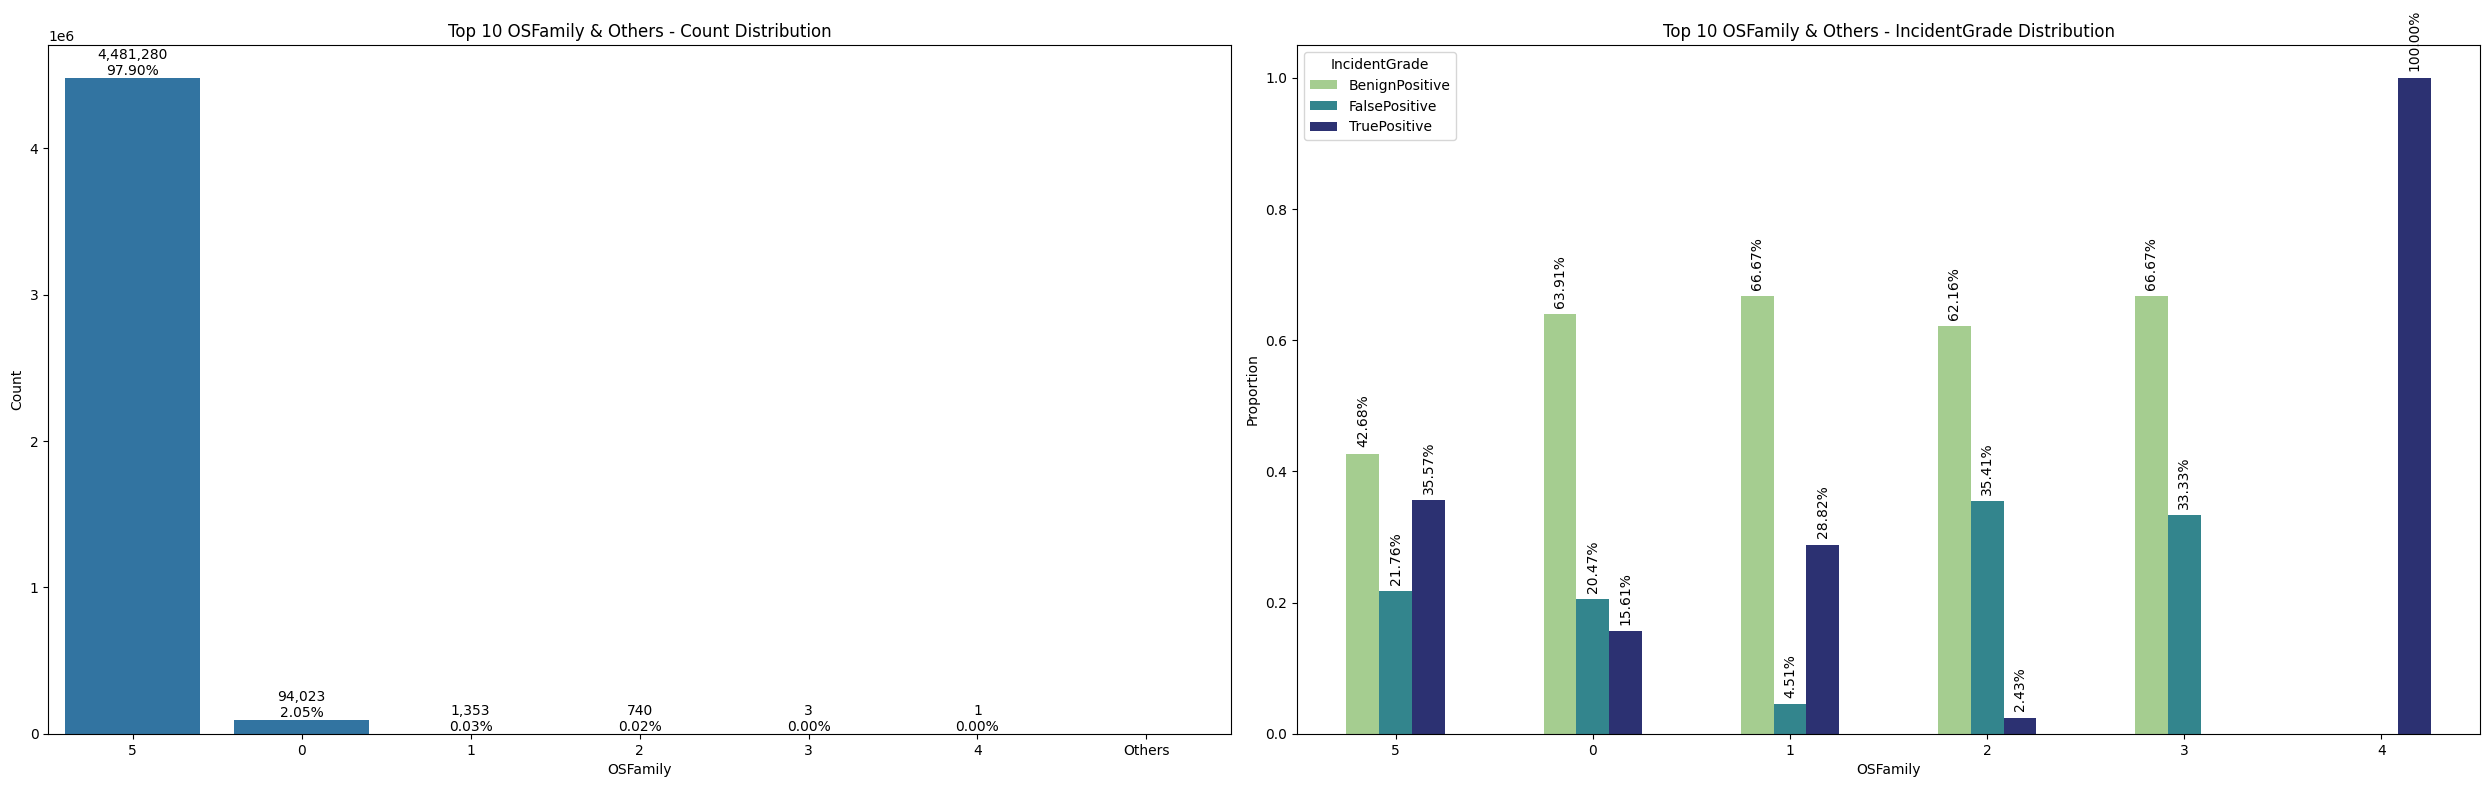

In [115]:
# OSFamily analysis
plot_feature_distribution(clean_df, 'OSFamily')

In [116]:
# OSFamily 5 Analysis
if 'OSFamily' in clean_df.columns and 'OSVersion' in clean_df.columns:
    osf_5 = clean_df[clean_df['OSFamily'] == 5]
    print(f"No. of OSVersions in OSFamily 5: {osf_5['OSVersion'].nunique()}")

    counts = osf_5['OSVersion'].value_counts()
    percentages = (counts / counts.sum()) * 100

    osf_5_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(osf_5_df)

No. of OSVersions in OSFamily 5: 1


Count  Percentage
OSVersion                     
66         4481280       100.0

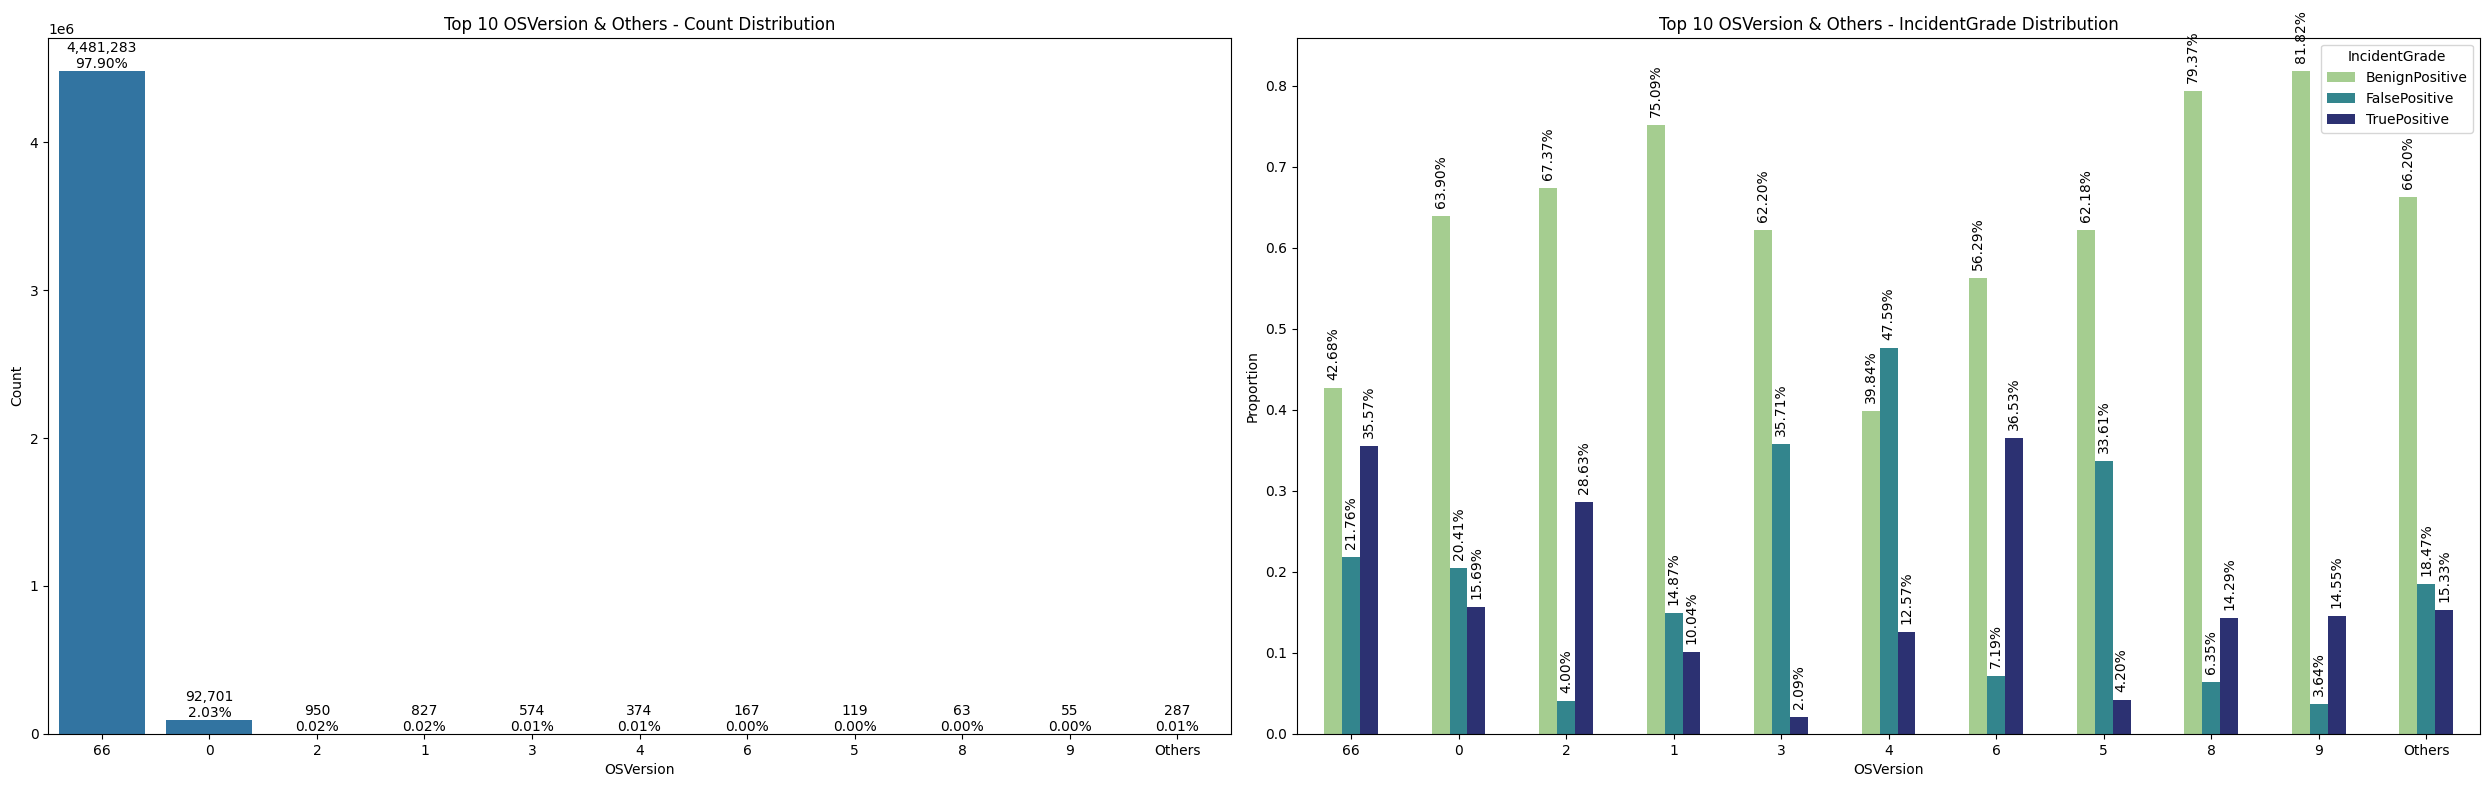

In [117]:
# OSVersion analysis
plot_feature_distribution(clean_df, 'OSVersion') 

##### **Distribution of OSFAMILY & OSVERSION**

***OSFamily***
- OSFamily distribution shows that almost 98% of the incidents occur in OSFamily 5 showing that most of attacks are focused on OSFamily 5 due to its dominance & it having a consistent OSVersion 66
- A significant portion of alerts on OS Family 5 are True Positives (35.6%), indicating real security incidents, but also a noteworthy number of False Positives (21.8%) 

***OSVersion***
- OSVersion 66 has almost 98% of incidents, all the other OSVersions just contribute close to 2.5% of incidents.
- All the other OSVersions except OSVersion 66 have > 50% of incidents as BP.
- In contrast, OSVersion 66 accounts for a significantly higher rate of TP/FP, suggesting it may represent higher operational risk, detection sensitivity, or adversarial targeting.

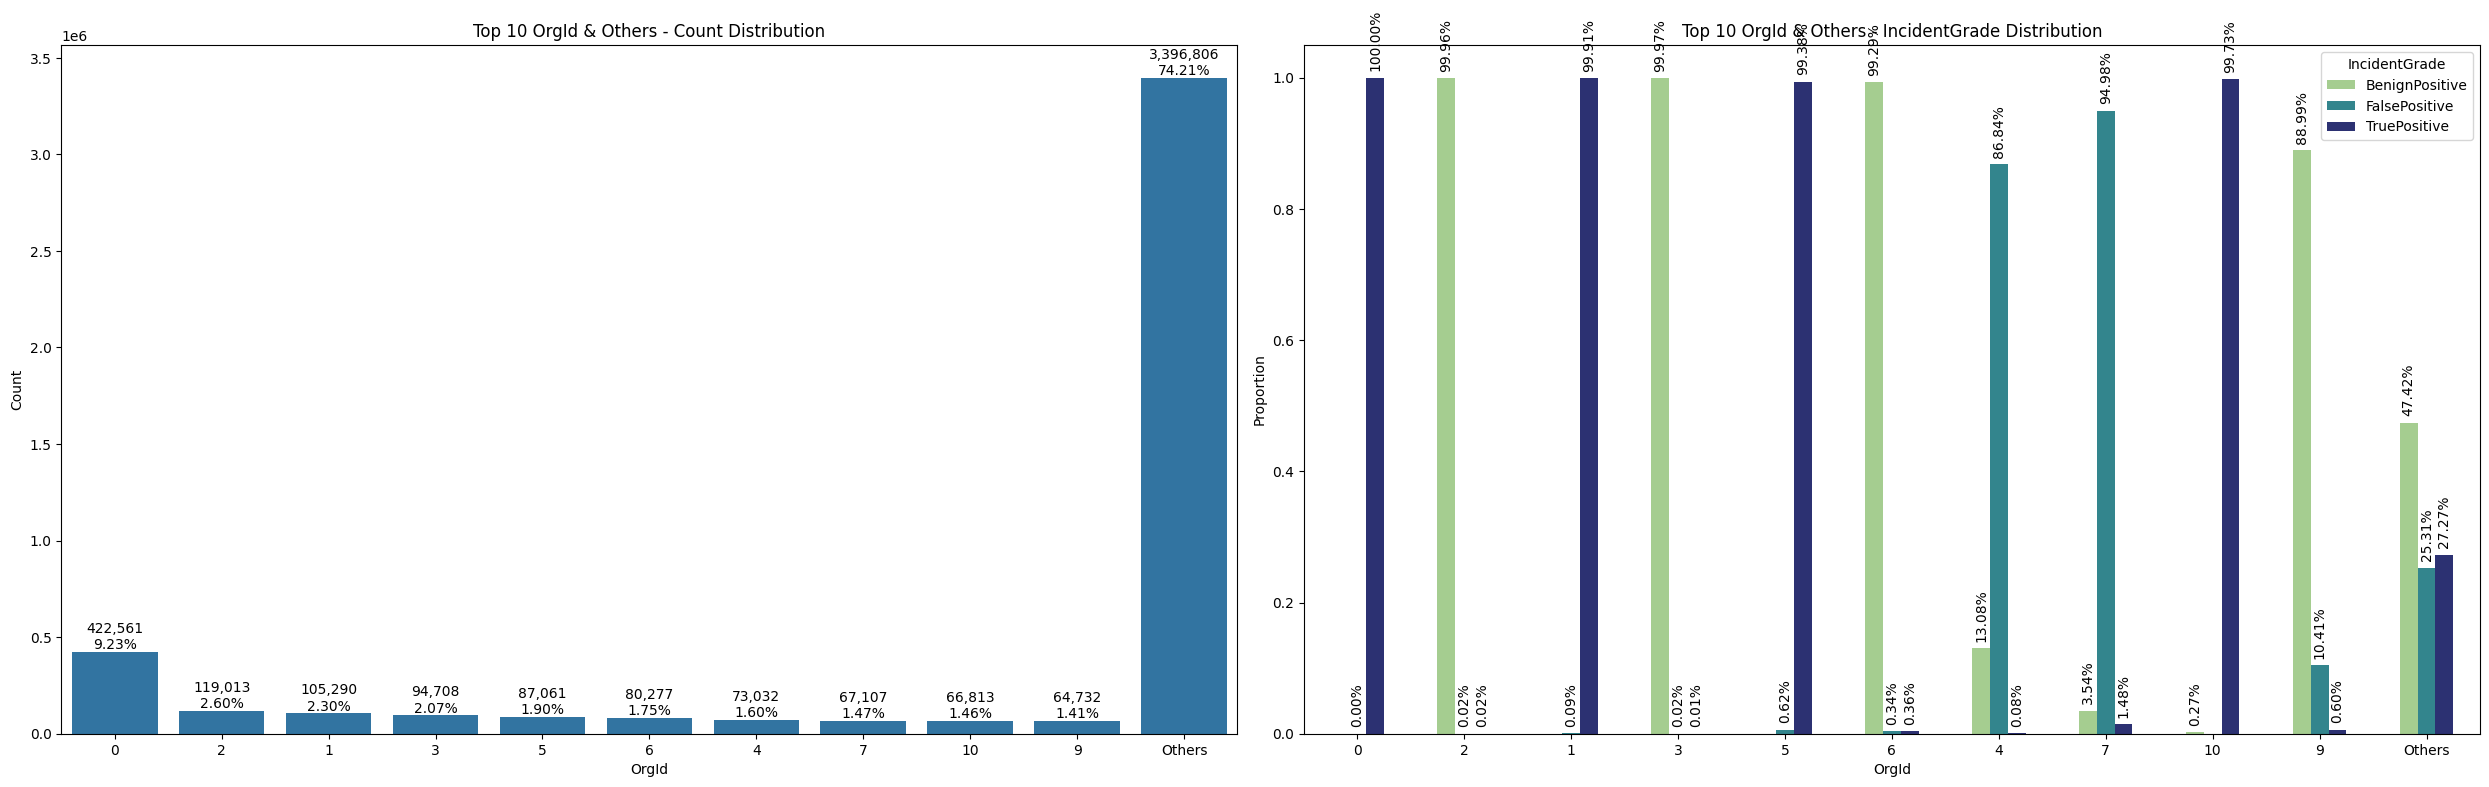

In [118]:
# OrgId analysis
plot_feature_distribution(clean_df, 'OrgId')

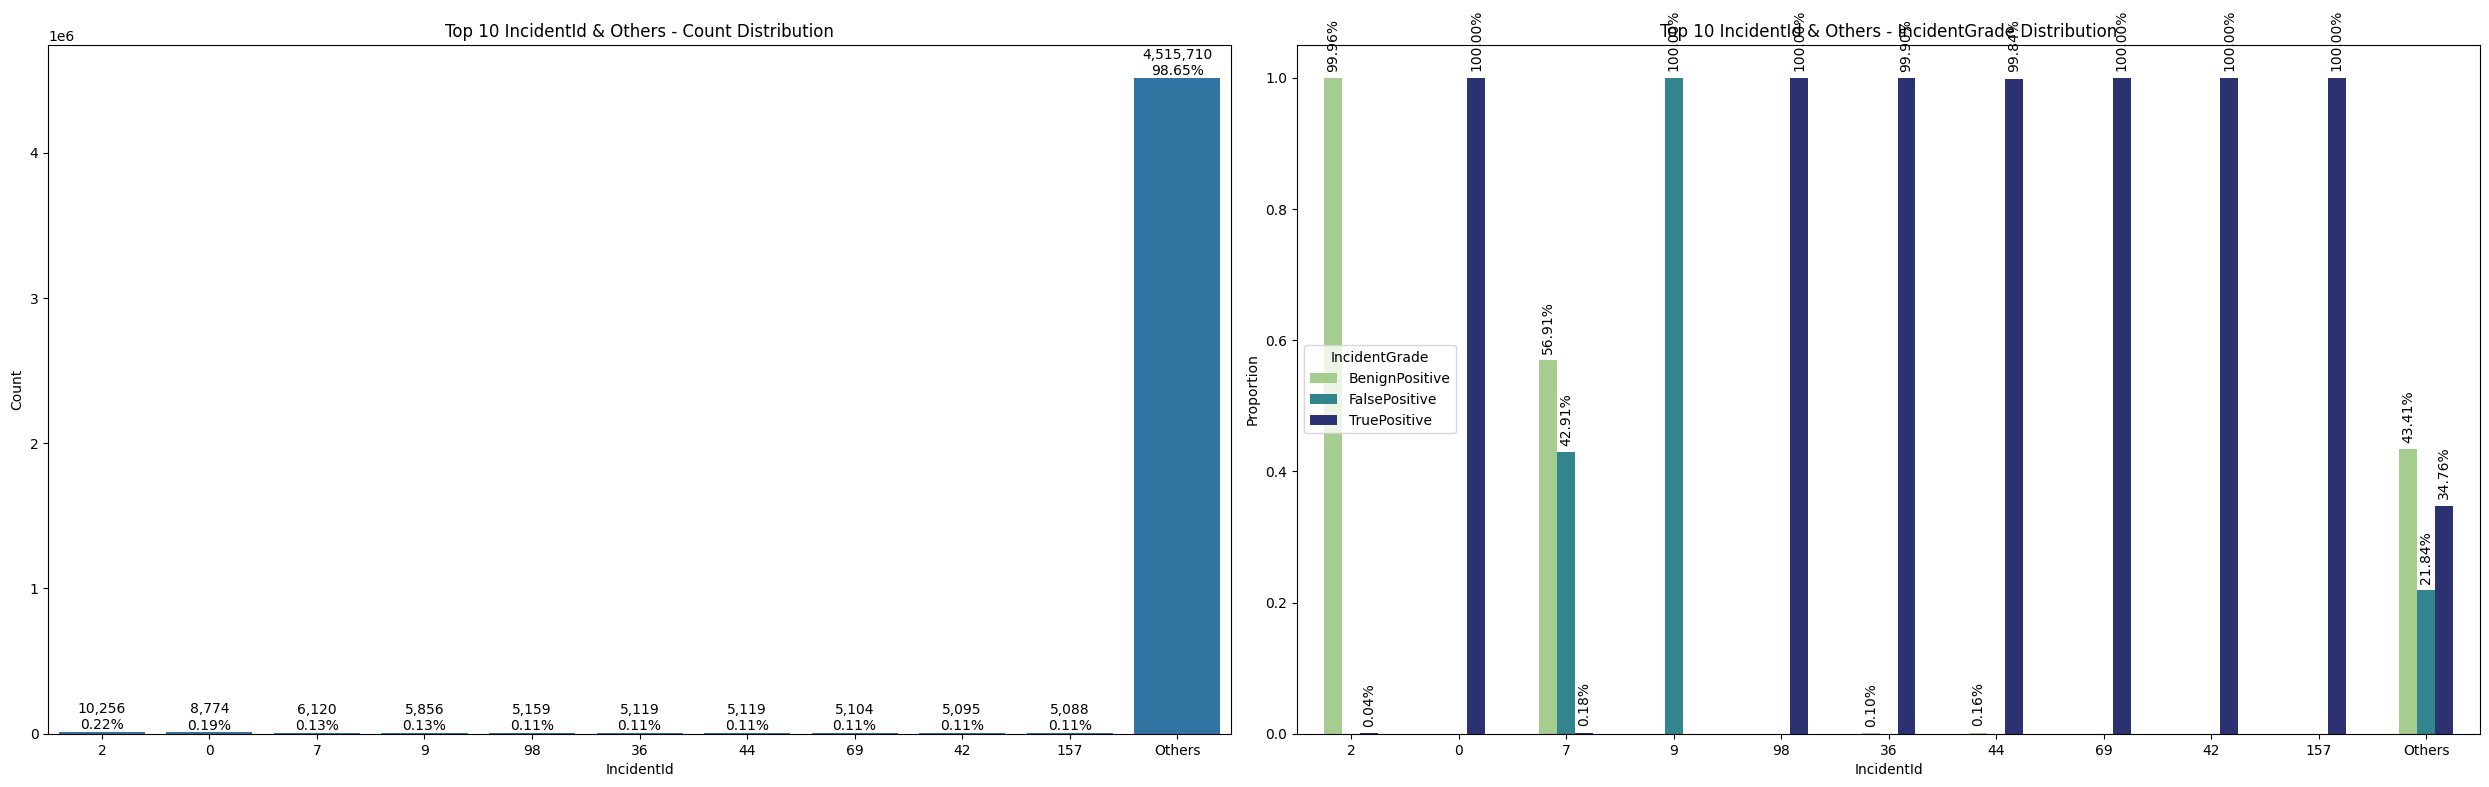

In [119]:
# IncidentId analysis
plot_feature_distribution(clean_df, 'IncidentId')

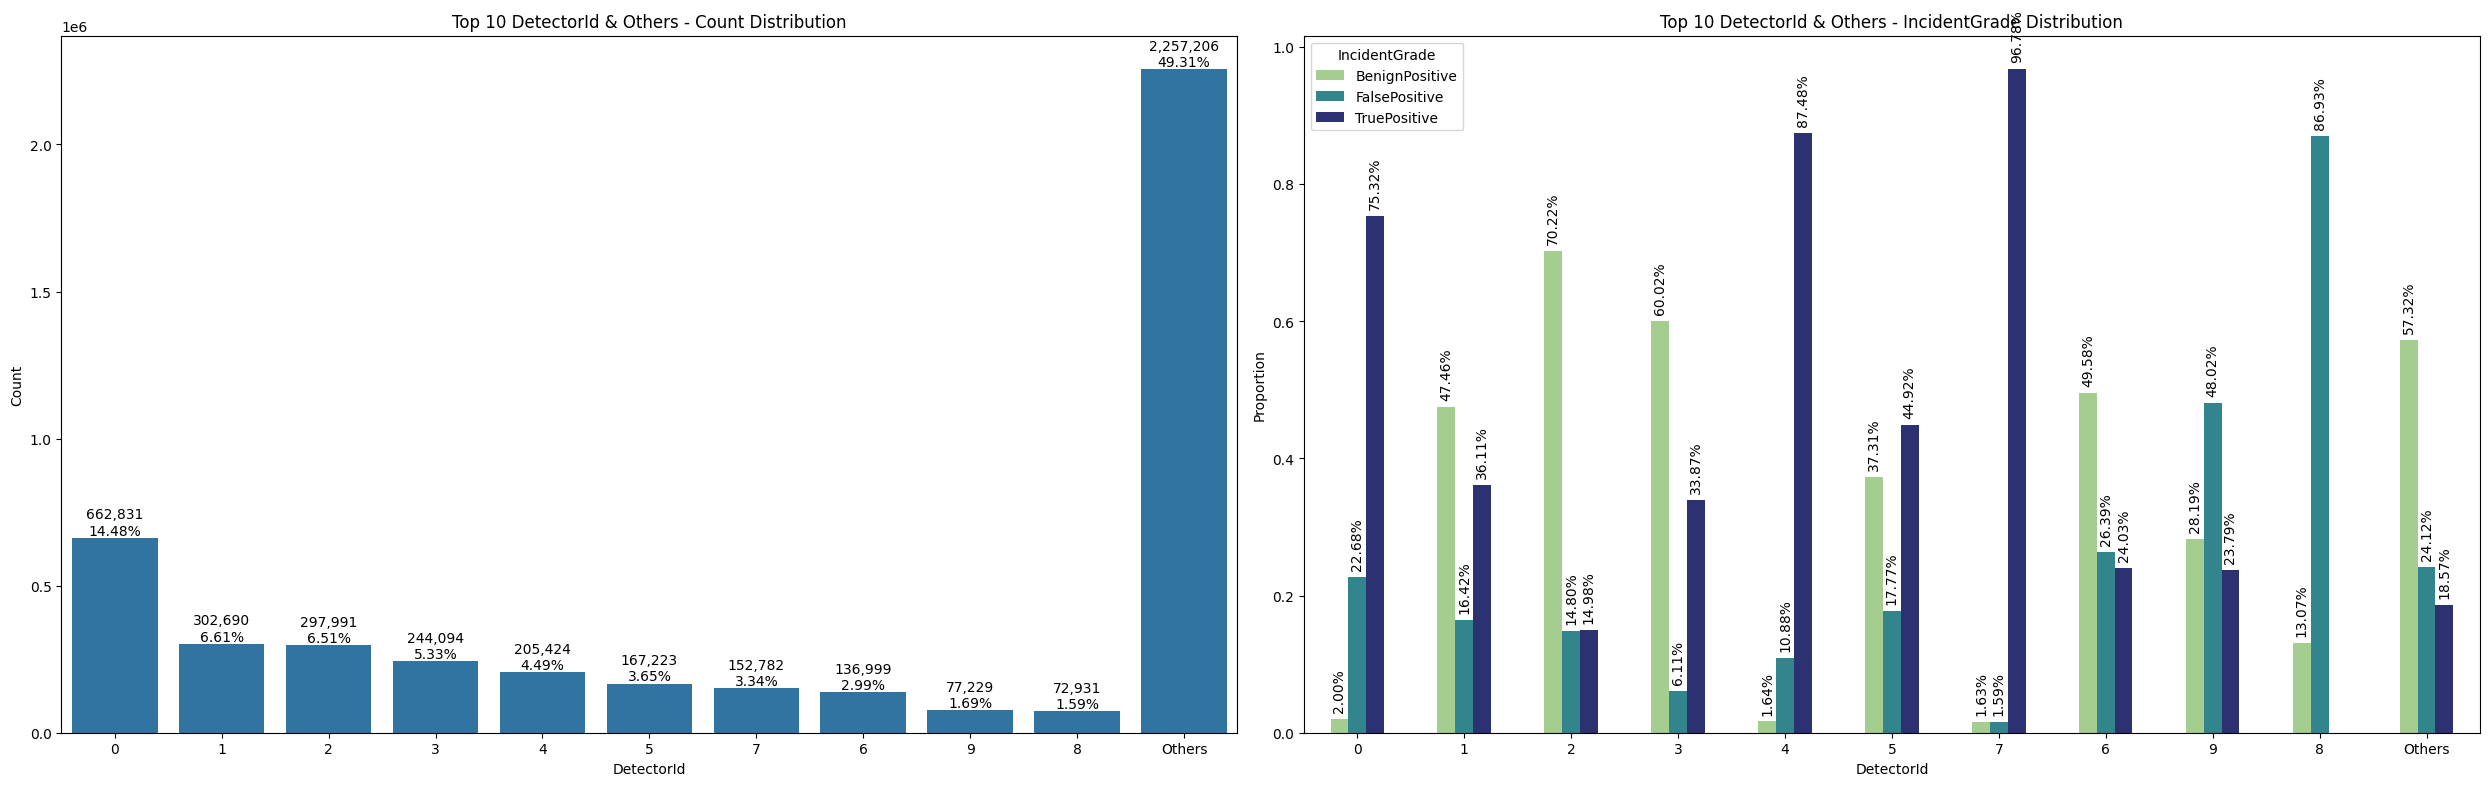

In [120]:
# DetectorId analysis
plot_feature_distribution(clean_df, 'DetectorId')

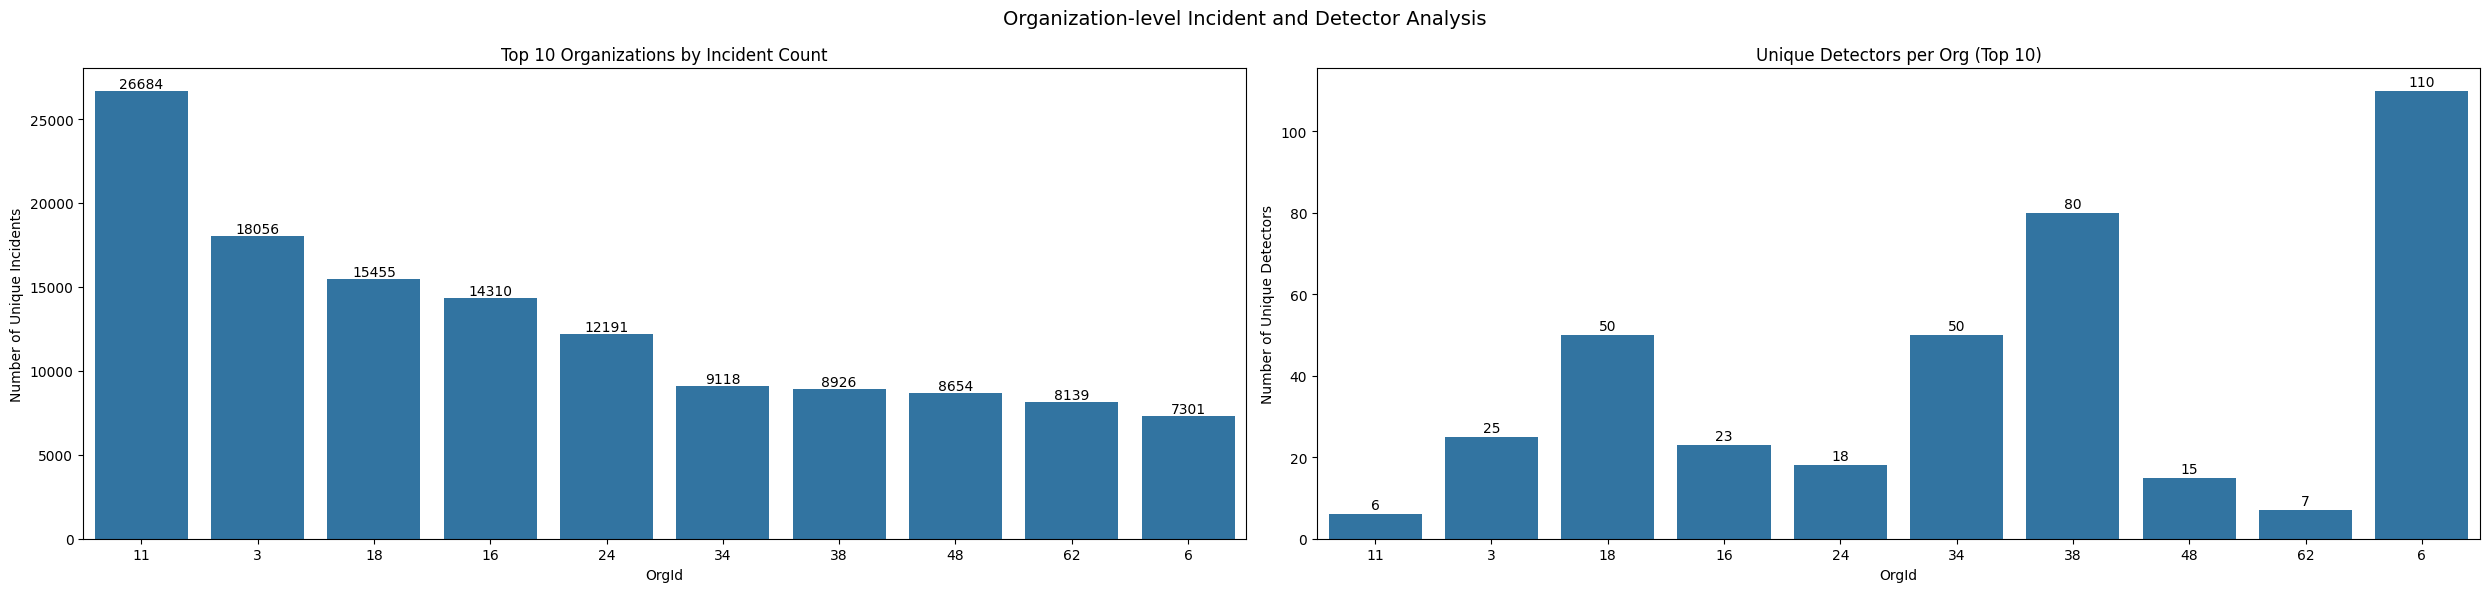

In [121]:
# --- OrgId vs IncidentId Analysis ---
incidents_per_org = clean_df.groupby('OrgId')['IncidentId'].nunique().sort_values(ascending=False)
top_10_orgs = incidents_per_org.head(10)

# --- OrgId vs DetectorId Analysis ---
detectors_per_org = clean_df.groupby('OrgId')['DetectorId'].nunique()
detectors_for_top_orgs = detectors_per_org[top_10_orgs.index]

fig, axes = plt.subplots(1, 2, figsize=(25, 6)) 

# Plot 1: Top 10 OrgId by Incident count
sns.barplot(x=top_10_orgs.index.astype(str), y=top_10_orgs.values, ax=axes[0])
axes[0].set_title('Top 10 Organizations by Incident Count')
axes[0].set_xlabel('OrgId')
axes[0].set_ylabel('Number of Unique Incidents')
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(top_10_orgs.values):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Plot 2: Unique Detectors used by top 10 Orgs
sns.barplot(x=detectors_for_top_orgs.index.astype(str), y=detectors_for_top_orgs.values, ax=axes[1])
axes[1].set_title('Unique Detectors per Org (Top 10)')
axes[1].set_xlabel('OrgId')
axes[1].set_ylabel('Number of Unique Detectors')
axes[1].tick_params(axis='x', rotation=0)
for i, v in enumerate(detectors_for_top_orgs.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.suptitle('Organization-level Incident and Detector Analysis', fontsize=14)
plt.tight_layout()
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots\org_lvl_i&d_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

#### **OrgId, IncidentId & DetectorId Analysis**
***OrgId***
- The top 10 organizations account for only ~26% of data, meaning incident activity is spread across many small organizations
- Organization "0" has 422K incidents (9.23%), showing some organizations are major incident generators
- Most organizations are low-activity, suggesting either good security posture or underreporting, while a few organizations are incident hotspots 

***IncidentId***
- Top incident IDs represent tiny fractions (0.22% max), with 4.3M incidents (98.65%) falling into "Others", meaning almost every incident is unique
- This feature has no predictive value due to perfect uniqueness
  
***DetectorId***
- Top 10 detectors capture ~51% of incidents, indicating diverse detection methods, while "Others" represents 49.31%
- Detectors 0 seems highly effective as it generates many incidents with high TruePositive rates  
  
***Organization-level Incident and Detector Analysis***
- Organization 11 has highest number of unique incidents (12K) but only 6 unique detectors
- Organization 6 has fewer unique incidents (6K) but uses 83 different detectors
- Some orgs generate many unique incidents with few detectors

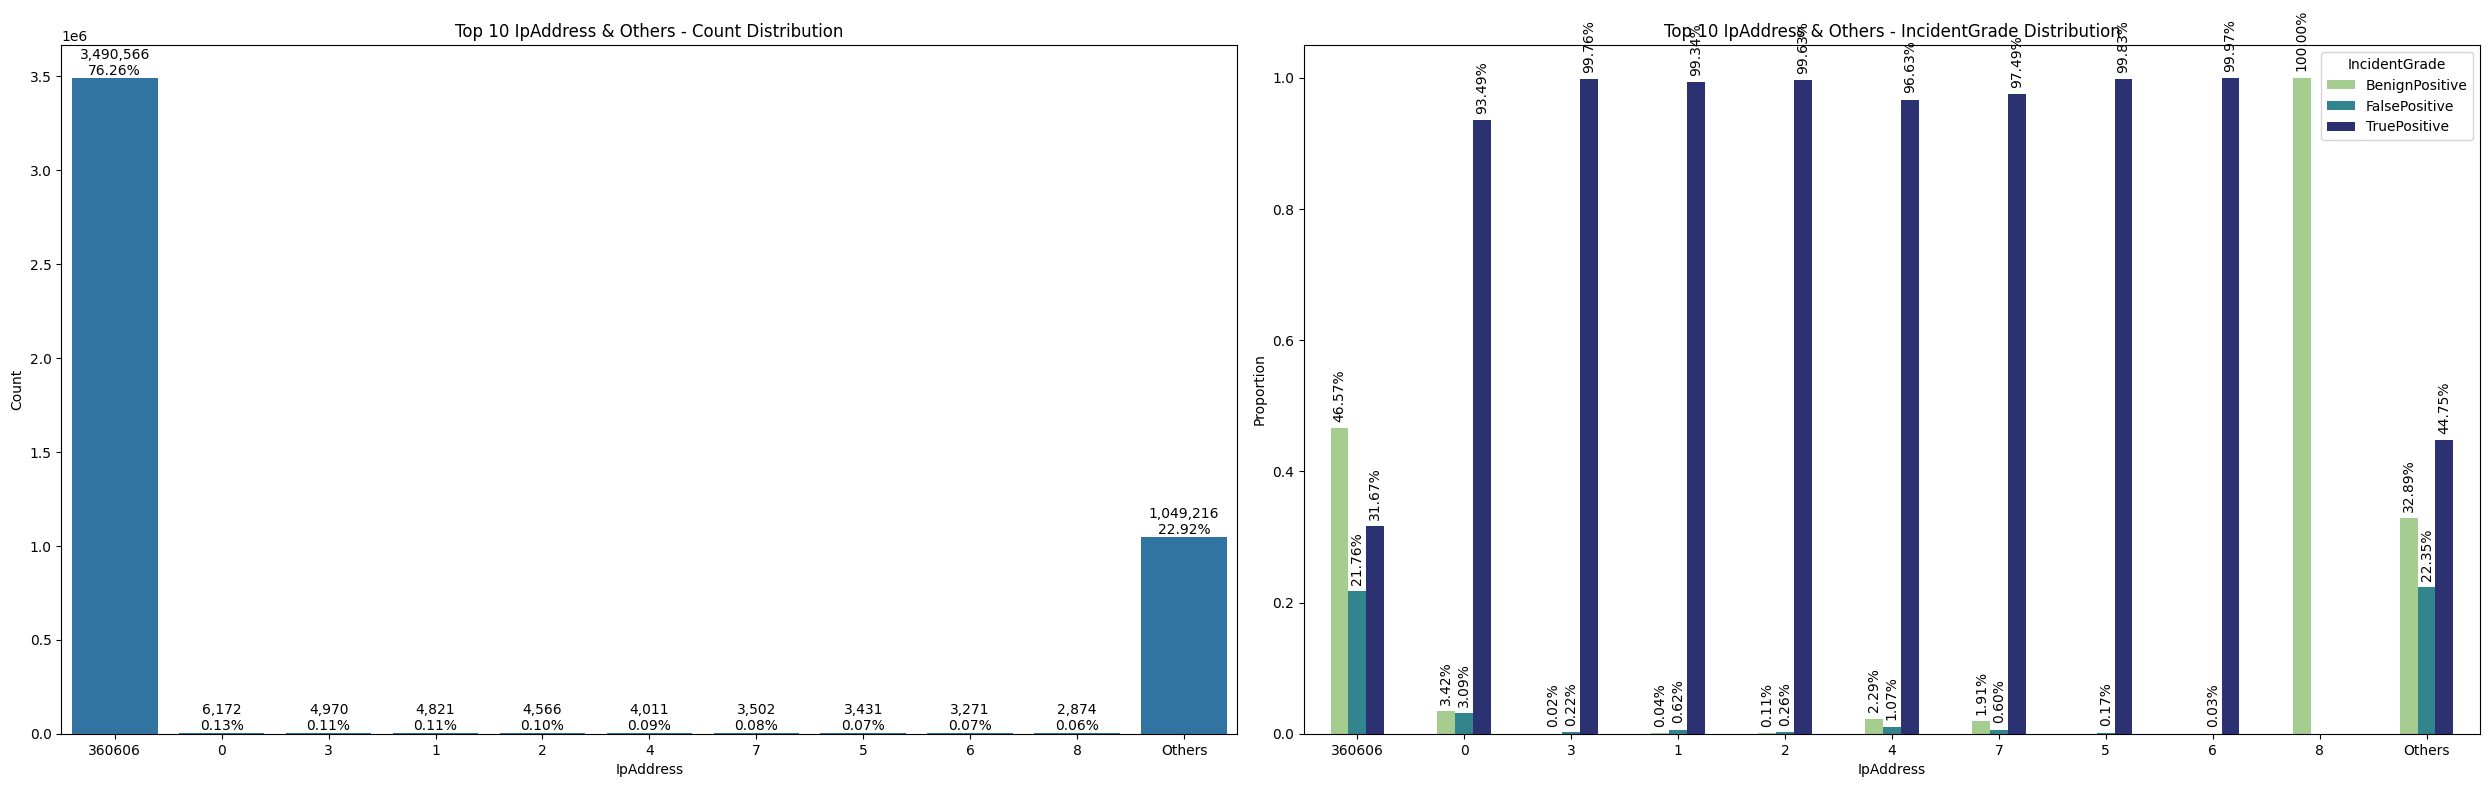

In [122]:
# IpAddress analysis
plot_feature_distribution(clean_df, 'IpAddress')

#### **IpAddress Analysis**
- IP (360606) accounts for 76.26% of incidents & IPs 0-8 shows >92% to ~100% TruePositives, showing perfect threat detection.
- Other IPs show more balanced distributions with ~45% TruePositives.

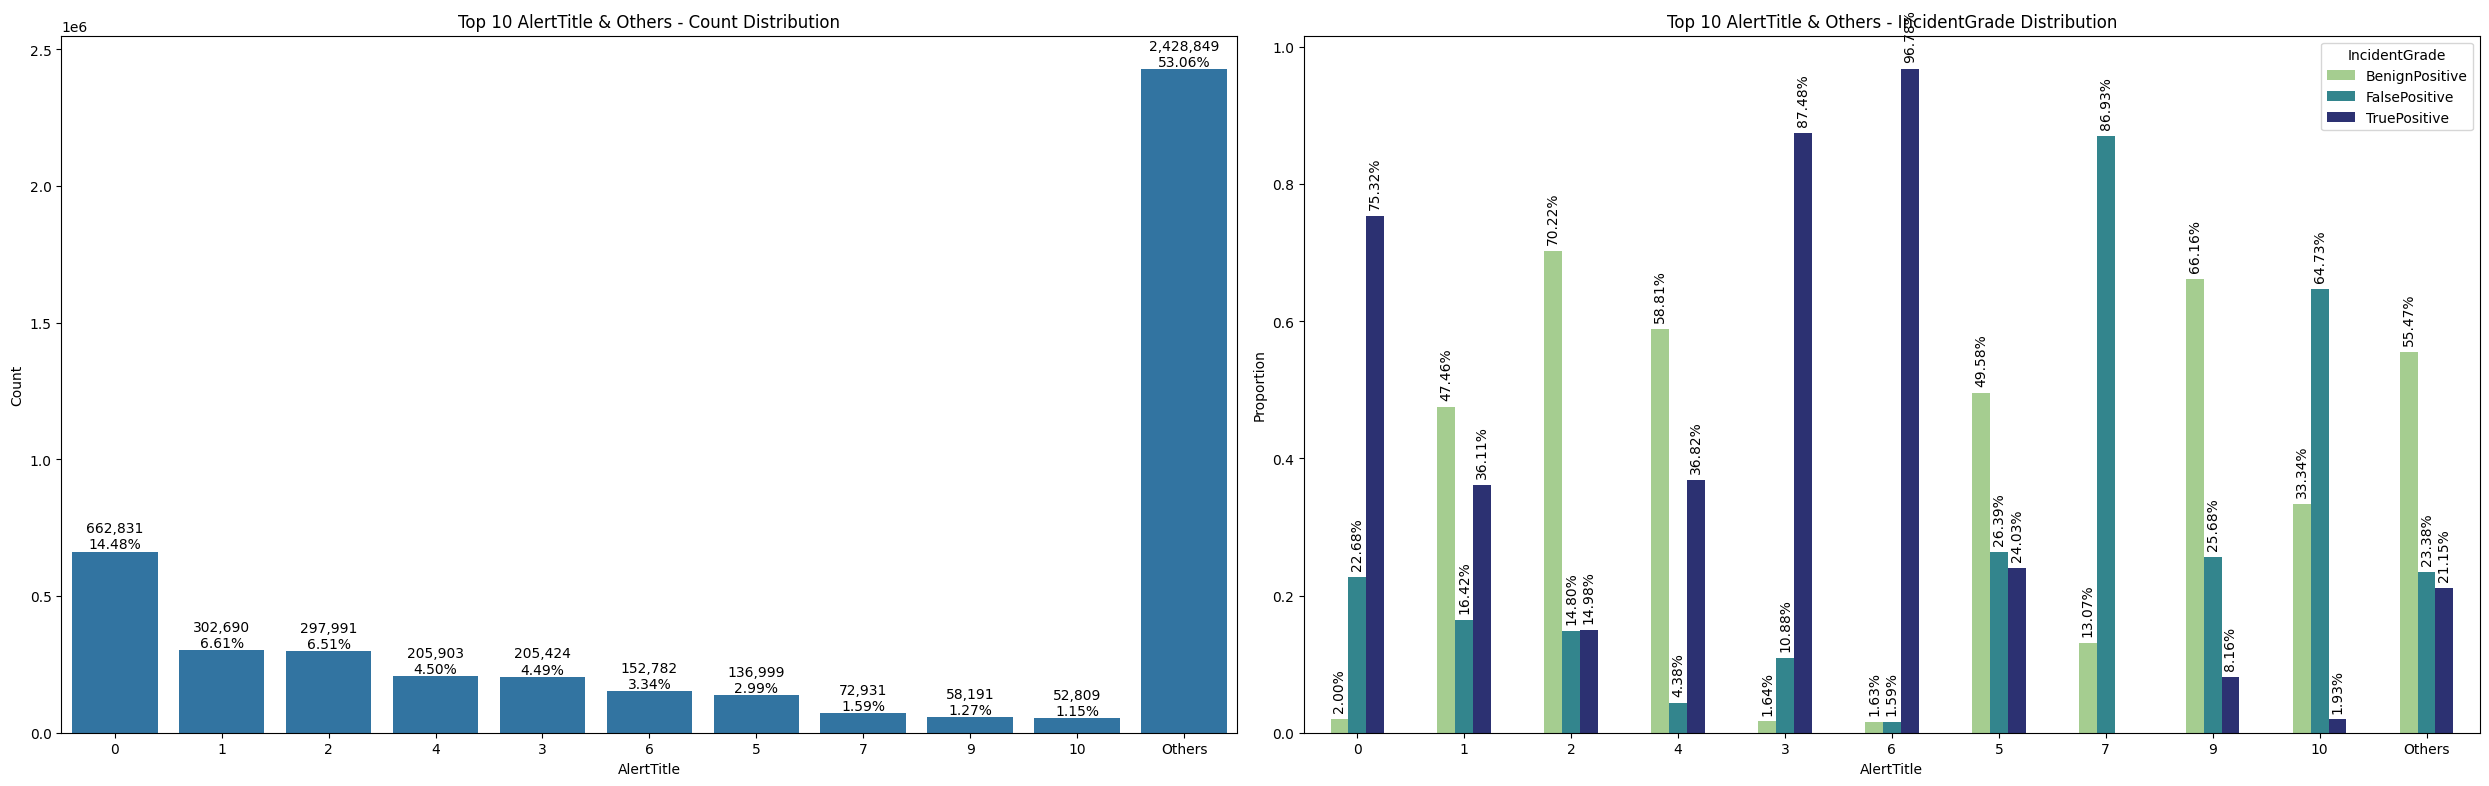

In [123]:
# AlertTitle analysis
plot_feature_distribution(clean_df, 'AlertTitle')

#### **AlertTitle Analysis**
- Out of the 74k unique alert titles the top 10 alert titles contribute to ~47% of the incidents & the rest spread across 74k unique alert titles
- AlertTitles 0, 3 & 6 capture >75% of TruePositives while AlertTitle 7 has no TruePositives

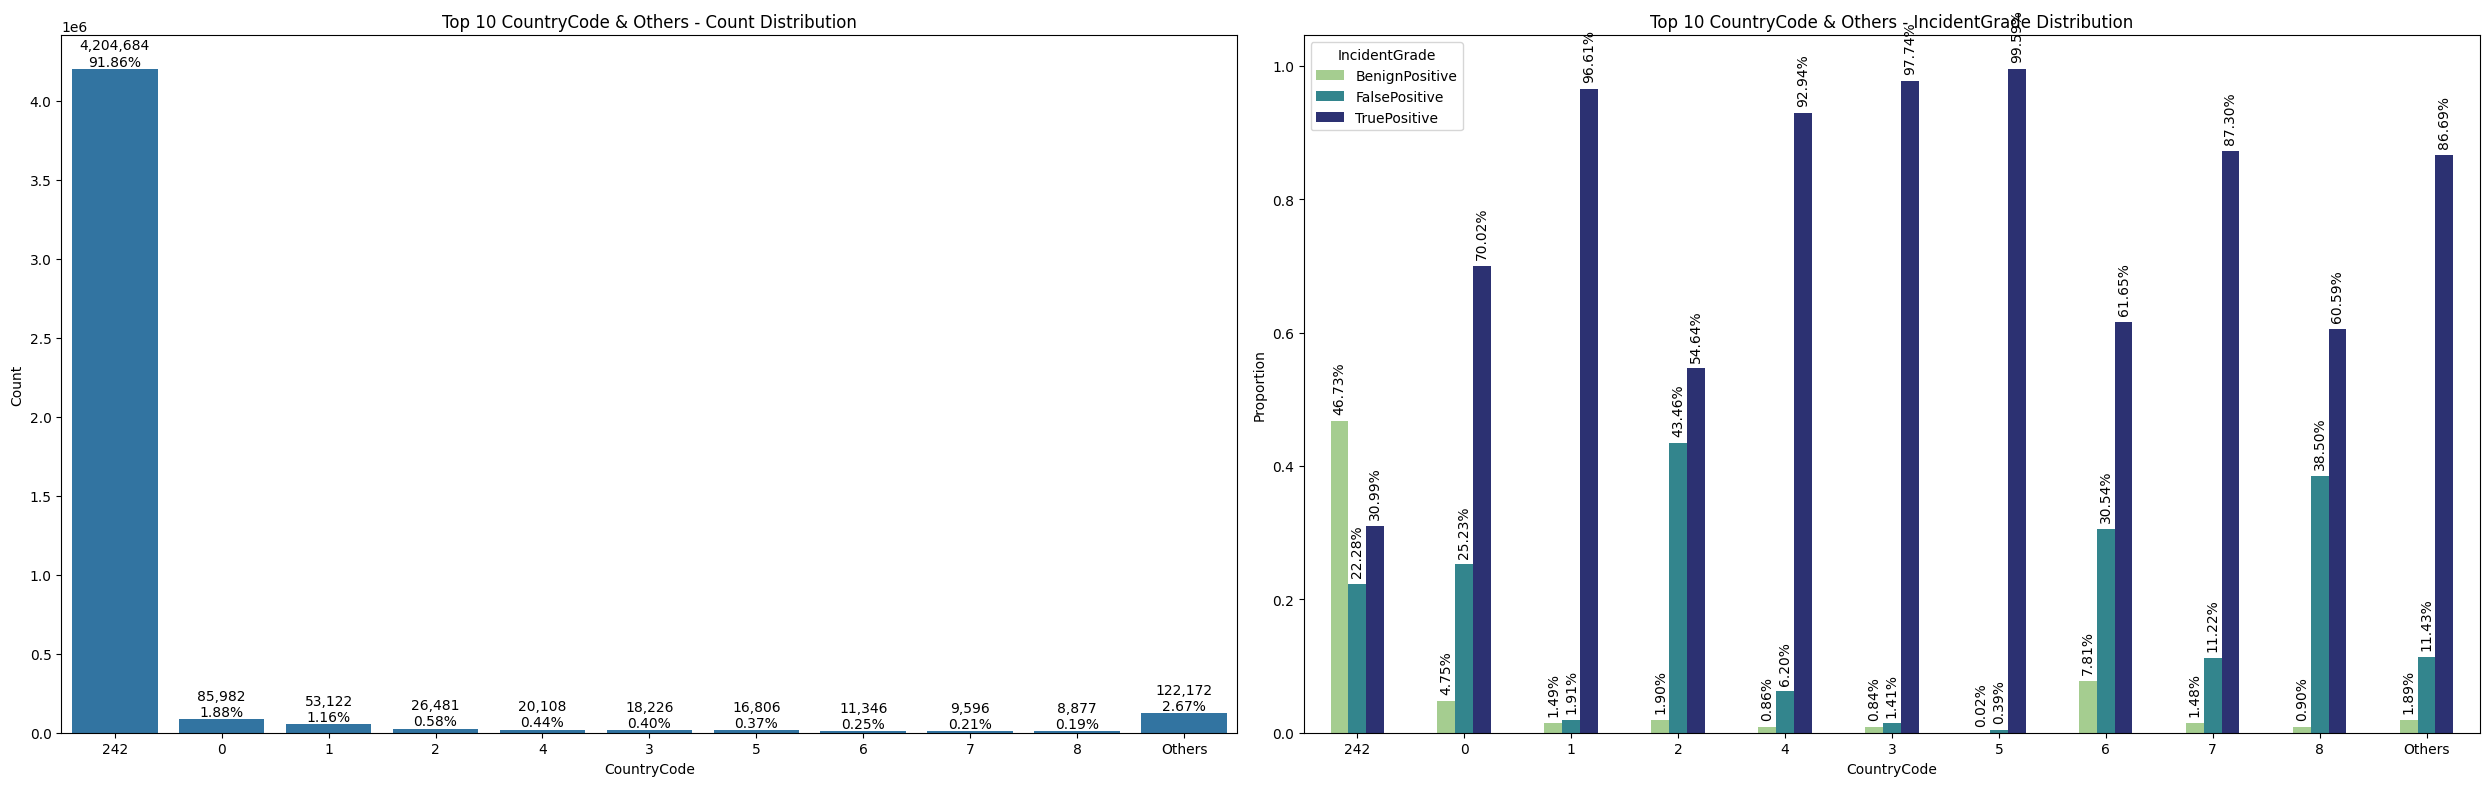

In [124]:
# Country analysis
plot_feature_distribution(clean_df, 'CountryCode')

In [125]:
# Country 242 Analysis
if 'CountryCode' in clean_df.columns and 'State' in clean_df.columns:
    country_242 = clean_df[clean_df['CountryCode'] == 242]
    print(f"No. of States in Country 242: {country_242['State'].nunique()}\n")

    counts = country_242['State'].value_counts()
    percentages = (counts / counts.sum()) * 100

    country_242_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(country_242_df.sort_index(ascending=True))

No. of States in Country 242: 4



Count  Percentage
State                     
1            5    0.000119
12           1    0.000024
1268         1    0.000024
1445   4204677   99.999834

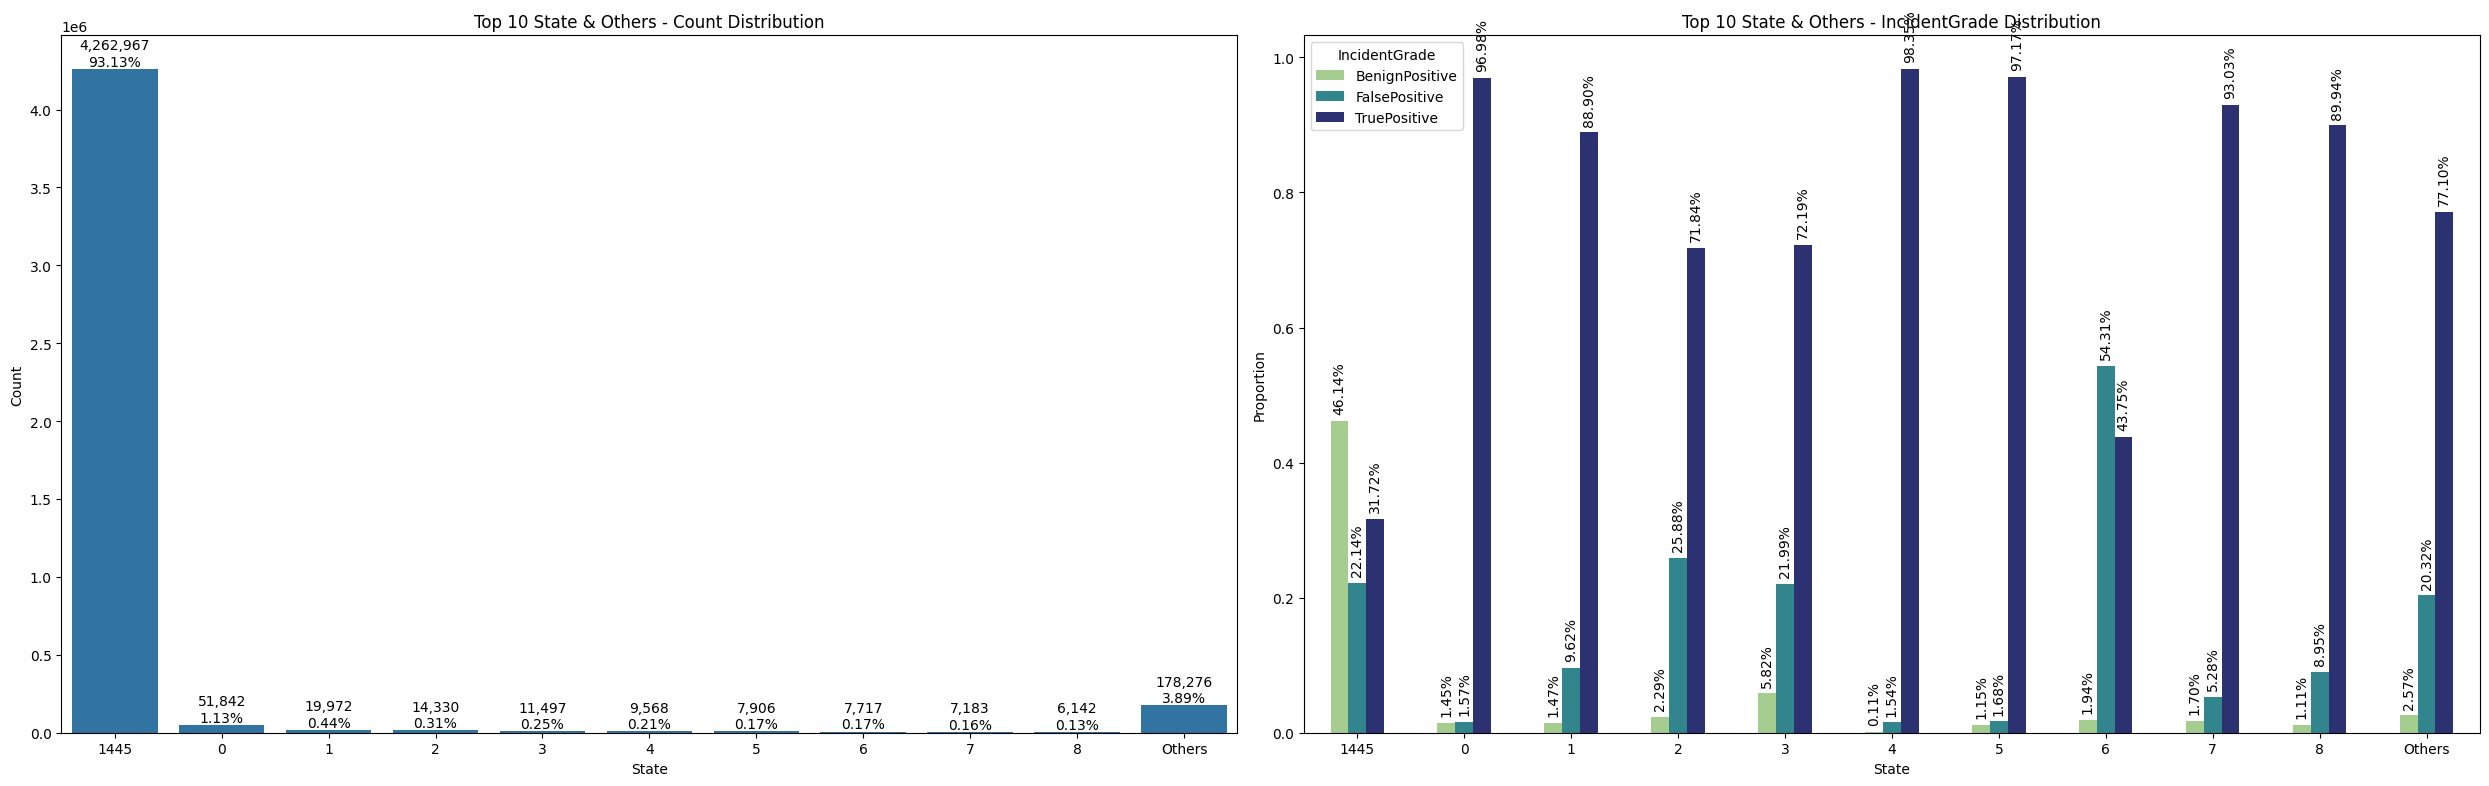

In [126]:
# State analysis
plot_feature_distribution(clean_df, 'State')

In [127]:
# State 1445 Analysis
if 'State' in clean_df.columns and 'City' in clean_df.columns:
    state_1445 = clean_df[clean_df['State'] == 1445]
    print(f"No. of Cities in State 1445: {state_1445['City'].nunique()}")

    counts = state_1445['City'].value_counts()
    percentages = (counts / counts.sum()) * 100

    state_1445_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(state_1445_df.sort_values(by='Percentage', ascending=False).head())

No. of Cities in State 1445: 29


Count  Percentage
City                      
10630  4262648   99.992517
3          172    0.004035
314         52    0.001220
379         20    0.000469
827         16    0.000375

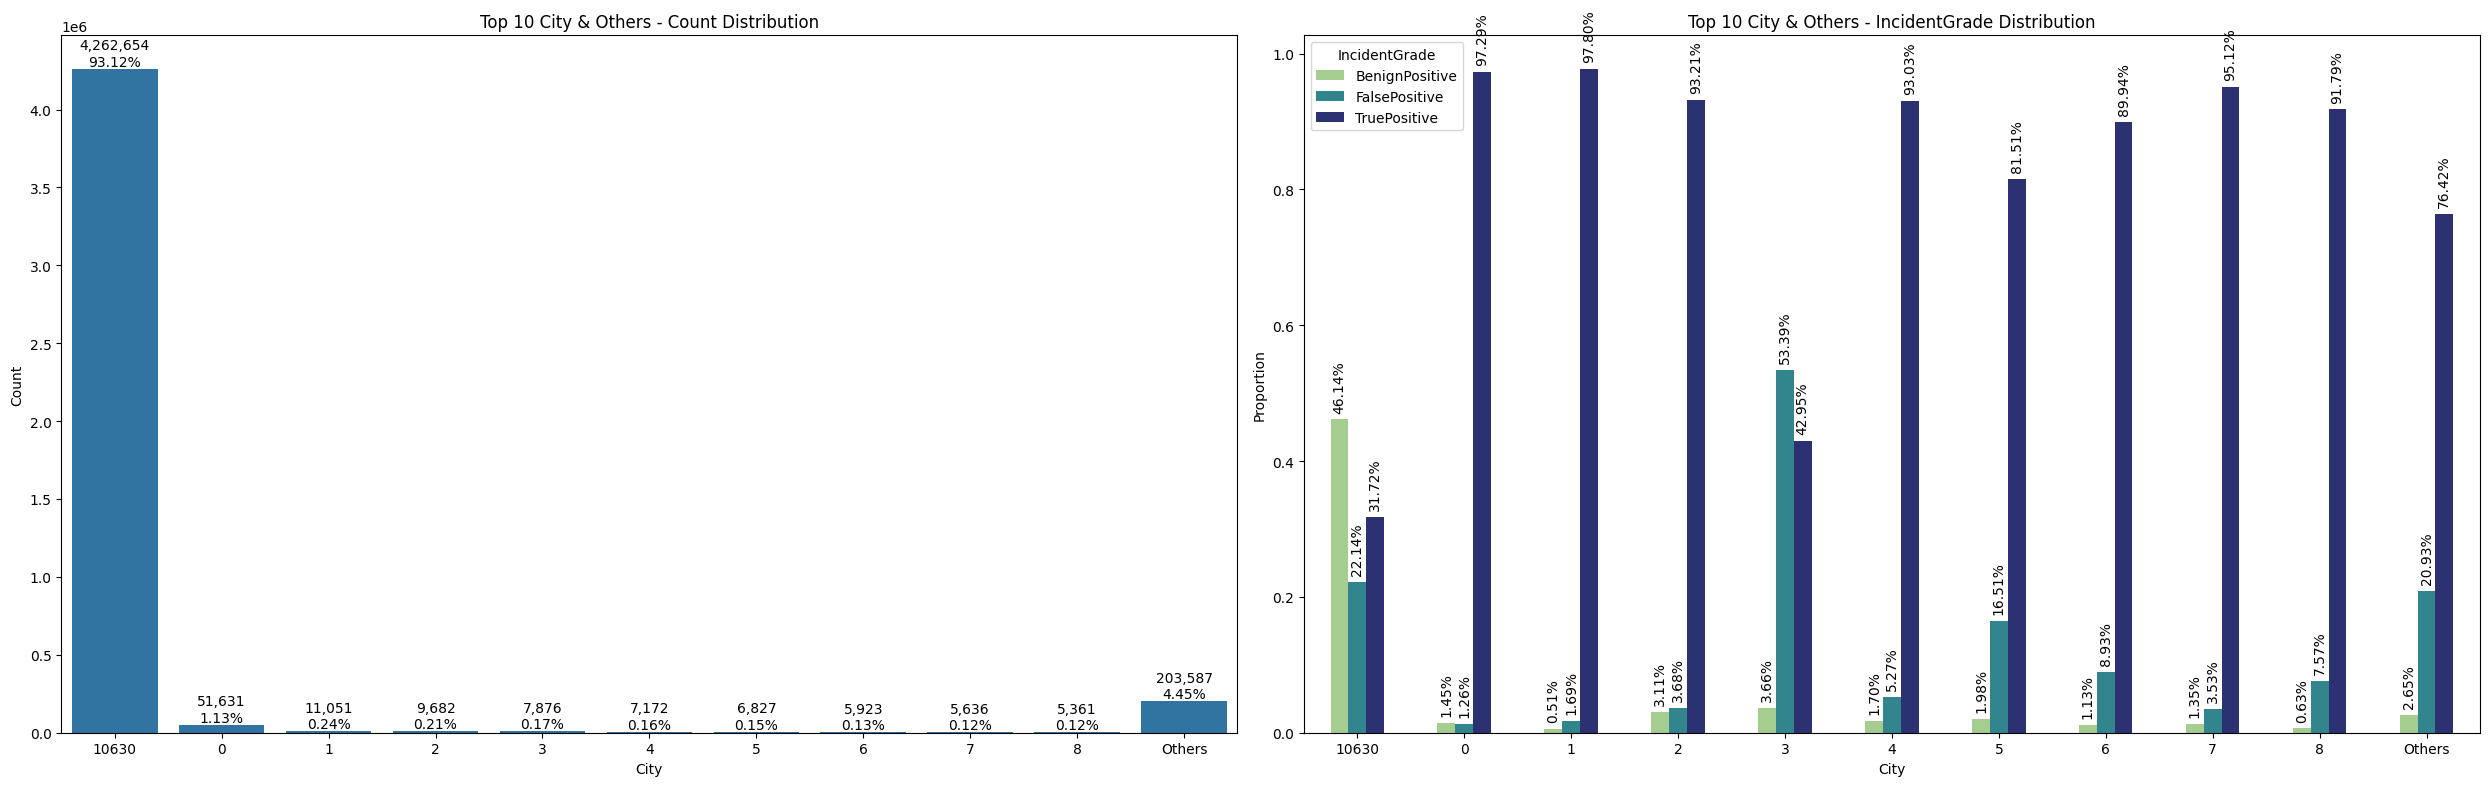

In [128]:
# Ctiy analysis
plot_feature_distribution(clean_df, 'City')

#### **GEOGRAPHICAL ANALYSIS [The data is heavily concentrated in a single country (242), single state (1445), and single city (10630)]**
***COUNTRY*** 
- CountryCode has 212 unique values but CountryCode 242 dominates with 4.2 million incidents (91.9%)
- All other top 9 countries combined account for just 5.5%, & all other countries account for just 2.7% of incidents, indicating extreme data skewness.
- Country 242 has a diverse mix of incident grades: ***BenignPositive: 46.7%, FalsePositive: 22.3%, TruePositive: 31.0%***
- There are 4 states in Country 242 with State 1445 is the major contributor, >99% of Country 242’s data comes from this one state.
  
***STATE***
- State has 1197 unique values with State 1445 dominating the dataset with 4.26 million incidents (93.1%)
- The remaining top 9 states contribute to only 3% while the other states contribute to 3.9% of incidents. 
- State 1445 is the major contributor: ***BenignPositive: 46.1%, FalsePositive: 22.1%, TruePositive: 31.7%***
- All the other states mostly have >90% TruePositives, indicating cleaner/more accurate detections.
- State 1445 have 29 cities with only 1 city contributing up to ~99.99% of the state’s incidents

***CITY***
- City has 7107 unique values with City 10630 dominating the dataset with 4.26 million incidents (93.1%)
- The other top 9 cities contributing to just 2.3% & other cities individually contribute negligible percentages while combiningly contribute to 4.4% of incidents.
- City 10630 dominates within State 1445: ***BenignPositive: 46.1%, FalsePositive: 22.1%, TruePositive: 31.7%*** making up ~99.99% of the state’s incidents.

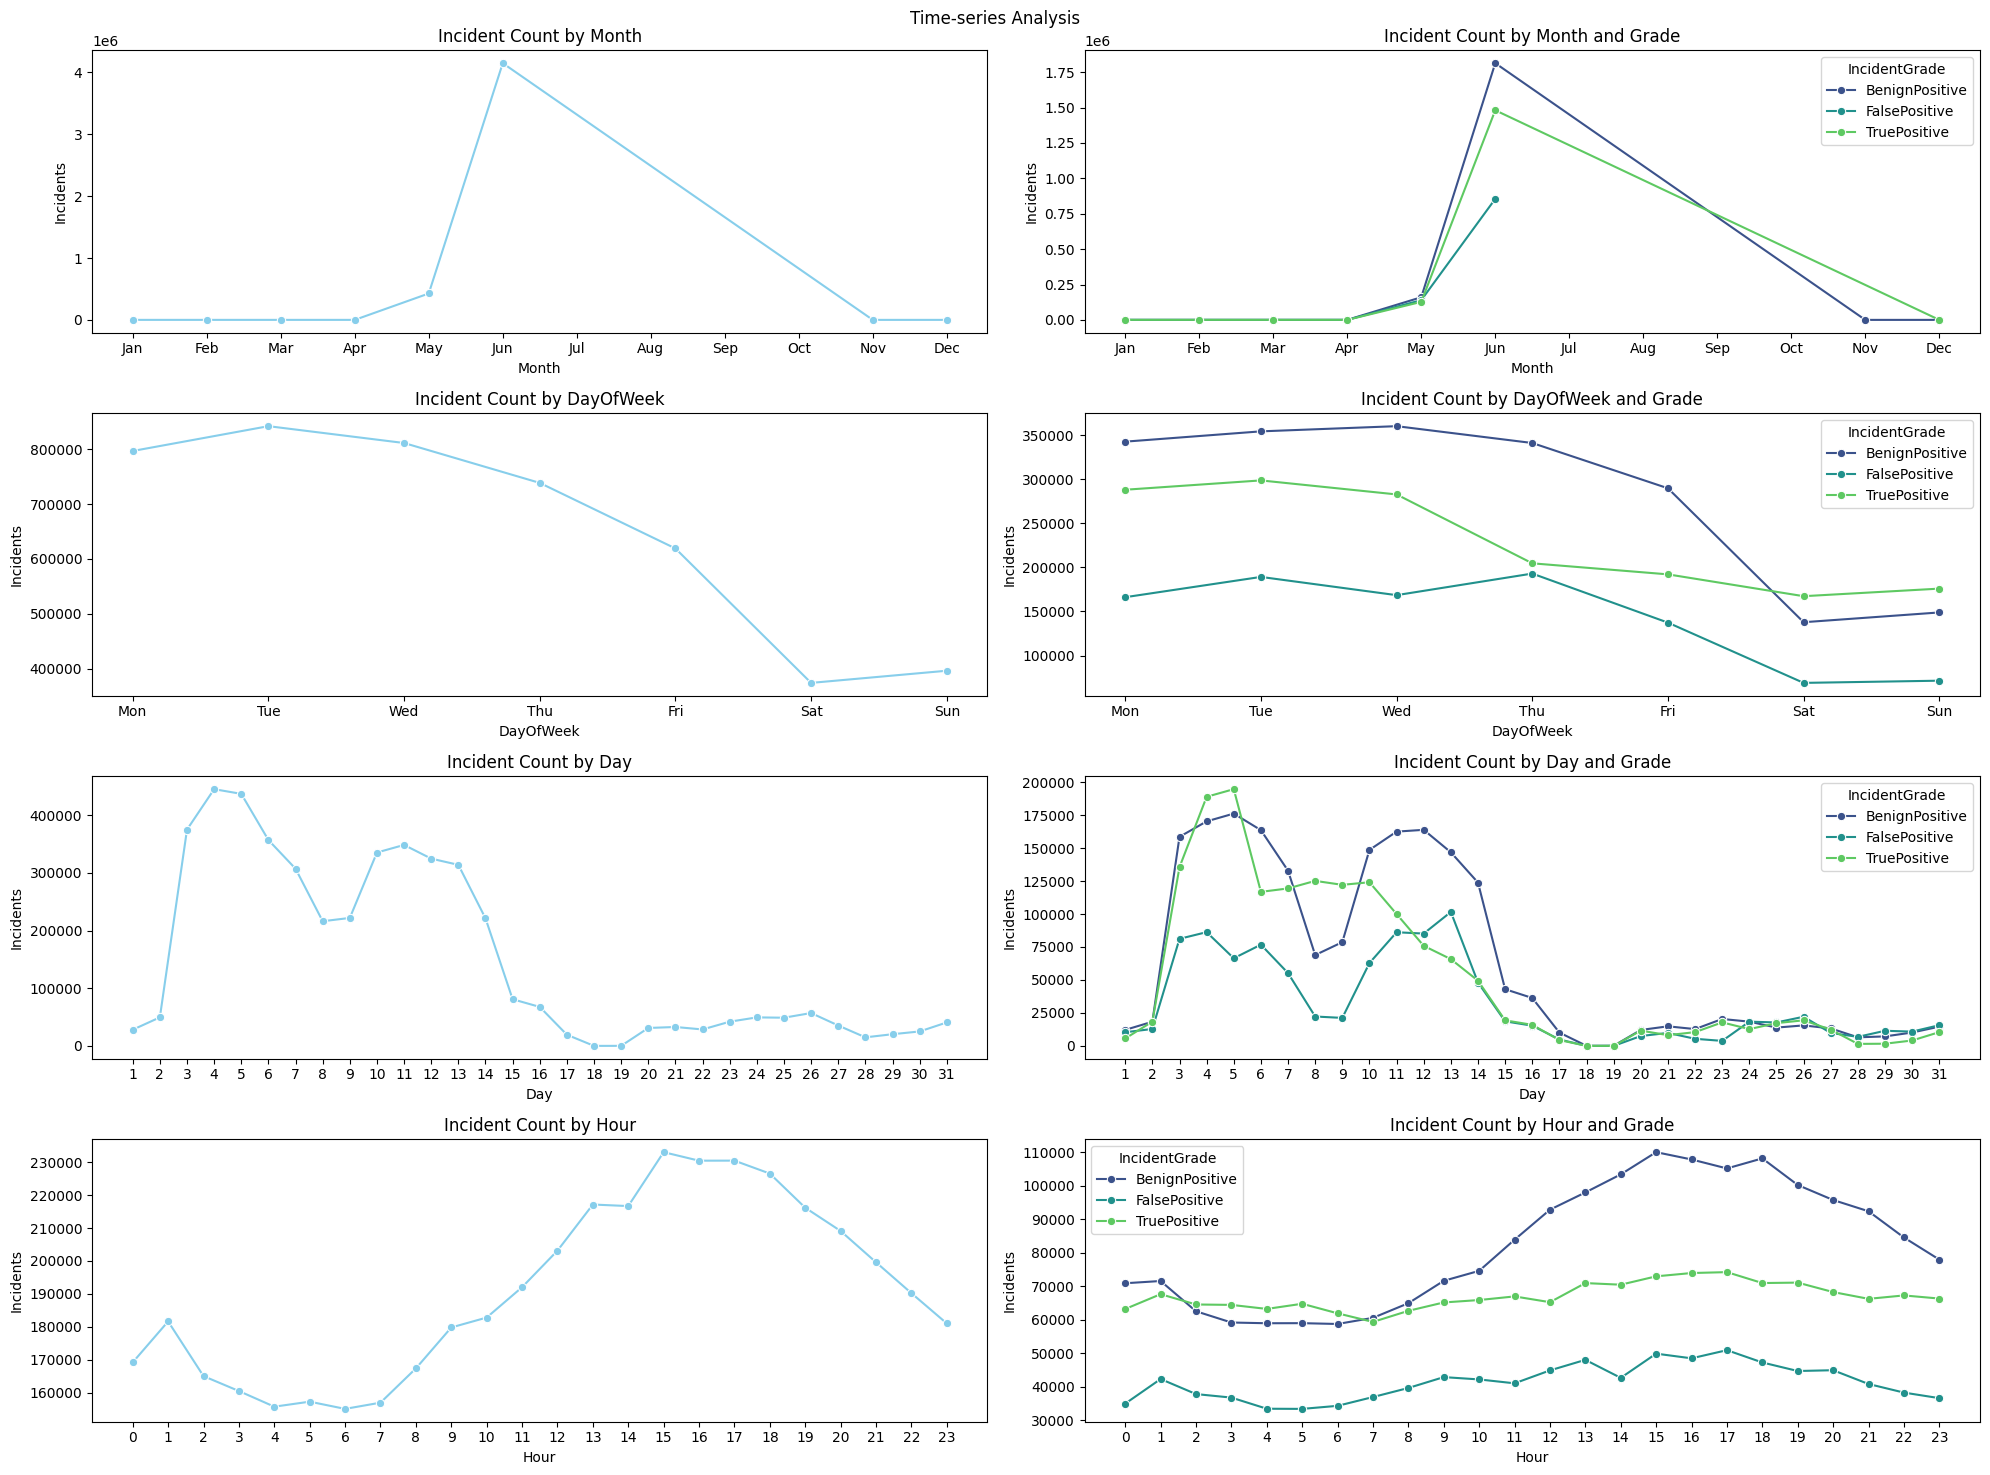

In [129]:
# TIME-SERIES ANALYSIS
def plot_time_series(ax1, ax2, df, col, label_map=None):

    # Plot total count
    counts = df[col].value_counts().sort_index()
    sns.lineplot(ax=ax1, x=counts.index, y=counts.values, marker='o', color='skyblue')
    ax1.set_title(f'Incident Count by {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Incidents')
    if label_map:
        ax1.set_xticks(list(label_map.keys()))
        ax1.set_xticklabels(list(label_map.values()))
    else:
        ax1.set_xticks(sorted(df[col].unique()))

    # Plot count by IncidentGrade
    grouped = df.groupby([col, 'IncidentGrade']).size().reset_index(name='Count')
    sns.lineplot(ax=ax2, data=grouped, x=col, y='Count', hue='IncidentGrade', marker='o', palette='viridis')
    ax2.set_title(f'Incident Count by {col} and Grade')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Incidents')
    if label_map:
        ax2.set_xticks(list(label_map.keys()))
        ax2.set_xticklabels(list(label_map.values()))
    else:
        ax2.set_xticks(sorted(df[col].unique()))

def analyze_temporal_patterns(df):
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))
    plt.suptitle("Time-series Analysis")
    axes = axes.flatten()

    label_maps = {
        'DayOfWeek': {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'},
        'Month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    }

    time_columns = ['Month', 'DayOfWeek', 'Day', 'Hour']

    for i, col in enumerate(time_columns):
        label_map = label_maps.get(col)
        plot_time_series(axes[2*i], axes[2*i+1], df, col, label_map)

    plt.tight_layout()
    plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots\time-series_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()

analyze_temporal_patterns(clean_df)

##### **TIME-SERIES ANALYSIS**
***Monthly Patterns***
- The monthly analysis reveals a highly concentrated incident pattern with a dramatic spike in June , while most other months minimal activity. 
- This suggests either a seasonal phenomenon or a specific event/period that drives incident occurrence.

***Weekly Patterns***
- Monday-Wednesday: High incident volumes (800K+ incidents), with Monday being the peak
- Thursday-Sunday: Significant decline, with weekends showing the lowest activity (~400K incidents)
- This pattern suggests incidents are strongly correlated with business/work cycles

***Daily Patterns (Day of Month)***
- The daily distribution shows extreme volatility in the 1st half of the month:
- Days 1-14: Very high incident counts with dramatic fluctuations (peaks reaching 400K+)
- Days 15-31: Relatively stable and much lower incident levels

***Hourly Patterns***
- Peak hours: 14-18 (2 PM - 6 PM), reaching 230K+ incidents
- Low hours: 3-7 (3 AM - 7 AM), dropping to ~155K incidents
- This aligns with typical business hours and user activity patterns

***Incident Grade Analysis***
- Across all temporal dimensions, the data shows three distinct incident grades:
- BenignPositive (blue): Generally shows the highest volumes
- TruePositive (green): Moderate volumes, often following similar patterns to BenignPositive
- FalsePositive (teal): Consistently lower volumes across all time periods

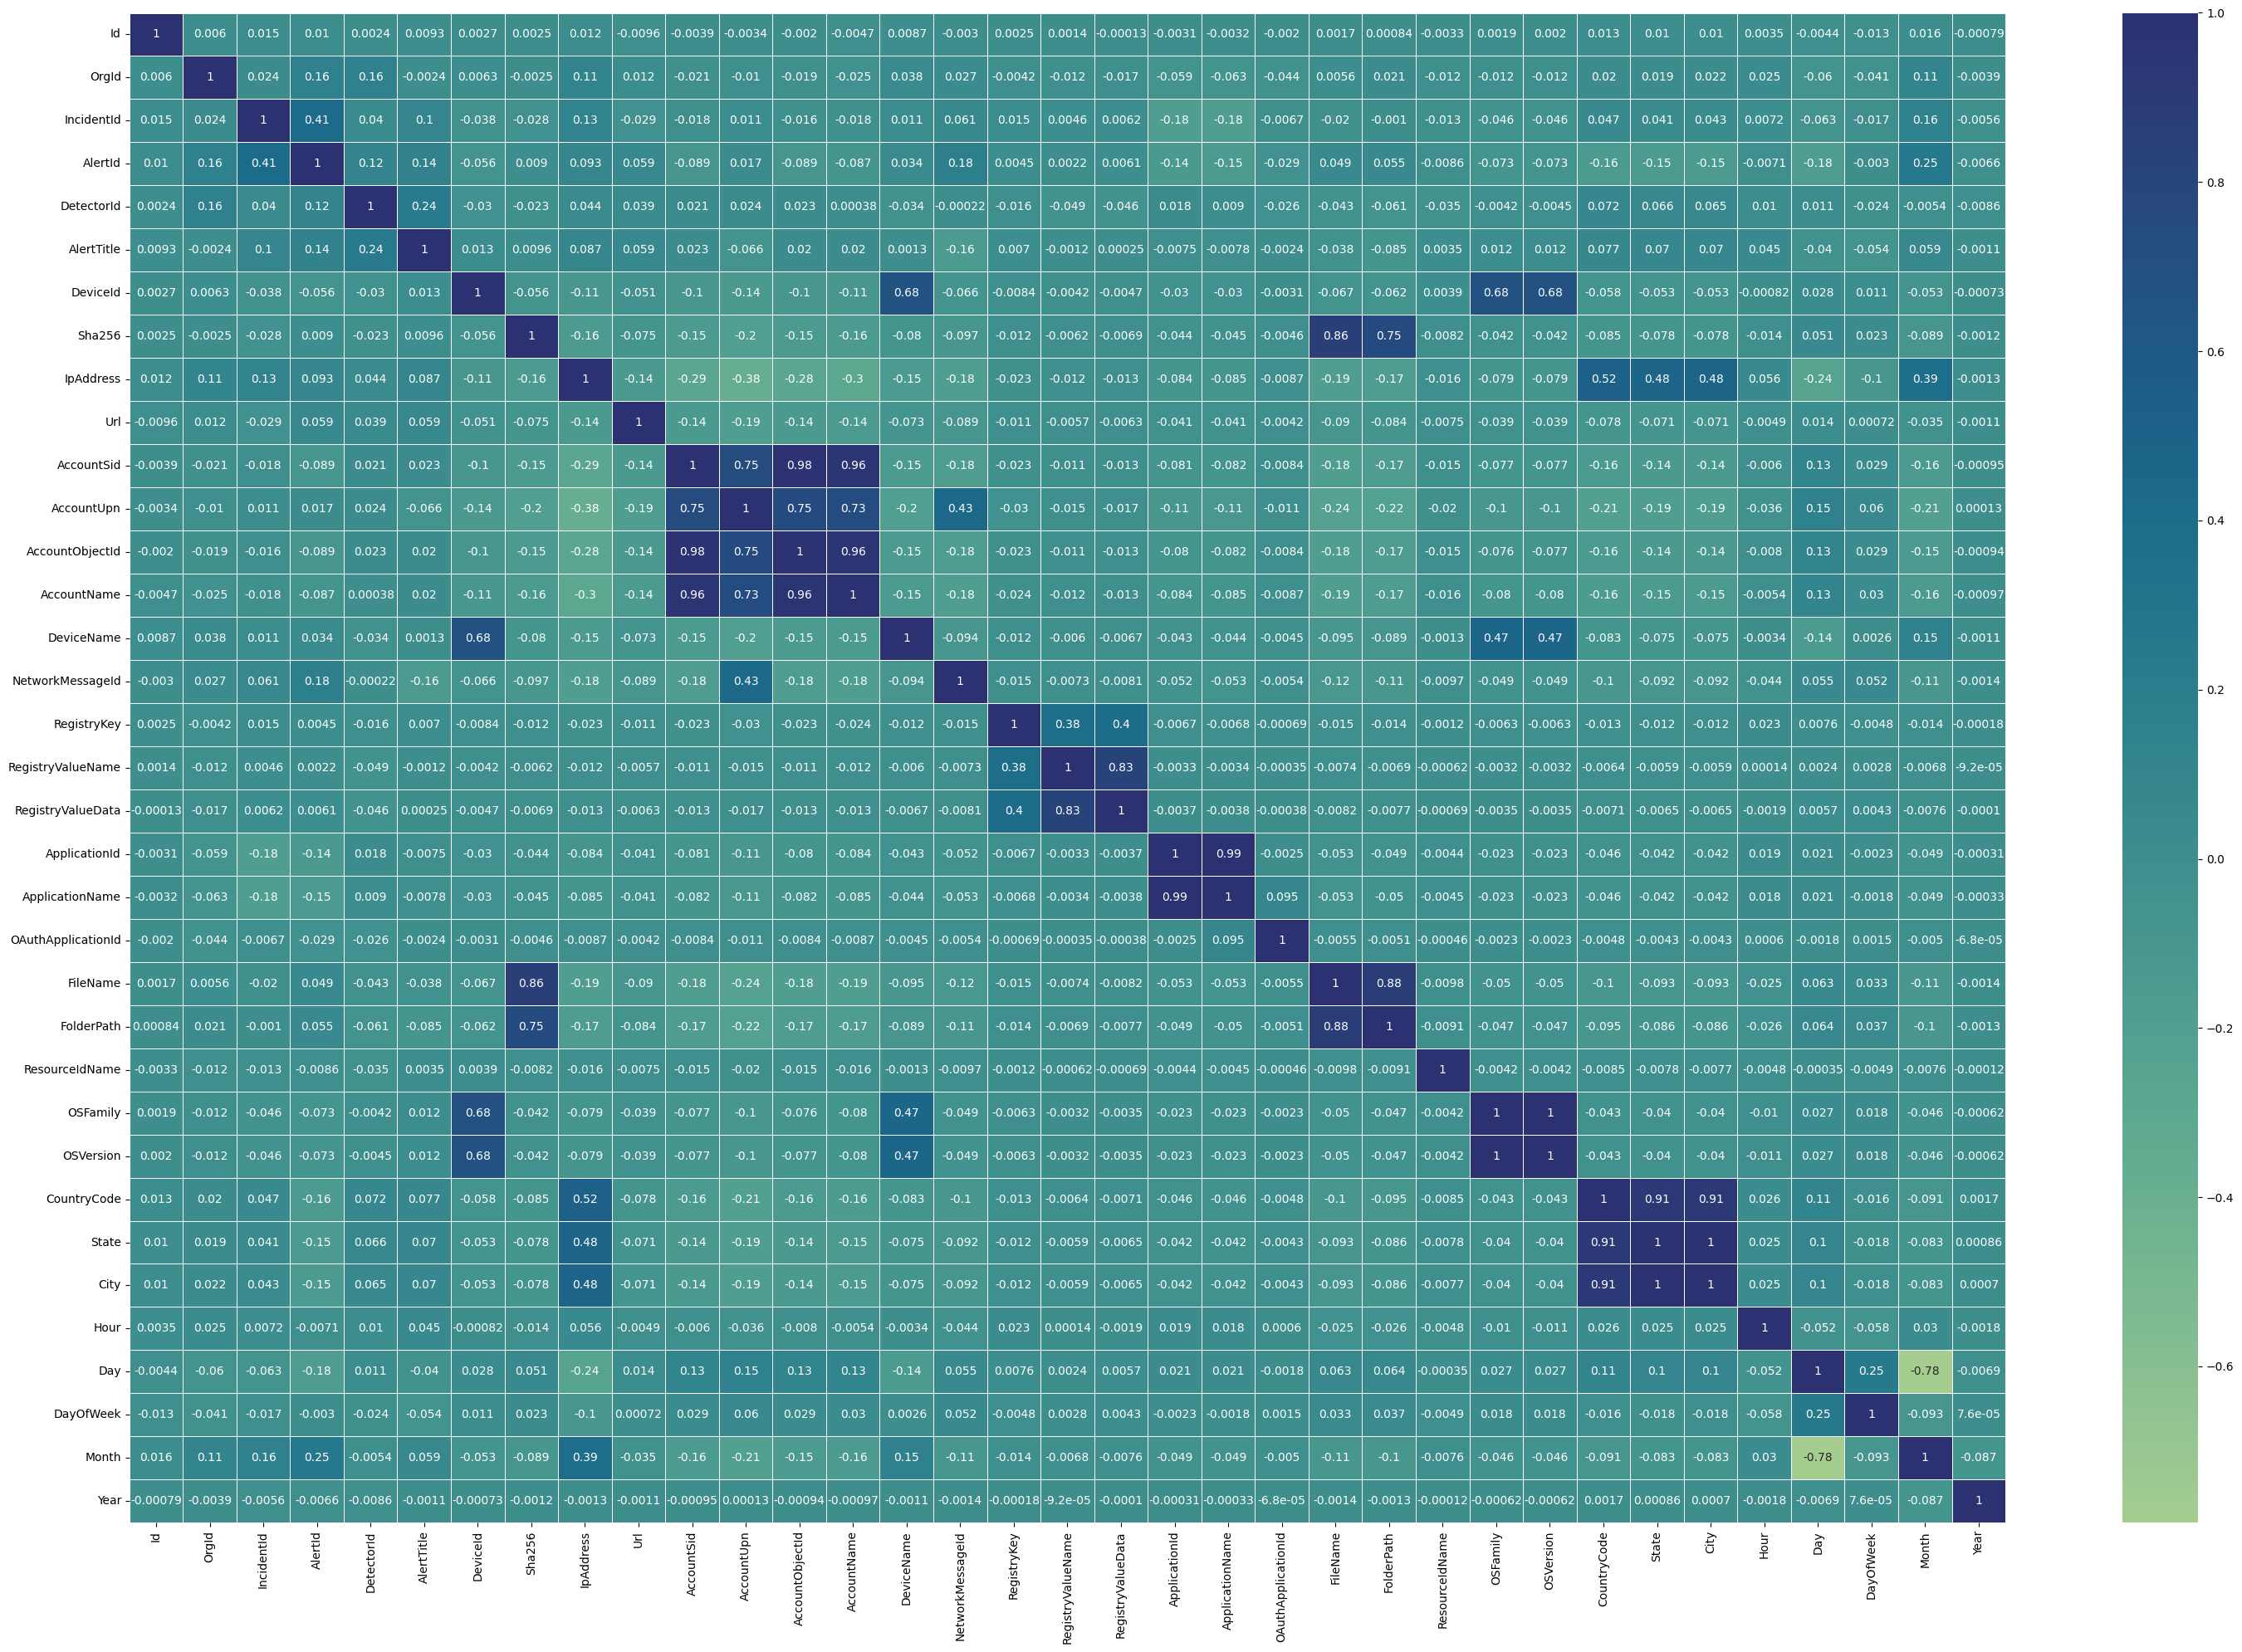

In [130]:
plt.figure(figsize = (30, 20))
sns.heatmap(clean_df[num_features].corr(), cmap = 'crest', annot = True, linewidth = 0.5)
plt.tight_layout()  
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots\correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

**Highly Correlated Features (Multicollinearity)**

**Features with correlation ≥ 0.8 are redundant, so we should keep only one from each pair.**

- AccountObjectId (0.98) and AccountSid (0.75) & AccountUpn (0.75) → Dropping AccountSid & AccountUpn
- FileName (0.86) and Sha256 → Dropping Sha256 
- FolderPath (0.75) and FileName → Dropping FolderPath 
- RegistryValueName (0.83) and RegistryValueData → Dropping RegistryValueName.
- ApplicationId (0.99) and ApplicationName → Dropping ApplicationId.
- OSFamily (1.00) and OSVersion → Dropping OSFamily.
- (State, City (1.00)), and CountryCode (0.91) → Dropping Country and City.
  
**Low-Impact Features**

**These have near-zero correlation with other features, making them less informative.**

- OAuthApplicationId → Very low correlation, can be dropped.
- ResourceIdName → Low correlation, not very useful.
- RegistryKey → Low correlation, likely not impactful.

### **Feature Engineering**

In [131]:
clean_df

Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0        1709396985476     26       18583   687462          31         813   
1         927712939180     33        5065     3990          38          25   
2        1090921697002    201      150787   807590         419         444   
3        1434519079555    204      108287    28575          44        1233   
4        1005022347708     54      528202  1458226         102       58829   
...                ...    ...         ...      ...         ...         ...   
4758413   103079215470    142       93987    15739         112        7836   
4758414  1683627184337     36        1001   257479           2           2   
4758415  1597727836318    851       31194  1518250           1           1   
4758416   137438957239     12        2419     1203          16        1334   
4758417  1228360650489    201       39946   590317           5          97   

                   Category   IncidentGrade        EntityType EvidenceRole  \
0                   Malware  BenignPositive              File      Related   
1                    Impact  BenignPositive           Machine     Impacted   
2                 Execution  BenignPositive           Machine     Impacted   
3        SuspiciousActivity    TruePositive              File      Related   
4              Exfiltration  BenignPositive              File     Impacted   
...                     ...             ...               ...          ...   
4758413        Exfiltration   FalsePositive       MailMessage     Impacted   
4758414   CommandAndControl   FalsePositive              User     Impacted   
4758415       InitialAccess  BenignPositive       MailMessage      Related   
4758416              Impact  BenignPositive                Ip      Related   
4758417  SuspiciousActivity  BenignPositive  CloudApplication     Impacted   

         DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0           98799    1296     360606  160396      441377      673934   
1           98799  138268     360606  160396      441377      673934   
2           98799  138268     360606  160396      441377      673934   
3           98799  138268     360606  160396      441377      673934   
4           98799  138268     360606  160396      441377      673934   
...           ...     ...        ...     ...         ...         ...   
4758413     98799  138268     360606  160396      441377      308666   
4758414     98799  138268     360606  160396       32117       96088   
4758415     98799  138268     360606  160396      441377       42275   
4758416     98799  138268        546  160396      441377      673934   
4758417     98799  138268     360606  160396      441377      673934   

         AccountObjectId  AccountName  DeviceName  NetworkMessageId  \
0                 425863       453297      153085            529644   
1                 425863       453297        3142            529644   
2                 425863       453297        4181            529644   
3                 425863       453297      153085            529644   
4                 425863       453297      153085            529644   
...                  ...          ...         ...               ...   
4758413           425863       453297      153085               869   
4758414            32986        36982      153085            529644   
4758415           425863       453297      153085            402271   
4758416           425863       453297      153085            529644   
4758417           425863       453297      153085            529644   

         RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  \
0               1631                635                860           2251   
1               1631                635                860           2251   
2               1631                635                860           2251   
3               1631                635                860           2251   
4               1631                635    

In [133]:
# List of features to drop(Highly correlated features, low impact features & some pure identity features like Ids)
features_to_drop = [
    "AccountSid", "AccountUpn", "Sha256", "FolderPath", "RegistryValueName", "OSFamily", "City", "CountryCode", "ApplicationId", "IncidentId",  
    "FileName", "OAuthApplicationId", "ResourceIdName", "RegistryKey", "Id", "AccountObjectId", "AlertId", "NetworkMessageId", "RegistryValueData"
]

# Drop the selected columns from the dataset
train_df = clean_df.copy()
train_df = train_df.drop(columns=features_to_drop)
print("Remaining Features:", len(train_df.columns))
print(train_df.columns)

Remaining Features: 20
Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'DeviceId', 'IpAddress', 'Url',
       'AccountName', 'DeviceName', 'ApplicationName', 'OSVersion', 'State',
       'Hour', 'Day', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')


In [134]:
cat_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']
num_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']

print("Categorical features", cat_features)
print("Numerical features", num_features)

Categorical features ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
Numerical features ['OrgId', 'DetectorId', 'AlertTitle', 'DeviceId', 'IpAddress', 'Url', 'AccountName', 'DeviceName', 'ApplicationName', 'OSVersion', 'State', 'Hour', 'Day', 'DayOfWeek', 'Month', 'Year']


In [135]:
# Chi-square test
'''
Hypothesis:

Null Hypothesis (H₀): The categorical feature and IncidentGrade are independent (no association).
Alternative Hypothesis (H₁): The categorical feature and IncidentGrade are dependent (significant association exists).
'''
chi2_statistics, chi2_test, p_values = [], [], [] 

for feature in cat_features:
    contingency_table = pd.crosstab(train_df['IncidentGrade'], train_df[feature])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_statistics.append(chi2_stat)
    p_values.append(p_val)
    
    if p_val < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Accept Null Hypothesis')

chi2_result = pd.DataFrame({
    'Categorical Features': cat_features,
    'Chi-2 Statistic': chi2_statistics,
    'p-value': p_values,
    'Hypothesis Result': chi2_test
})

chi2_result = chi2_result.sort_values('Chi-2 Statistic', ascending=False)
chi2_result

Categorical Features  Chi-2 Statistic  p-value       Hypothesis Result
1        IncidentGrade     9.154800e+06      0.0  Reject Null Hypothesis
0             Category     9.381853e+05      0.0  Reject Null Hypothesis
2           EntityType     8.914487e+05      0.0  Reject Null Hypothesis
3         EvidenceRole     1.278470e+05      0.0  Reject Null Hypothesis

##### Chi-Square (χ²) test of independence:
- Used to determine the relationship of categorical features with the target variable (IncidentGrade).
- ***Chi-2 Statistic:***	Measures the strength of association between the feature and target. Higher values → stronger association.
- ***p-value:***	Probability that any observed association is due to chance. A very small p-value (< 0.05) → strong evidence against the null hypothesis.

- ***Catergory & EntityType*** show strong association with IncidentGrade and are strong predictors
- ***EvidenceRole*** though showing the least association with IncidentGrade it is still a moderate predictor

In [136]:
# ANOVA
'''
Hypothesis:

Null Hypothesis (H₀): The numerical feature and IncidentGrde are independent (no association).
Alternative Hypothesis (H₁): The numerical feature and IncidentGrde are dependent (significant association exists).
'''
anova_test = []

for feature in num_features:
    groups = [train_df[train_df['IncidentGrade'] == grade][feature].dropna() for grade in train_df['IncidentGrade'].unique()]
    f_stat, p_value = f_oneway(*groups)

    if p_value < 0.05:
        result = 'Reject Null Hypothesis'
    else:
        result = 'Accept Null Hypothesis'
    
    anova_test.append([feature, f_stat, p_value, result])

# Create DataFrame with F-score and p-value
anova_results = pd.DataFrame(anova_test, columns=['Numerical Feature', 'F-score', 'p-value', 'Hypothesis Result'])
anova_results = anova_results.sort_values(by='F-score', ascending=False)
anova_results 

Numerical Feature        F-score       p-value       Hypothesis Result
10             State  186694.019100  0.000000e+00  Reject Null Hypothesis
0              OrgId   60431.138653  0.000000e+00  Reject Null Hypothesis
4          IpAddress   57343.982173  0.000000e+00  Reject Null Hypothesis
7         DeviceName   49977.683786  0.000000e+00  Reject Null Hypothesis
2         AlertTitle   48892.726433  0.000000e+00  Reject Null Hypothesis
12               Day   36201.079122  0.000000e+00  Reject Null Hypothesis
1         DetectorId   33465.607493  0.000000e+00  Reject Null Hypothesis
5                Url   21571.516139  0.000000e+00  Reject Null Hypothesis
6        AccountName   17938.990332  0.000000e+00  Reject Null Hypothesis
3           DeviceId   16118.542612  0.000000e+00  Reject Null Hypothesis
14             Month   16089.108142  0.000000e+00  Reject Null Hypothesis
9          OSVersion   10305.340267  0.000000e+00  Reject Null Hypothesis
11              Hour    8104.228839  0.000000e+00  Reject Null Hypothesis
13         DayOfWeek    2319.644835  0.000000e+00  Reject Null Hypothesis
8    ApplicationName    1315.122206  0.000000e+00  Reject Null Hypothesis
15              Year      30.540837  5.449687e-14  Reject Null Hypothesis

##### ANOVA:
- Used to determine the relationship of numerical features with the target variable (IncidentGrade)
- ***F-score:*** Measures how much the means of the feature differ across different target classes (BenignPositive, FalsePositive, TruePositive). Higher F-score → Stronger evidence that the feature’s mean differs across the target categories → More likely useful for classification.
- ***p-value:*** Tells you the probability that the observed F-score could happen by random chance. A very small p-value (< 0.05) → strong evidence against the null hypothesis.
  
- ***State, OrgId, IpAddress, DeviceName, AlertTitle have high F-score***
- ***Features like Year & ApplicationName, while statistically significant, have relatively low F-scores***
- ***State has an F-score of 186,694*** → Extremely strong differentiation between incident grades.
- ***Year has a low F-score (~30)*** → Less separation between target groups.

In [137]:
def feature_engineer(df):

    feature_engineered_df = df.copy() 
    # --- 1. Group Categories ---
    top_categories = feature_engineered_df['Category'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedCategory'] = feature_engineered_df['Category'].apply(lambda x: x if x in top_categories else 'Other')

    # --- 2. Group EntityTypes ---
    top_entity_types = feature_engineered_df['EntityType'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedEntityType'] = feature_engineered_df['EntityType'].apply(lambda x: x if x in top_entity_types else 'Other')

    # --- 3. Binary feature: IsImpacted (from EvidenceRole) ---
    feature_engineered_df['IsImpacted'] = (feature_engineered_df['EvidenceRole'] == 'Impacted').astype(int)

    # --- 4. Group AlertTitles ---
    top_alert_titles = feature_engineered_df['AlertTitle'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedAlertTitle'] = feature_engineered_df['AlertTitle'].apply(lambda x: x if x in top_alert_titles else 11)

    # --- 5. Time-based features from timestamp ---
    feature_engineered_df['IsWeekend'] = feature_engineered_df['DayOfWeek'].isin([5, 6]).astype(int)
    feature_engineered_df['IsBusinessHour'] = feature_engineered_df['Hour'].between(9, 18).astype(int)

    # --- 6. Create flags for dominant values in geographical columns ---
    feature_engineered_df['IsMajorState'] = (feature_engineered_df['State'] == 1445).astype(int)

    # --- 7. OS-based features ---
    feature_engineered_df['IsOSVersion66'] = (feature_engineered_df['OSVersion'] == 66).astype(int)
    
    feature_engineered_df = feature_engineered_df.drop(columns=['Category', 'EntityType', 'EvidenceRole', 'AlertTitle', 'State', 'OSVersion'])

    return feature_engineered_df

fe_train_df = feature_engineer(train_df)
fe_train_df

OrgId  DetectorId   IncidentGrade  DeviceId  IpAddress     Url  \
0           26          31  BenignPositive     98799     360606  160396   
1           33          38  BenignPositive     98799     360606  160396   
2          201         419  BenignPositive     98799     360606  160396   
3          204          44    TruePositive     98799     360606  160396   
4           54         102  BenignPositive     98799     360606  160396   
...        ...         ...             ...       ...        ...     ...   
4758413    142         112   FalsePositive     98799     360606  160396   
4758414     36           2   FalsePositive     98799     360606  160396   
4758415    851           1  BenignPositive     98799     360606  160396   
4758416     12          16  BenignPositive     98799        546  160396   
4758417    201           5  BenignPositive     98799     360606  160396   

         AccountName  DeviceName  ApplicationName  Hour  Day  DayOfWeek  \
0             453297      153085             3421     5    6          3   
1             453297        3142             3421    10    3          0   
2             453297        4181             3421     3   13          3   
3             453297      153085             3421    16    8          5   
4             453297      153085             3421     2    9          6   
...              ...         ...              ...   ...  ...        ...   
4758413       453297      153085             3421    10   10          0   
4758414        36982      153085             3421    19   11          1   
4758415       453297      153085             3421     4    9          6   
4758416       453297      153085             3421    23   21          1   
4758417       453297      153085                1    12   13          3   

         Month  Year     GroupedCategory GroupedEntityType  IsImpacted  \
0            6  2024             Malware              File           0   
1            6  2024              Impact           Machine           1   
2            6  2024           Execution           Machine           1   
3            6  2024  SuspiciousActivity              File           0   
4            6  2024        Exfiltration              File           1   
...        ...   ...                 ...               ...         ...   
4758413      6  2024        Exfiltration       MailMessage           1   
4758414      6  2024   CommandAndControl              User           1   
4758415      6  2024       InitialAccess       MailMessage           0   
4758416      5  2024              Impact                Ip           0   
4758417      6  2024  SuspiciousActivity  CloudApplication           1   

         GroupedAlertTitle  IsWeekend  IsBusinessHour  IsMajorState  \
0                       11          0               0             1   
1                       11          0               1             1   
2                       11          0               0             1   
3                       11          1               1             1   
4                       11          1               0             1   
...                    ...        ...             ...           ...   
4758413                 11          0               1             1   
4758414                  2          0               0             1   
4758415                  1          1               0             1   
4758416                 11          0               0             1   
4758417                 11          0               1             1   

         IsOSVersion66  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
4758413              1  
4758414              1  
4758415              1  
4758416              1  
4758417              1  

[4577400 rows x 22 columns]

In [138]:
fe_train_df.nunique()

OrgId                  5236
DetectorId             7369
IncidentGrade             3
DeviceId              55204
IpAddress            195384
Url                   85332
AccountName          272375
DeviceName            80956
ApplicationName        1610
Hour                     24
Day                      31
DayOfWeek                 7
Month                     8
Year                      2
GroupedCategory          11
GroupedEntityType        11
IsImpacted                2
GroupedAlertTitle        11
IsWeekend                 2
IsBusinessHour            2
IsMajorState              2
IsOSVersion66             2
dtype: int64

In [139]:
FE_cat_features = [feature for feature in fe_train_df.columns if fe_train_df[feature].dtype == 'O']
FE_num_features = [feature for feature in fe_train_df.columns if fe_train_df[feature].dtype != 'O']

print(f"Categorical features: {len(FE_cat_features)} - {FE_cat_features}")
print(f"Numerical features: {len(FE_num_features)} - {FE_num_features}")

Categorical features: 3 - ['IncidentGrade', 'GroupedCategory', 'GroupedEntityType']
Numerical features: 19 - ['OrgId', 'DetectorId', 'DeviceId', 'IpAddress', 'Url', 'AccountName', 'DeviceName', 'ApplicationName', 'Hour', 'Day', 'DayOfWeek', 'Month', 'Year', 'IsImpacted', 'GroupedAlertTitle', 'IsWeekend', 'IsBusinessHour', 'IsMajorState', 'IsOSVersion66']


In [140]:
columns_to_encode = ['GroupedCategory', 'GroupedEntityType']
label_encoders = {} # Dictionary to store encoders for each column

for column in columns_to_encode:
    le = LabelEncoder()
    fe_train_df[column] = le.fit_transform(fe_train_df[column])  
    label_encoders[column] = le  # Store encoder for this column

In [141]:
fe_train_df

OrgId  DetectorId   IncidentGrade  DeviceId  IpAddress     Url  \
0           26          31  BenignPositive     98799     360606  160396   
1           33          38  BenignPositive     98799     360606  160396   
2          201         419  BenignPositive     98799     360606  160396   
3          204          44    TruePositive     98799     360606  160396   
4           54         102  BenignPositive     98799     360606  160396   
...        ...         ...             ...       ...        ...     ...   
4758413    142         112   FalsePositive     98799     360606  160396   
4758414     36           2   FalsePositive     98799     360606  160396   
4758415    851           1  BenignPositive     98799     360606  160396   
4758416     12          16  BenignPositive     98799        546  160396   
4758417    201           5  BenignPositive     98799     360606  160396   

         AccountName  DeviceName  ApplicationName  Hour  Day  DayOfWeek  \
0             453297      153085             3421     5    6          3   
1             453297        3142             3421    10    3          0   
2             453297        4181             3421     3   13          3   
3             453297      153085             3421    16    8          5   
4             453297      153085             3421     2    9          6   
...              ...         ...              ...   ...  ...        ...   
4758413       453297      153085             3421    10   10          0   
4758414        36982      153085             3421    19   11          1   
4758415       453297      153085             3421     4    9          6   
4758416       453297      153085             3421    23   21          1   
4758417       453297      153085                1    12   13          3   

         Month  Year  GroupedCategory  GroupedEntityType  IsImpacted  \
0            6  2024                7                  2           0   
1            6  2024                5                  4           1   
2            6  2024                3                  4           1   
3            6  2024               10                  2           0   
4            6  2024                4                  2           1   
...        ...   ...              ...                ...         ...   
4758413      6  2024                4                  5           1   
4758414      6  2024                0                 10           1   
4758415      6  2024                6                  5           0   
4758416      5  2024                5                  3           0   
4758417      6  2024               10                  0           1   

         GroupedAlertTitle  IsWeekend  IsBusinessHour  IsMajorState  \
0                       11          0               0             1   
1                       11          0               1             1   
2                       11          0               0             1   
3                       11          1               1             1   
4                       11          1               0             1   
...                    ...        ...             ...           ...   
4758413                 11          0               1             1   
4758414                  2          0               0             1   
4758415                  1          1               0             1   
4758416                 11          0               0             1   
4758417                 11          0               1             1   

         IsOSVersion66  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
4758413              1  
4758414              1  
4758415              1  
4758416              1  
4758417              1  

[4577400 rows x 22 columns]

In [142]:
# Cleaned Dataset
fe_train_df.to_csv(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Processed\Train_DS_Cleaned.csv", index=False)

### **TEST DATA**

In [143]:
# Load the full test dataset
test_data = data_loader(TEST_FILE_PATH)
pd.set_option('display.max_columns', None)
test_data.head() 

Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade ActionGrouped ActionGranular         EntityType  \
0  BenignPositive           NaN            NaN               User   
1  BenignPositive           NaN            NaN            Machine   
2  BenignPositive           NaN            NaN            Process   
3   FalsePositive           NaN            NaN  CloudLogonSession   
4  BenignPositive           NaN            NaN               User   

  EvidenceRole  DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     Impacted     98799  138268     360606  160396        2610        3699   
1     Impacted      1239  138268     360606  160396      441377      673934   
2      Related     98799    4296     360606  160396      441377      673934   
3      Related     98799  138268     360606  160396      441377      673934   
4     Impacted     98799  138268     360606  160396      133549      673934   

   AccountObjectId  AccountName  DeviceName  NetworkMessageId  EmailClusterId  \
0           425863          863      153085            529644             NaN   
1           425863       453297        2833            529644             NaN   
2           425863       453297      153085            529644             NaN   
3           425863       453297      153085            529644             NaN   
4           425863       136104      153085            529644             NaN   

   RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  \
0         1631                635                860           2251   
1         1631                635                860           2251   
2         1631                635                860           2251   
3         1631                635                860           2251   
4         1631                635                860           2251   

   ApplicationName  OAuthApplicationId ThreatFamily  FileName  FolderPath  \
0             3421                 881          NaN    289573      117668   
1             3421                 881          NaN    289573      117668   
2             3421                 881          NaN        14          22   
3             3421                 881          NaN    289573      117668   
4             3421                 881          NaN    289573      117668   

   ResourceIdName ResourceType       Roles  OSFamily  OSVersion  \
0            3586          NaN         NaN         5         66   
1            3586          NaN         NaN         0          0   
2            3586          NaN         NaN         5         66   
3            3586          NaN         NaN         5         66   
4            3586          NaN  Suspicious         5         66   

  AntispamDirection SuspicionLevel LastVerdict  CountryCode  State   City  \
0               NaN     Suspicious  Suspicious          242   1445  10630   
1               NaN     Suspicious  Suspicious          242   1445  10630   
2               NaN     Suspicious  Suspicious          242   1445  10630   
3               NaN            NaN         NaN          242   1445  10630   
4               NaN        

In [144]:
# Basic Exploration
print(f"Dataset shape: {test_data.shape}\n")
print("Columns in the dataset:")
print(test_data.columns)

Dataset shape: (4147992, 46)

Columns in the dataset:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')


In [145]:
print("Data type of columns in the dataset:")
print(test_data.dtypes)

Data type of columns in the dataset:
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
Fil

In [146]:
print(test_data['Usage'].nunique()) 
print(test_data['Usage'].value_counts())

2
Usage
Public     2915437
Private    1232555
Name: count, dtype: int64


In [147]:
# Display distribution of target variable
print("\n--- TARGET VARIABLE DISTRIBUTION ---")
print(test_data['IncidentGrade'].value_counts(), '\n')
print(test_data['IncidentGrade'].value_counts(normalize=True) * 100)


--- TARGET VARIABLE DISTRIBUTION ---
IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64 

IncidentGrade
BenignPositive    42.259966
TruePositive      35.977745
FalsePositive     21.762289
Name: proportion, dtype: float64


In [148]:
# Check for missing values
print("\n--- MISSING VALUES DATA ---")
missing = test_data.isnull().sum()
missing_percent = (missing / len(test_data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))


--- MISSING VALUES DATA ---
                   Missing Values  Missing Percentage
ActionGrouped             4146079           99.953881
ActionGranular            4146079           99.953881
ResourceType              4144998           99.927820
ThreatFamily              4116614           99.243538
EmailClusterId            4106285           98.994526
AntispamDirection         4071481           98.155469
Roles                     4039317           97.380058
SuspicionLevel            3498157           84.333745
LastVerdict               3155260           76.067167
MitreTechniques           2307104           55.619779


In [150]:
# DATA CLEANING
print("\n--- DATA CLEANING ---")

# Create a copy of the dataframe for cleaning
clean_df = test_data.copy()

# Drop columns with >50% missing values
print("Dropping columns with >50% missing values...")
clean_df = clean_df.drop(missing_percent[missing_percent > 50].index, axis=1)

# Drop rows with null values in target variable 
print("Dropping rows with null values in target variable ...")
clean_df = clean_df.dropna(subset=['IncidentGrade'])

# Convert Timestamp to datetime if it's not already
if clean_df['Timestamp'].dtype == 'object':
    print("Converting Timestamp to datetime...")
    clean_df['Timestamp'] = pd.to_datetime(clean_df['Timestamp'], errors='coerce')
    
    # Extract time-related features
    print("Extracting time-related features...")
    clean_df['Hour'] = clean_df['Timestamp'].dt.hour
    clean_df['Day'] = clean_df['Timestamp'].dt.day
    clean_df['DayOfWeek'] = clean_df['Timestamp'].dt.dayofweek
    clean_df['Month'] = clean_df['Timestamp'].dt.month
    clean_df['Year'] = clean_df['Timestamp'].dt.year
    clean_df = clean_df.drop(columns=['Timestamp', 'Usage'], axis=1)

# Remove duplicates if any
duplicates = clean_df.duplicated().sum()
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    clean_df = clean_df.drop_duplicates()

print(f"Shape after cleaning: {clean_df.shape}")


--- DATA CLEANING ---
Dropping columns with >50% missing values...
Dropping rows with null values in target variable ...
Converting Timestamp to datetime...
Extracting time-related features...
Removing 225297 duplicate rows...
Shape after cleaning: (3922695, 39)


### **EDA**

In [151]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 39 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

In [152]:
clean_df.describe().T

count          mean           std     min  \
Id                  3922695.0  8.460813e+11  4.919382e+11     1.0   
OrgId               3922695.0  1.672382e+02  3.678578e+02     0.0   
IncidentId          3922695.0  6.816684e+04  1.204018e+05     3.0   
AlertId             3922695.0  4.223519e+05  4.623677e+05     0.0   
DetectorId          3922695.0  1.060836e+02  4.190355e+02     0.0   
AlertTitle          3922695.0  2.673215e+03  1.071732e+04     0.0   
DeviceId            3922695.0  9.557739e+04  1.659185e+04     0.0   
Sha256              3922695.0  1.278995e+05  3.537271e+04     0.0   
IpAddress           3922695.0  2.831923e+05  1.429193e+05     0.0   
Url                 3922695.0  1.512210e+05  3.614132e+04     0.0   
AccountSid          3922695.0  3.538441e+05  1.658293e+05     0.0   
AccountUpn          3922695.0  4.796591e+05  2.847006e+05     0.0   
AccountObjectId     3922695.0  3.426203e+05  1.592405e+05     0.0   
AccountName         3922695.0  3.585862e+05  1.737347e+05     0.0   
DeviceName          3922695.0  1.410906e+05  3.967719e+04     0.0   
NetworkMessageId    3922695.0  4.888493e+05  1.296834e+05     0.0   
RegistryKey         3922695.0  1.627333e+03  7.590552e+01     0.0   
RegistryValueName   3922695.0  6.344917e+02  1.770122e+01     0.0   
RegistryValueData   3922695.0  8.591662e+02  2.624437e+01     0.0   
ApplicationId       3922695.0  2.198089e+03  3.405457e+02     0.0   
ApplicationName     3922695.0  3.338514e+03  5.237770e+02     0.0   
OAuthApplicationId  3922695.0  8.808010e+02  1.273373e+01     0.0   
FileName            3922695.0  2.604752e+05  8.392960e+04     0.0   
FolderPath          3922695.0  1.068323e+05  3.340397e+04     0.0   
ResourceIdName      3922695.0  3.583399e+03  9.267115e+01     0.0   
OSFamily            3922695.0  4.893778e+00  7.194654e-01     0.0   
OSVersion           3922695.0  6.459252e+01  9.525676e+00     0.0   
CountryCode         3922695.0  2.210860e+02  6.666060e+01     0.0   
State               3922695.0  1.338802e+03  3.721316e+02     0.0   
City                3922695.0  9.840989e+03  2.766539e+03     0.0   
Hour                3922695.0  1.222813e+01  6.746927e+00     0.0   
Day                 3922695.0  9.689893e+00  6.321079e+00     1.0   
DayOfWeek           3922695.0  2.480663e+00  1.837878e+00     0.0   
Month               3922695.0  5.901661e+00  3.008862e-01     1.0   
Year                3922695.0  2.024000e+03  3.878203e-03  2023.0   

                             25%           50%           75%           max  
Id                  4.209068e+11  8.332237e+11  1.271310e+12  1.709397e+12  
OrgId               7.000000e+00  3.900000e+01  1.520000e+02  6.138000e+03  
IncidentId          3.780000e+02  7.253000e+03  7.754600e+04  5.997000e+05  
AlertId             2.101500e+04  2.467610e+05  7.092510e+05  1.721457e+06  
DetectorId          2.000000e+00  8.000000e+00  4.200000e+01  9.520000e+03  
AlertTitle          2.000000e+00  1.100000e+01  1.470000e+02  1.131690e+05  
DeviceId            9.879900e+04  9.879900e+04  9.879900e+04  9.879900e+04  
Sha256              1.382680e+05  1.382680e+05  1.382680e+05  1.382680e+05  
IpAddress           3.606060e+05  3.606060e+05  3.606060e+05  3.606060e+05  
Url                 1.603960e+05  1.603960e+05  1.603960e+05  1.603960e+05  
AccountSid          4.413770e+05  4.413770e+05  4.413770e+05  4.413770e+05  
AccountUpn          1.266150e+05  6.739340e+05  6.739340e+05  6.739340e+05  
AccountObjectId     4.258630e+05  4.258630e+05  4.258630e+05  4.258630e+05  
AccountName         4.532970e+05  4.532970e+05  4.532970e+05  4.532970e+05  
DeviceName          1.530850e+05  1.530850e+05  1.530850e+05  1.530850e+05  
NetworkMessageId    5.296440e+05  5.296440e+05  5.296440e+05  5.296440e+05  
RegistryKey         1.631000e+03  1.631000e+03  1.631000e+03  1.631000e+03  
RegistryValueName   6.350000e+02  6.350000e+02  6.350000e+02  6.350000e+02  
RegistryValueData   8.600000e+02  8.600000e+02  8.600000e+02  8.600000e+02  

In [153]:
clean_df.nunique()

Id                    303220
OrgId                   4400
IncidentId            236267
AlertId               637320
DetectorId              5970
AlertTitle             42265
Category                  19
IncidentGrade              3
EntityType                29
EvidenceRole               2
DeviceId               46260
Sha256                 59446
IpAddress             173786
Url                    65600
AccountSid            215737
AccountUpn            311996
AccountObjectId       204666
AccountName           222314
DeviceName             74791
NetworkMessageId      181759
RegistryKey              995
RegistryValueName        255
RegistryValueData        492
ApplicationId            951
ApplicationName         1514
OAuthApplicationId       380
FileName              122200
FolderPath             43970
ResourceIdName          1109
OSFamily                   5
OSVersion                 43
CountryCode              212
State                   1159
City                    6637
Hour          

In [154]:
num_features = [feature for feature in clean_df.columns if clean_df[feature].dtype != 'O']
num_features

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City',
 'Hour',
 'Day',
 'DayOfWeek',
 'Month',
 'Year']

In [155]:
cat_features = [feature for feature in clean_df.columns if clean_df[feature].dtype == 'O']
cat_features

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

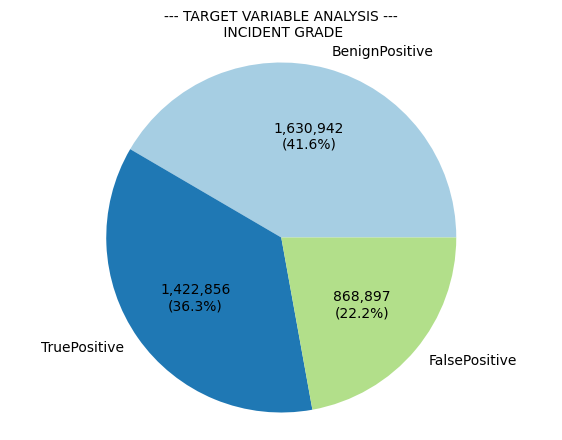

In [156]:
# TARGET VARIABLE ANALYSIS
grade_counts = clean_df['IncidentGrade'].value_counts()
def autopct_format(pct, sizes = grade_counts.values):
    count = int(round(pct/100.*sum(sizes)))
    return f"{count:,}\n({pct:.1f}%)"

plt.figure(figsize=(7, 5))
plt.pie(grade_counts, labels=grade_counts.index, autopct=lambda pct: autopct_format(pct), colors=plt.cm.Paired.colors)
plt.title('--- TARGET VARIABLE ANALYSIS ---\n INCIDENT GRADE', fontsize=10)
plt.axis('equal')
plt.show()

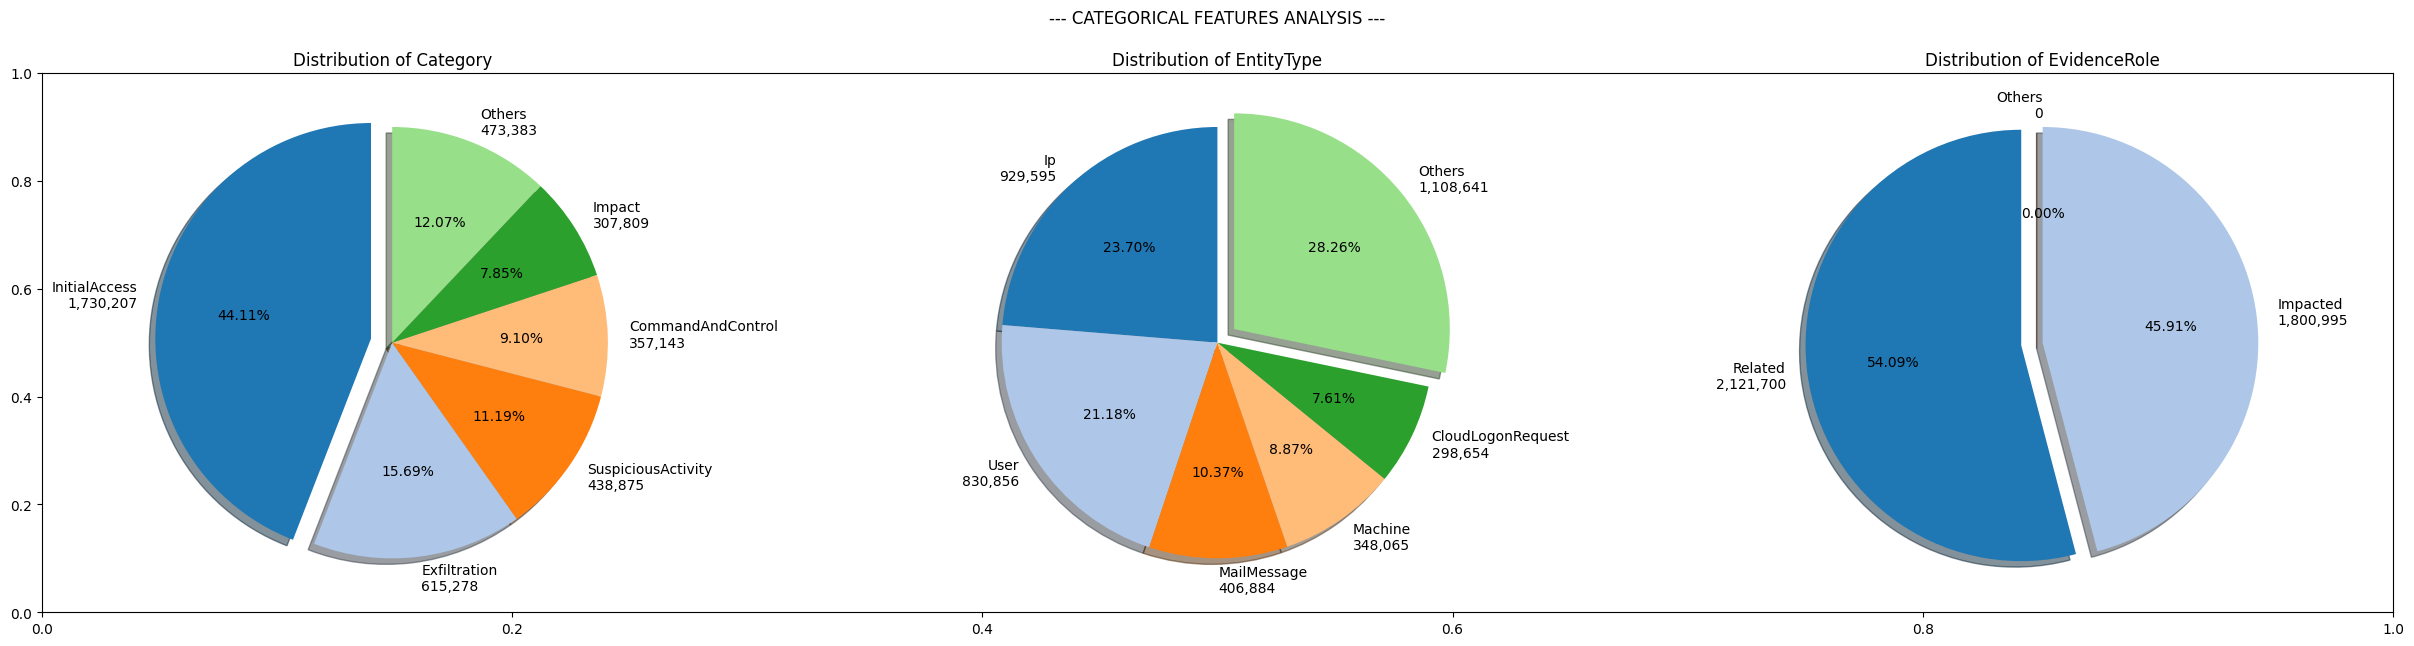

In [157]:
# CATEGORICAL FEATURES ANALYSIS
plt.figure(figsize=(25, 7))
plt.title("--- CATEGORICAL FEATURES ANALYSIS ---\n\n")

cols = ['Category', 'EntityType', 'EvidenceRole']
for i, col in enumerate(cols):
    value_counts = clean_df[col].value_counts()
    
    top_5 = value_counts.nlargest(5)
    others = value_counts.iloc[5:].sum()
    top_5['Others'] = others
    
    labels = [f"{cat}\n{count:,}" for cat, count in top_5.items()]
    explode = [0.1 if cat == top_5.idxmax() else 0 for cat in top_5.index]
    colors = plt.cm.tab20.colors[:len(top_5)]

    # Plot pie chart
    plt.subplot(1, 3, i + 1)
    plt.title(f'\nDistribution of {col}')
    plt.pie(top_5, labels=labels, autopct='%2.2f%%', startangle=90, colors=colors, explode=explode, shadow=True)

plt.tight_layout()
plt.show()

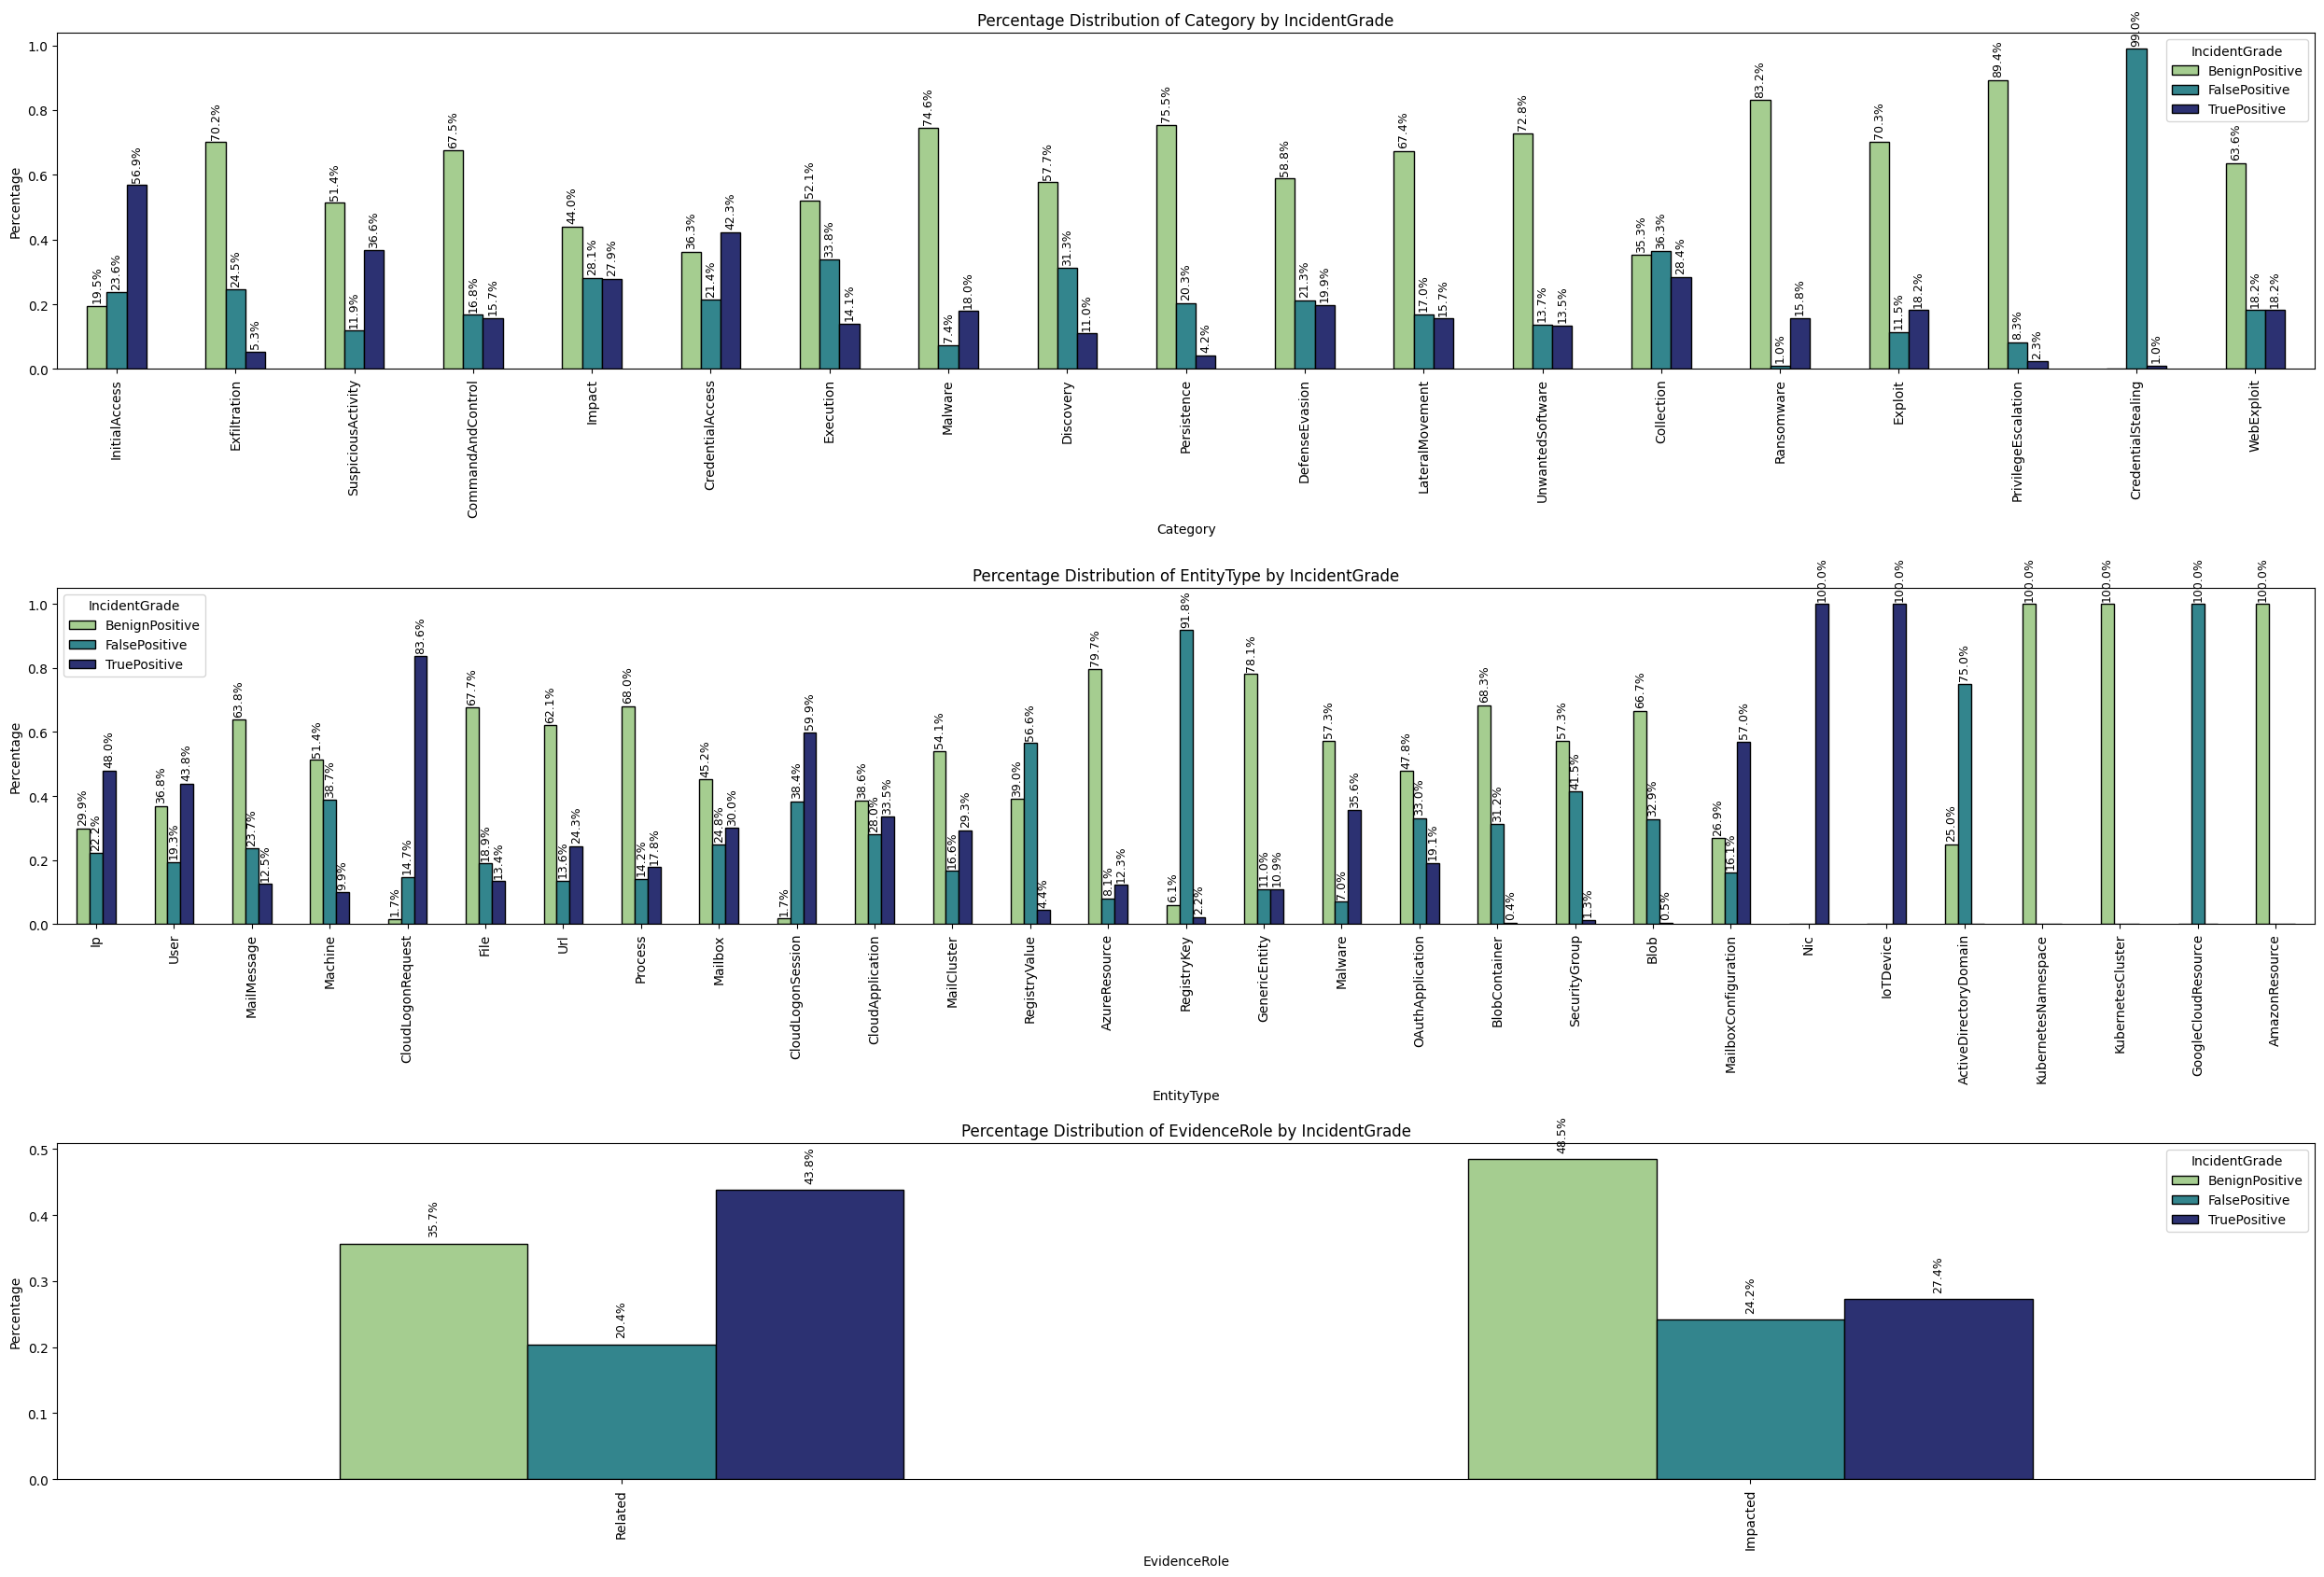

In [158]:
cols_to_plot = [col for col in cat_features if col != 'IncidentGrade']
fig, axes = plt.subplots(3, 1, figsize=(25, 17))
axes = axes.flatten()

for idx, col in enumerate(cols_to_plot): 
    cross_tab = pd.crosstab(clean_df[col], clean_df['IncidentGrade'], normalize='index')
    order = clean_df[col].value_counts().index
    cross_tab = cross_tab.loc[order]

    ax = cross_tab.plot(kind='bar', ax=axes[idx], cmap='crest', edgecolor='black', legend=True)

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', ha='center', va='bottom', fontsize=9, rotation=90)

    ax.set_title(f'Percentage Distribution of {col} by IncidentGrade')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [159]:
def plot_feature_distribution(df, feature_name, target_column='IncidentGrade', top_n=10, figsize=(25, 8), others_label='Others', title_prefix=None, cmap='crest', rotation=0):
    
    value_counts = df[feature_name].value_counts()
    top_categories = value_counts.nlargest(top_n).index.tolist()
    plot_order = top_categories + [others_label]
    
    mapped_feature = df[feature_name].apply(lambda x: x if x in top_categories else others_label)
    
    filtered_df = df.copy()
    mapped_column_name = f'Mapped_{feature_name}'
    filtered_df[mapped_column_name] = mapped_feature
    
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    if title_prefix is None:
        title_prefix = feature_name
    
    # ============ COUNT PLOT ============
    sns.countplot(data=filtered_df, x=mapped_column_name, order=plot_order, ax=ax[0], legend=False)
    
    total = len(filtered_df)
    for p in ax[0].patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax[0].annotate(f'{count:,}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., count), ha='center', va='bottom', fontsize=10)
    
    ax[0].set_title(f'Top {top_n} {title_prefix} & {others_label} - Count Distribution')
    ax[0].set_xlabel(title_prefix)
    ax[0].set_ylabel('Count')
    
    # ============ INCIDENT GRADE DISTRIBUTION PLOT ============
    feature_ct = pd.crosstab(filtered_df[mapped_column_name], filtered_df[target_column], normalize='index')
    safe_plot_order = [cat for cat in plot_order if cat in feature_ct.index]
    feature_ct = feature_ct.loc[safe_plot_order]
    feature_ct.plot(kind='bar', ax=ax[1], cmap=cmap)
    
    for container in ax[1].containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + 0.01, f'{height * 100:.2f}%', ha='center', va='bottom', fontsize=10, rotation=90)
    
    ax[1].set_title(f'Top {top_n} {title_prefix} & {others_label} - {target_column} Distribution')
    ax[1].set_xlabel(title_prefix)
    ax[1].set_ylabel('Proportion')
    
    plt.setp(ax[0].get_xticklabels(), rotation=rotation)
    plt.setp(ax[1].get_xticklabels(), rotation=rotation)
    
    plt.tight_layout()
    plt.show()

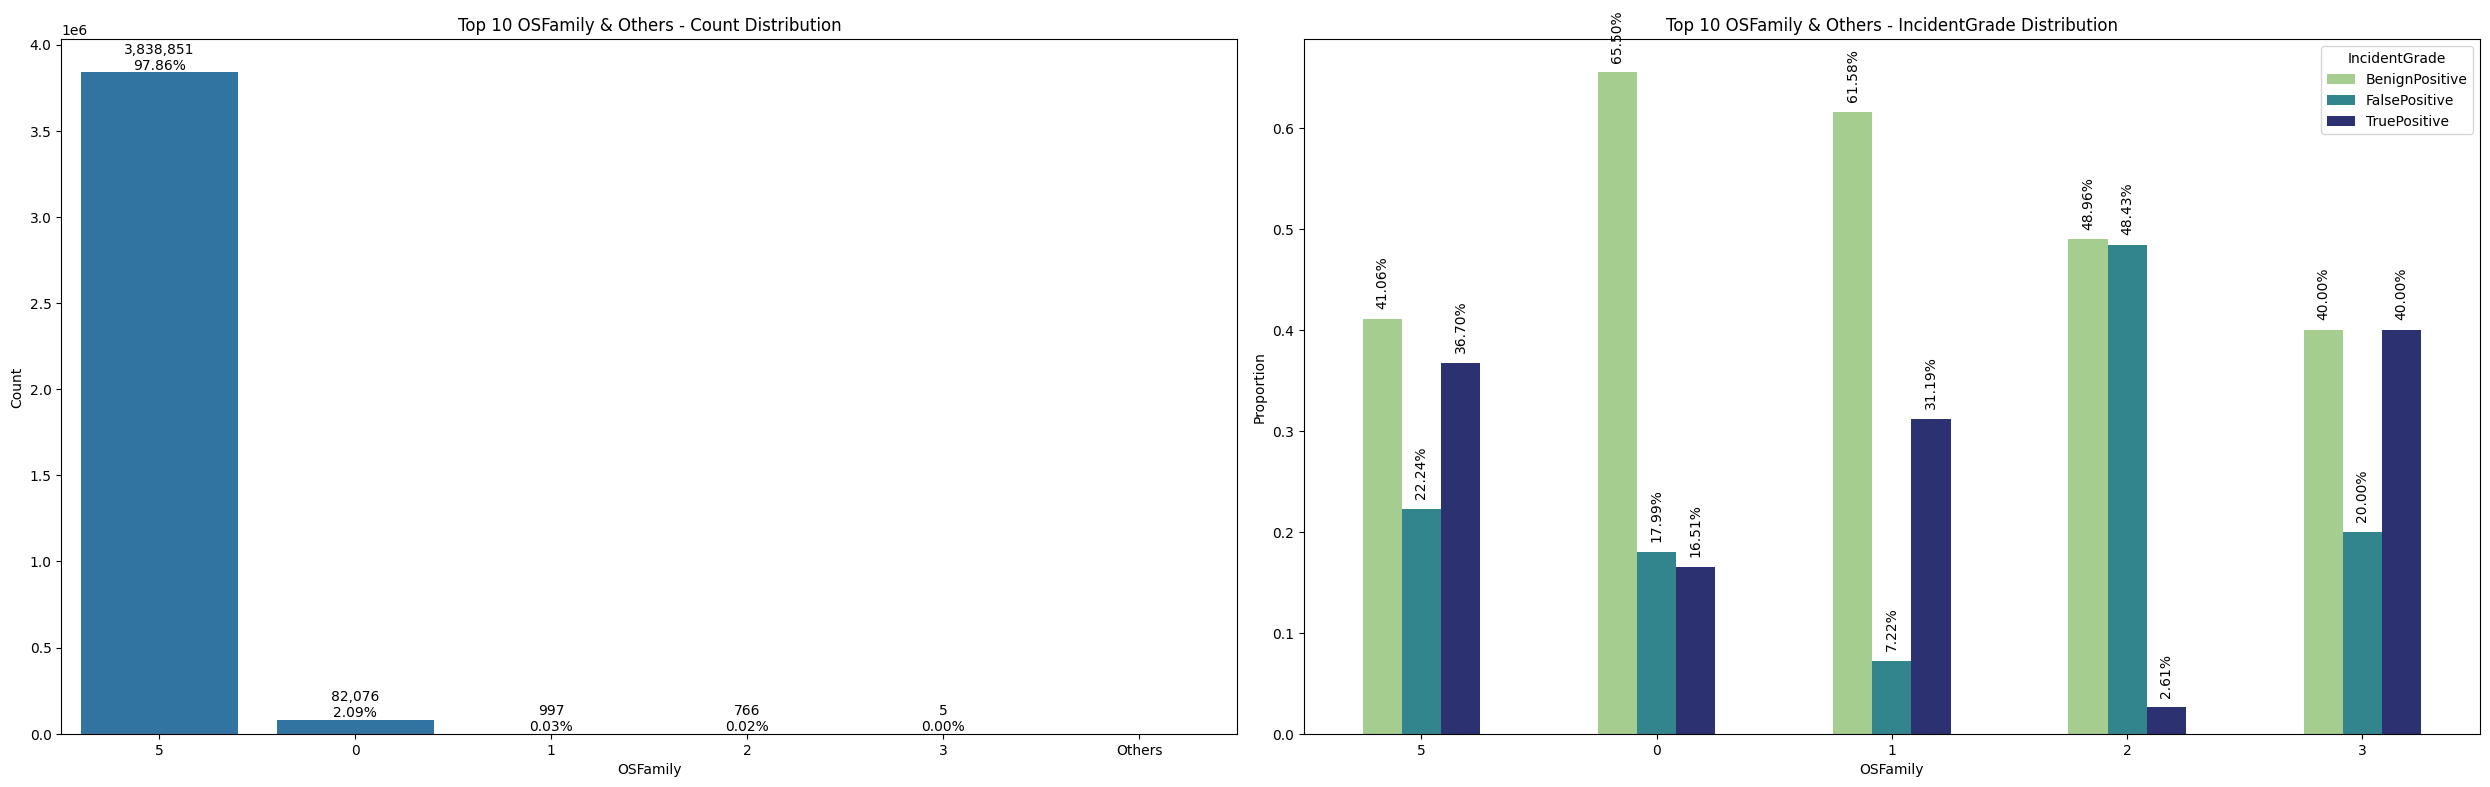

In [160]:
# OSFamily analysis
plot_feature_distribution(clean_df, 'OSFamily')

In [161]:
# OSFamily 5 Analysis
if 'OSFamily' in clean_df.columns and 'OSVersion' in clean_df.columns:
    osf_5 = clean_df[clean_df['OSFamily'] == 5]
    print(f"No. of OSVersions in OSFamily 5: {osf_5['OSVersion'].nunique()}")

    counts = osf_5['OSVersion'].value_counts()
    percentages = (counts / counts.sum()) * 100

    osf_5_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(osf_5_df)

No. of OSVersions in OSFamily 5: 1


Count  Percentage
OSVersion                     
66         3838851       100.0

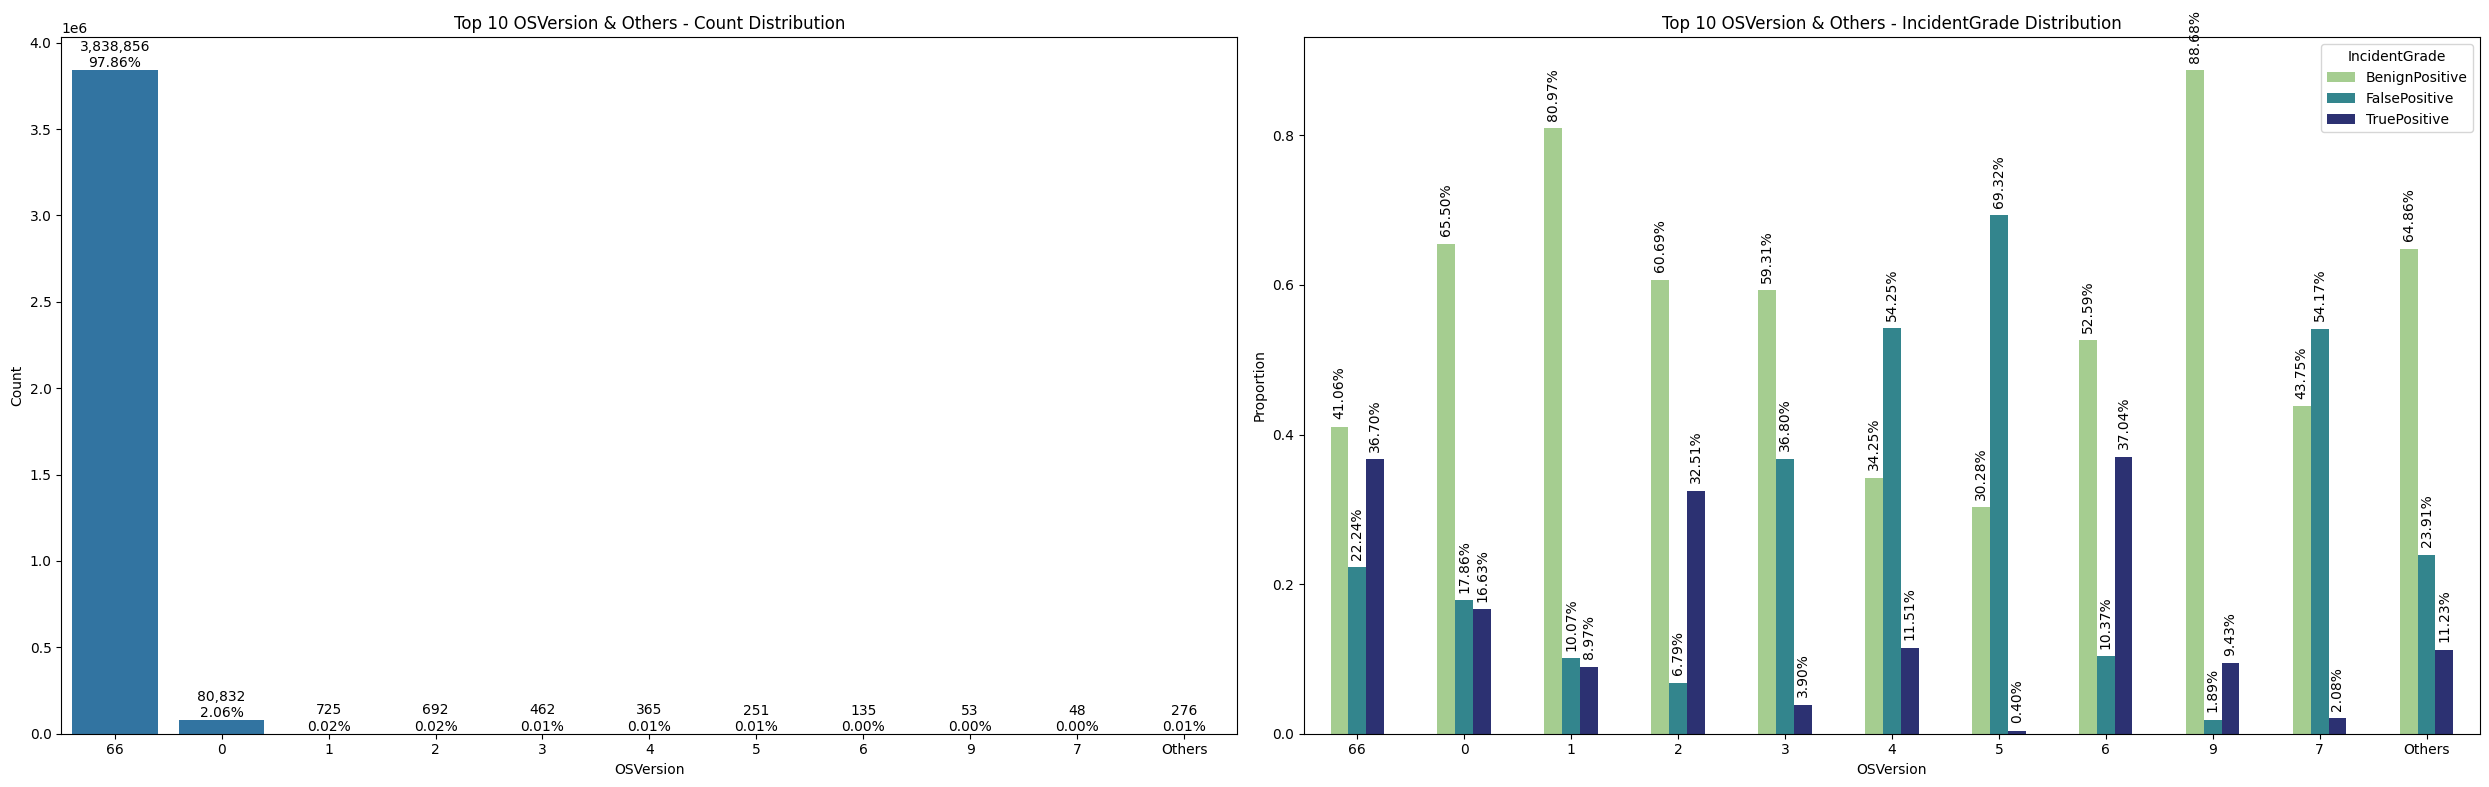

In [162]:
# OSVersion analysis
plot_feature_distribution(clean_df, 'OSVersion') 

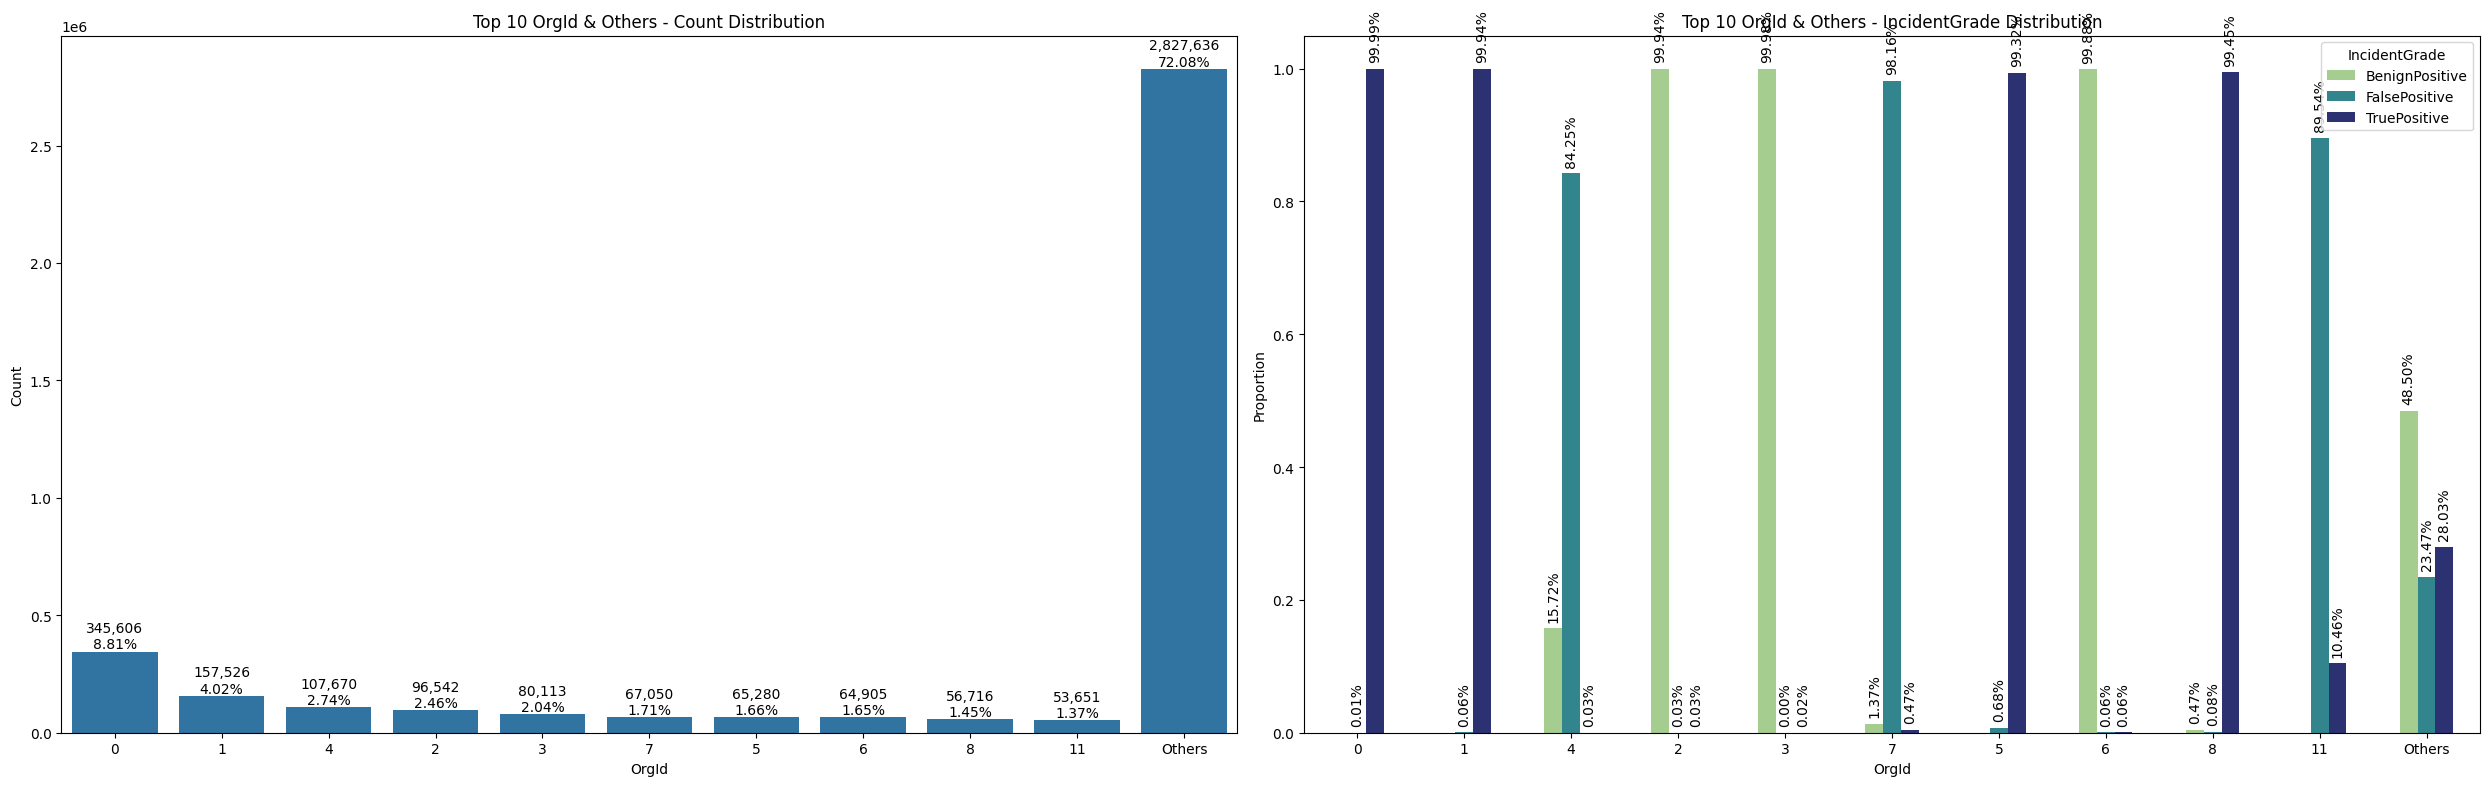

In [163]:
# OrgId analysis
plot_feature_distribution(clean_df, 'OrgId')

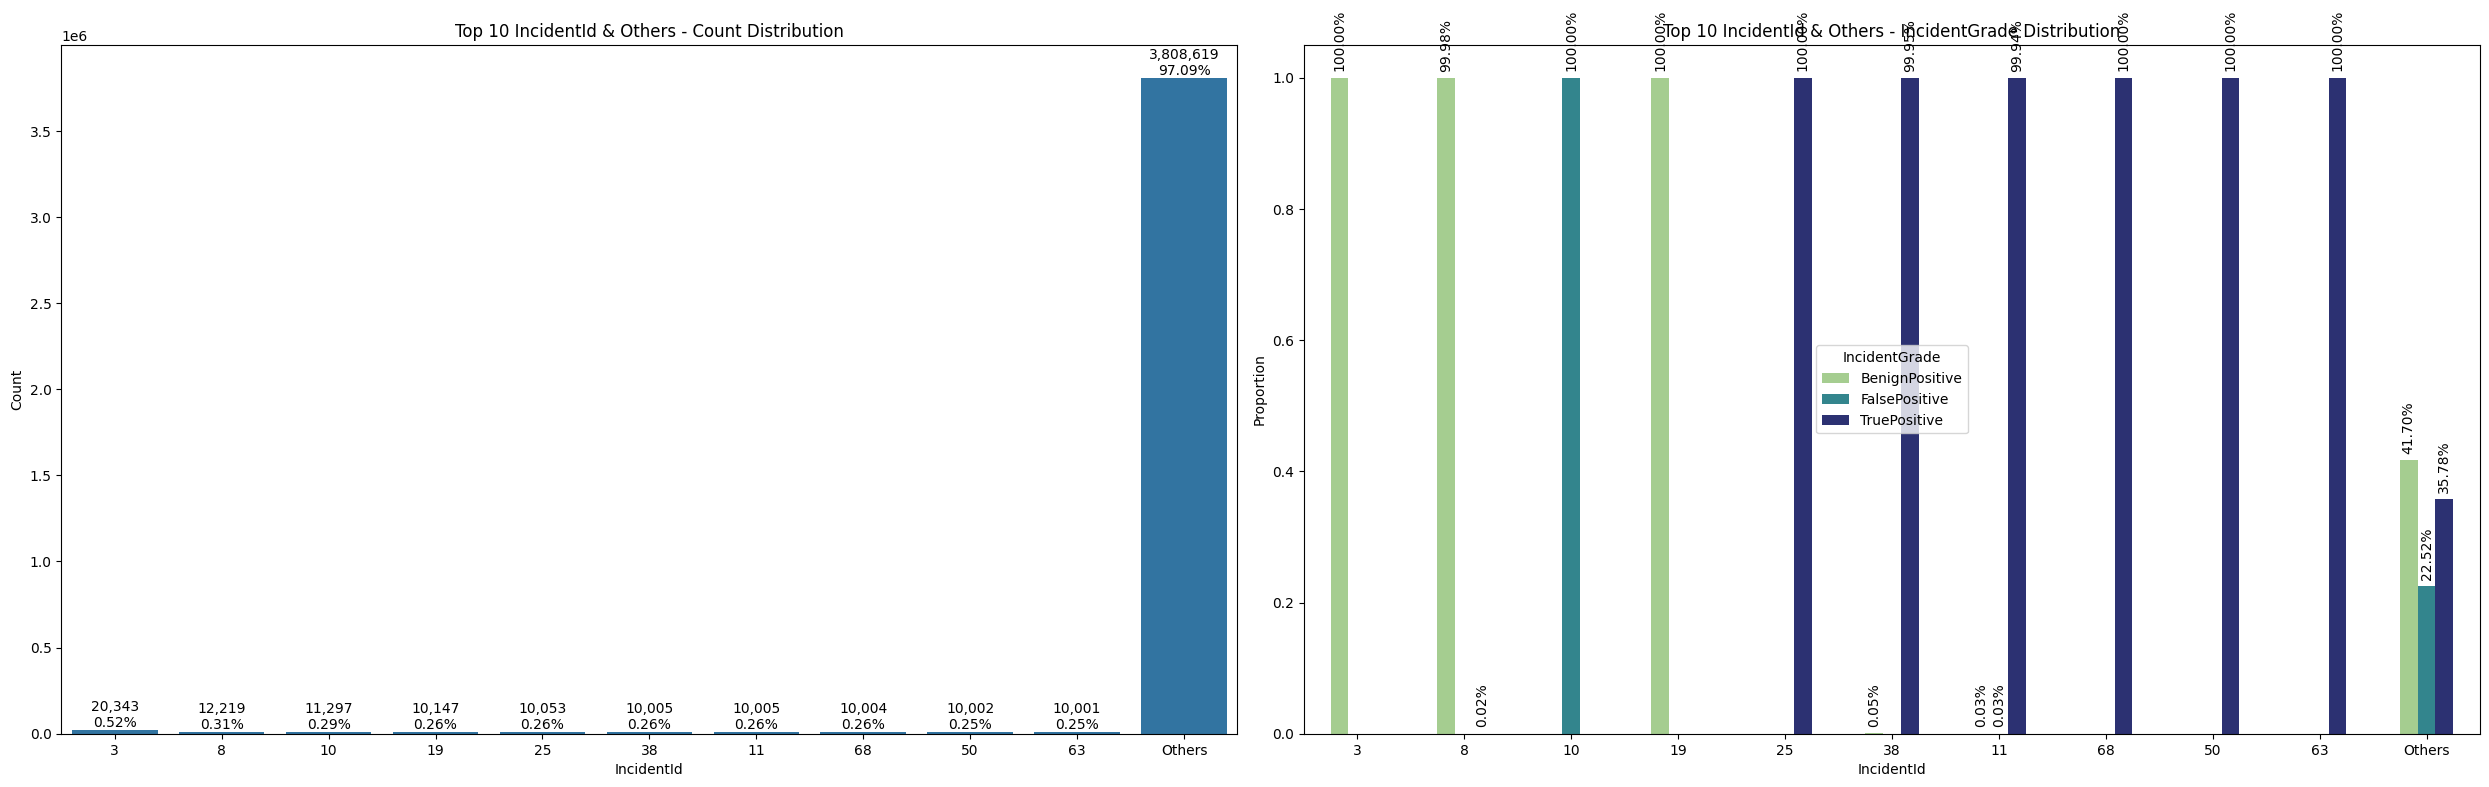

In [164]:
# IncidentId analysis
plot_feature_distribution(clean_df, 'IncidentId')

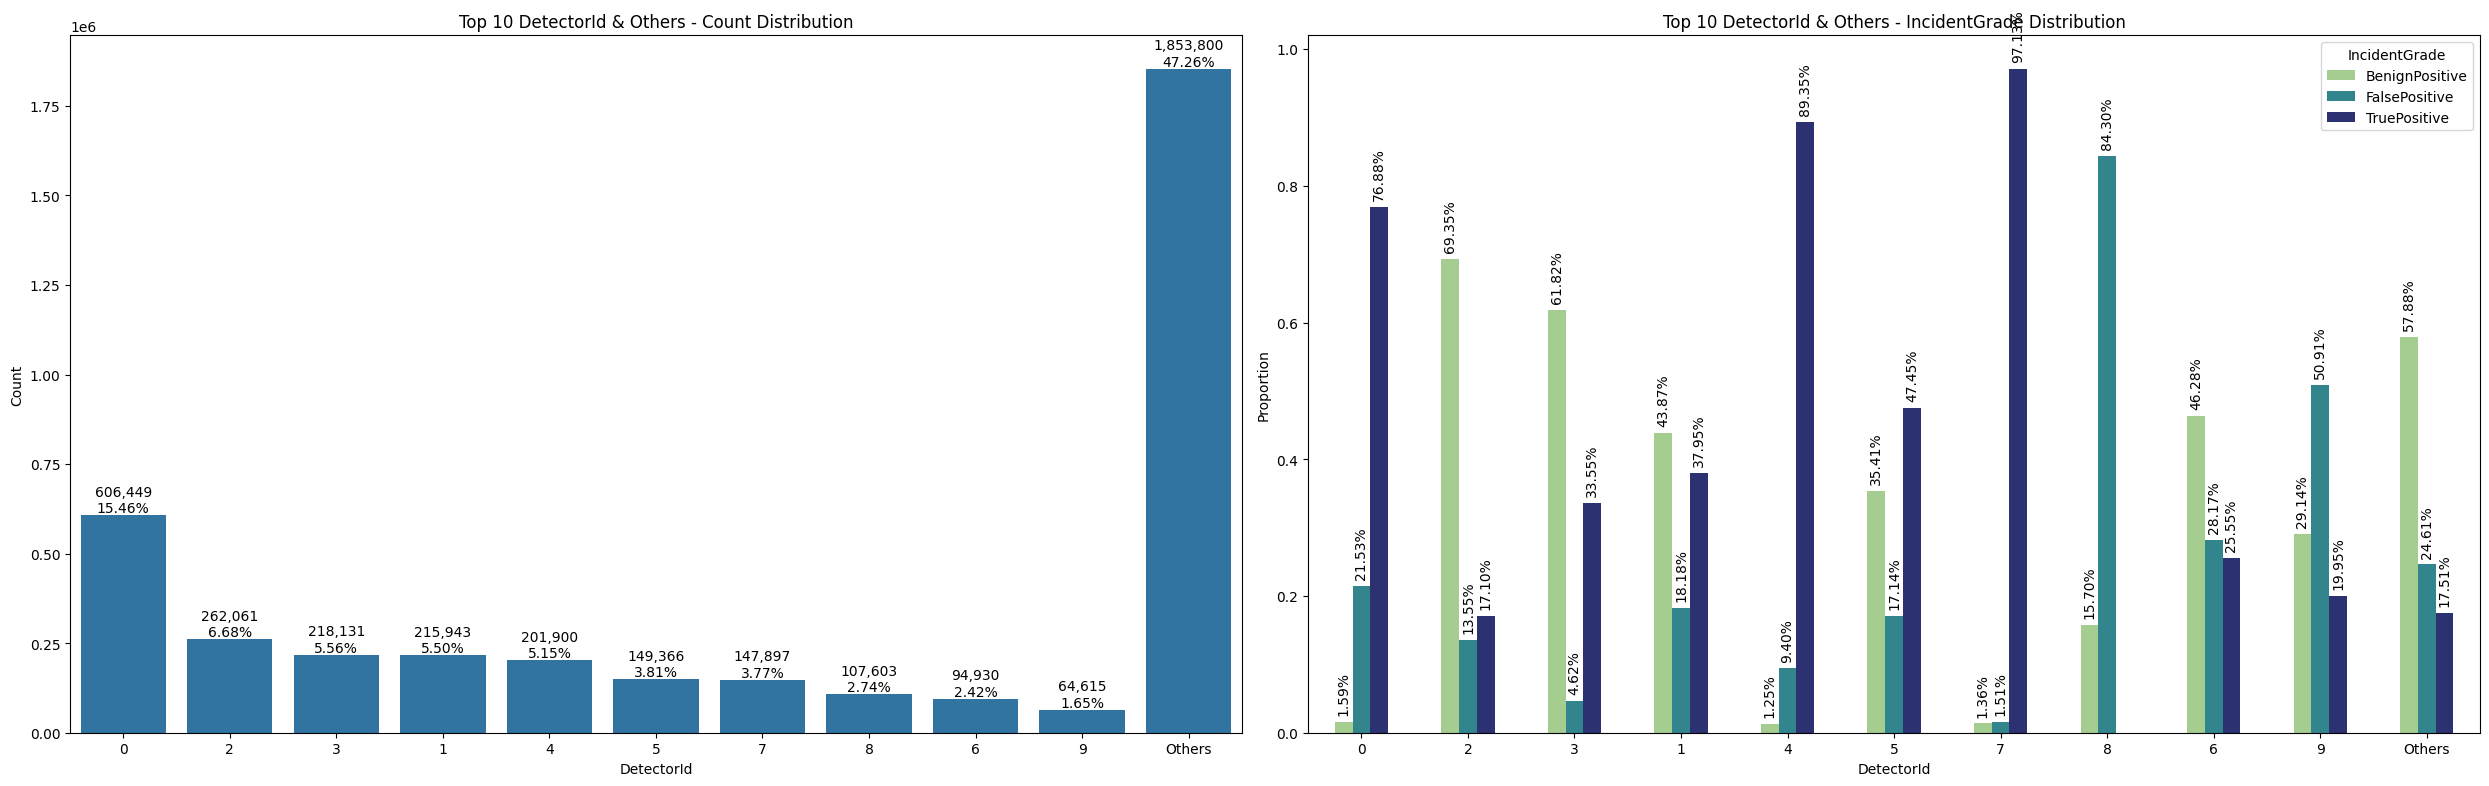

In [165]:
# DetectorId analysis
plot_feature_distribution(clean_df, 'DetectorId')

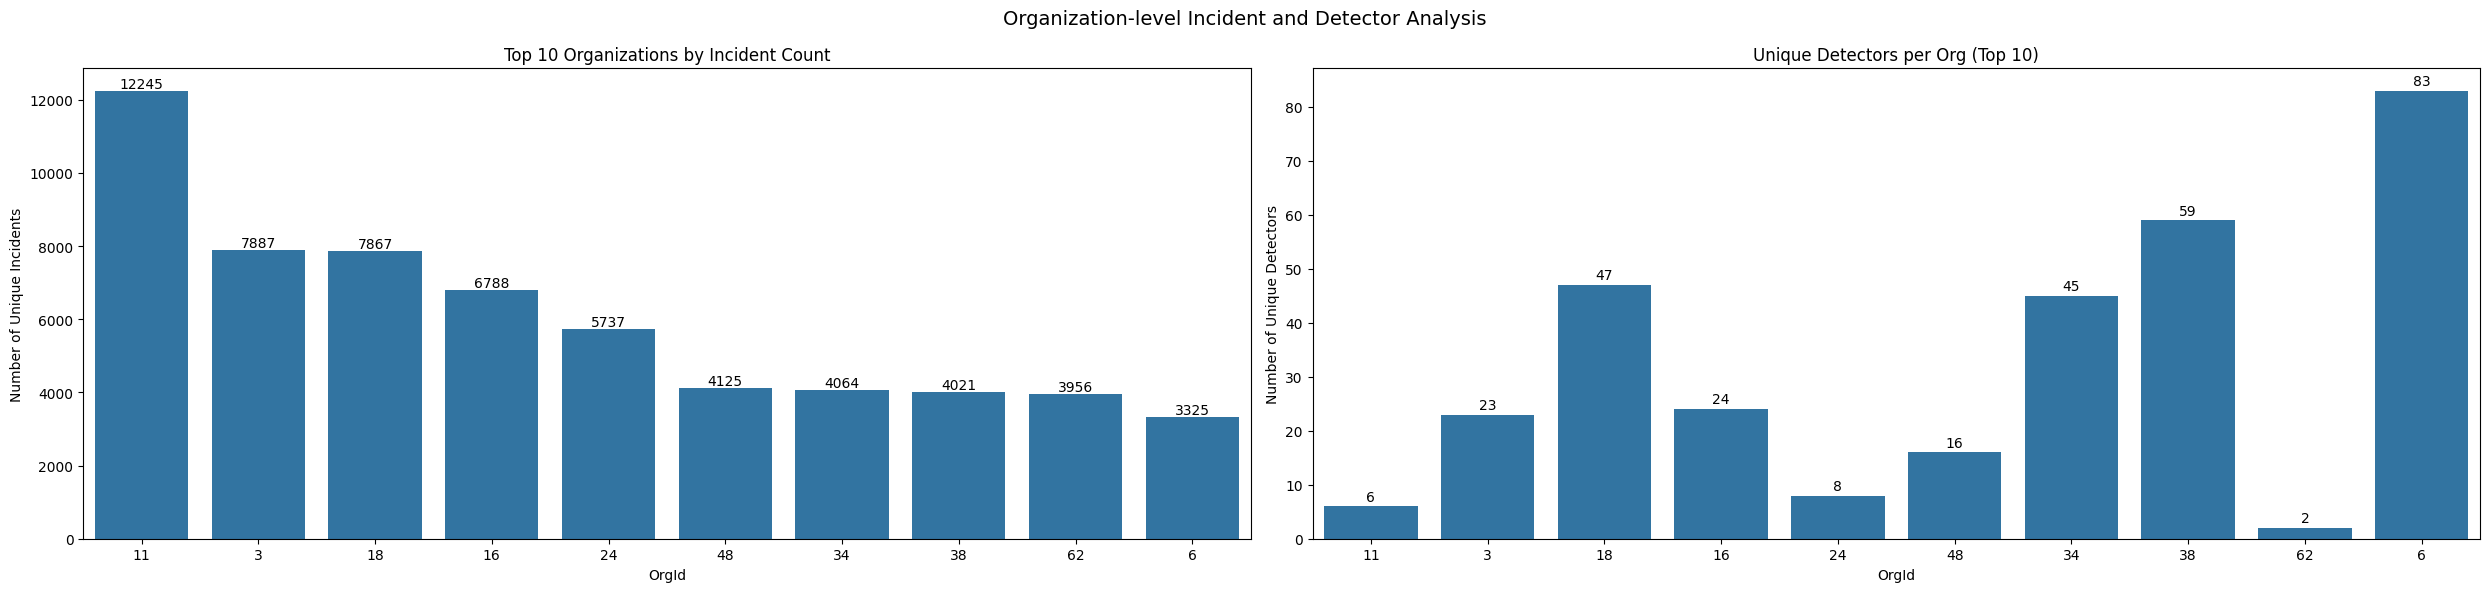

In [166]:
# --- OrgId vs IncidentId Analysis ---
incidents_per_org = clean_df.groupby('OrgId')['IncidentId'].nunique().sort_values(ascending=False)
top_10_orgs = incidents_per_org.head(10)

# --- OrgId vs DetectorId Analysis ---
detectors_per_org = clean_df.groupby('OrgId')['DetectorId'].nunique()
detectors_for_top_orgs = detectors_per_org[top_10_orgs.index]

fig, axes = plt.subplots(1, 2, figsize=(25, 6)) 

# Plot 1: Top 10 OrgId by Incident count
sns.barplot(x=top_10_orgs.index.astype(str), y=top_10_orgs.values, ax=axes[0])
axes[0].set_title('Top 10 Organizations by Incident Count')
axes[0].set_xlabel('OrgId')
axes[0].set_ylabel('Number of Unique Incidents')
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(top_10_orgs.values):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Plot 2: Unique Detectors used by top 10 Orgs
sns.barplot(x=detectors_for_top_orgs.index.astype(str), y=detectors_for_top_orgs.values, ax=axes[1])
axes[1].set_title('Unique Detectors per Org (Top 10)')
axes[1].set_xlabel('OrgId')
axes[1].set_ylabel('Number of Unique Detectors')
axes[1].tick_params(axis='x', rotation=0)
for i, v in enumerate(detectors_for_top_orgs.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.suptitle('Organization-level Incident and Detector Analysis', fontsize=14)
plt.tight_layout()
plt.show()

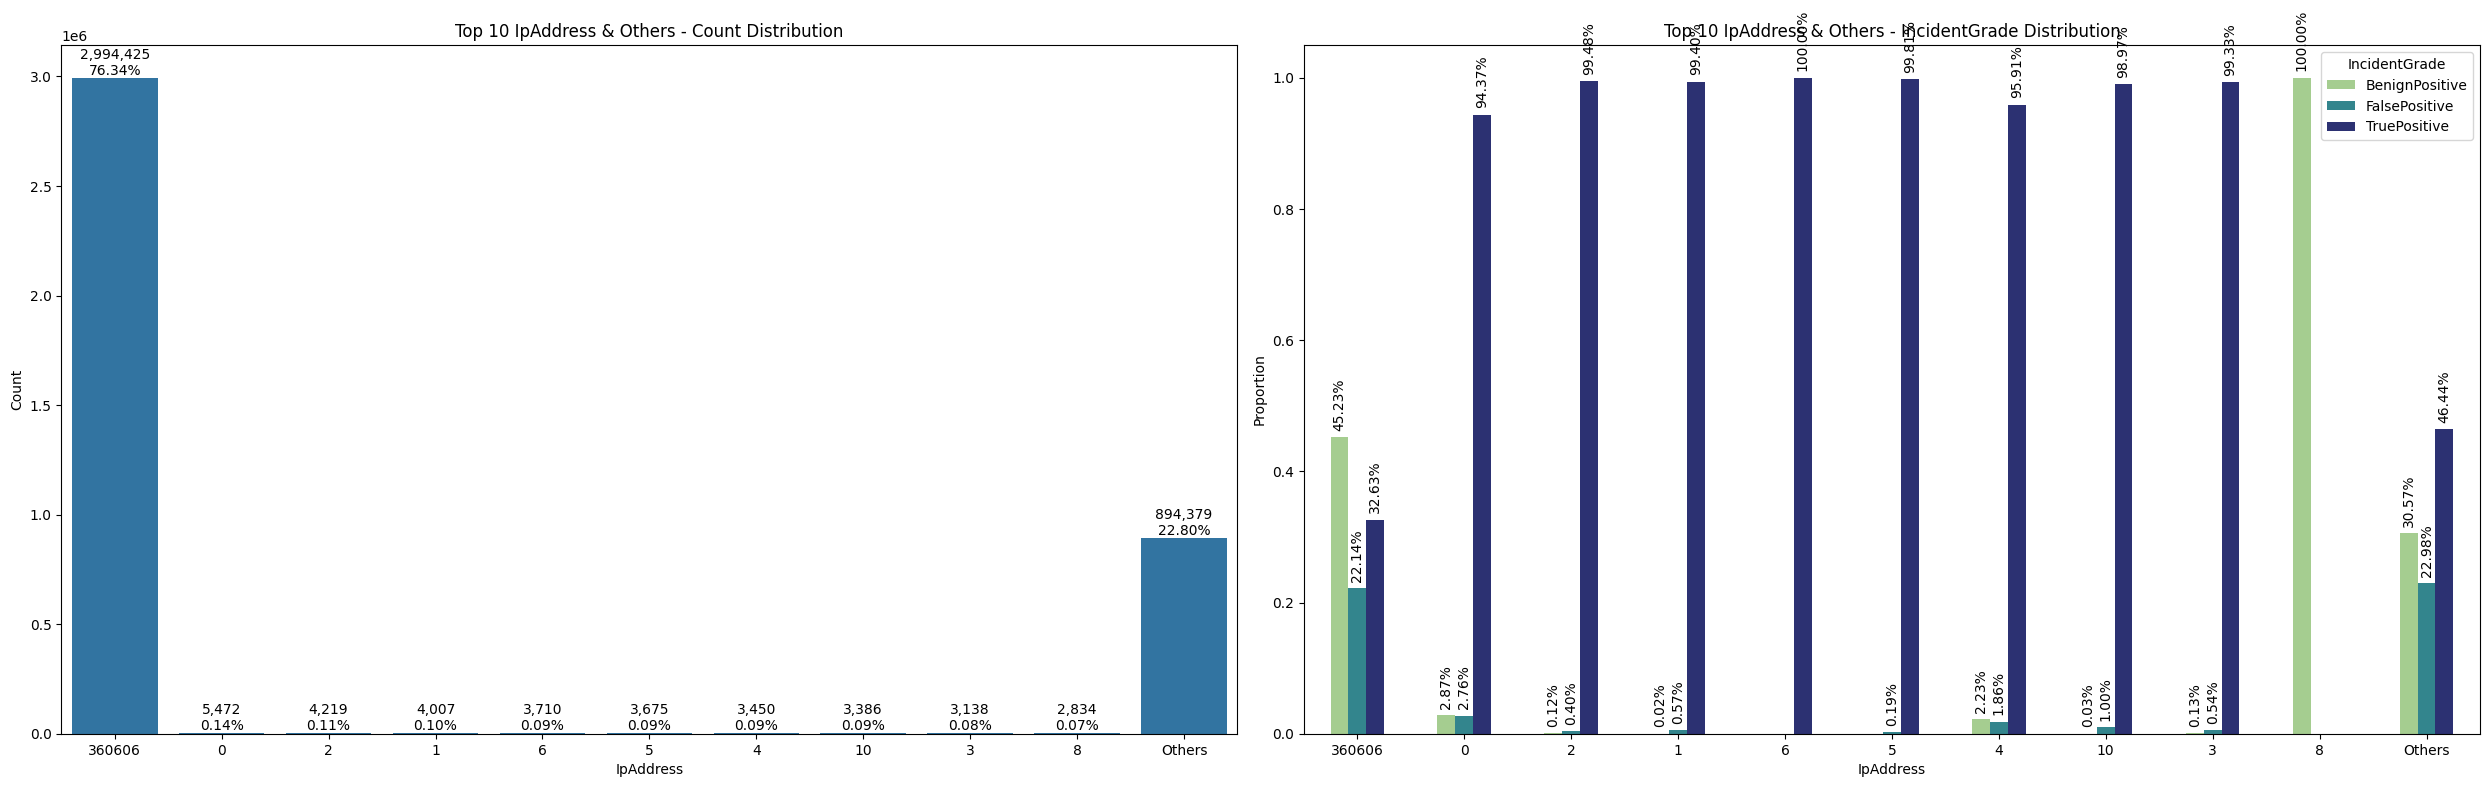

In [167]:
# IpAddress analysis
plot_feature_distribution(clean_df, 'IpAddress')

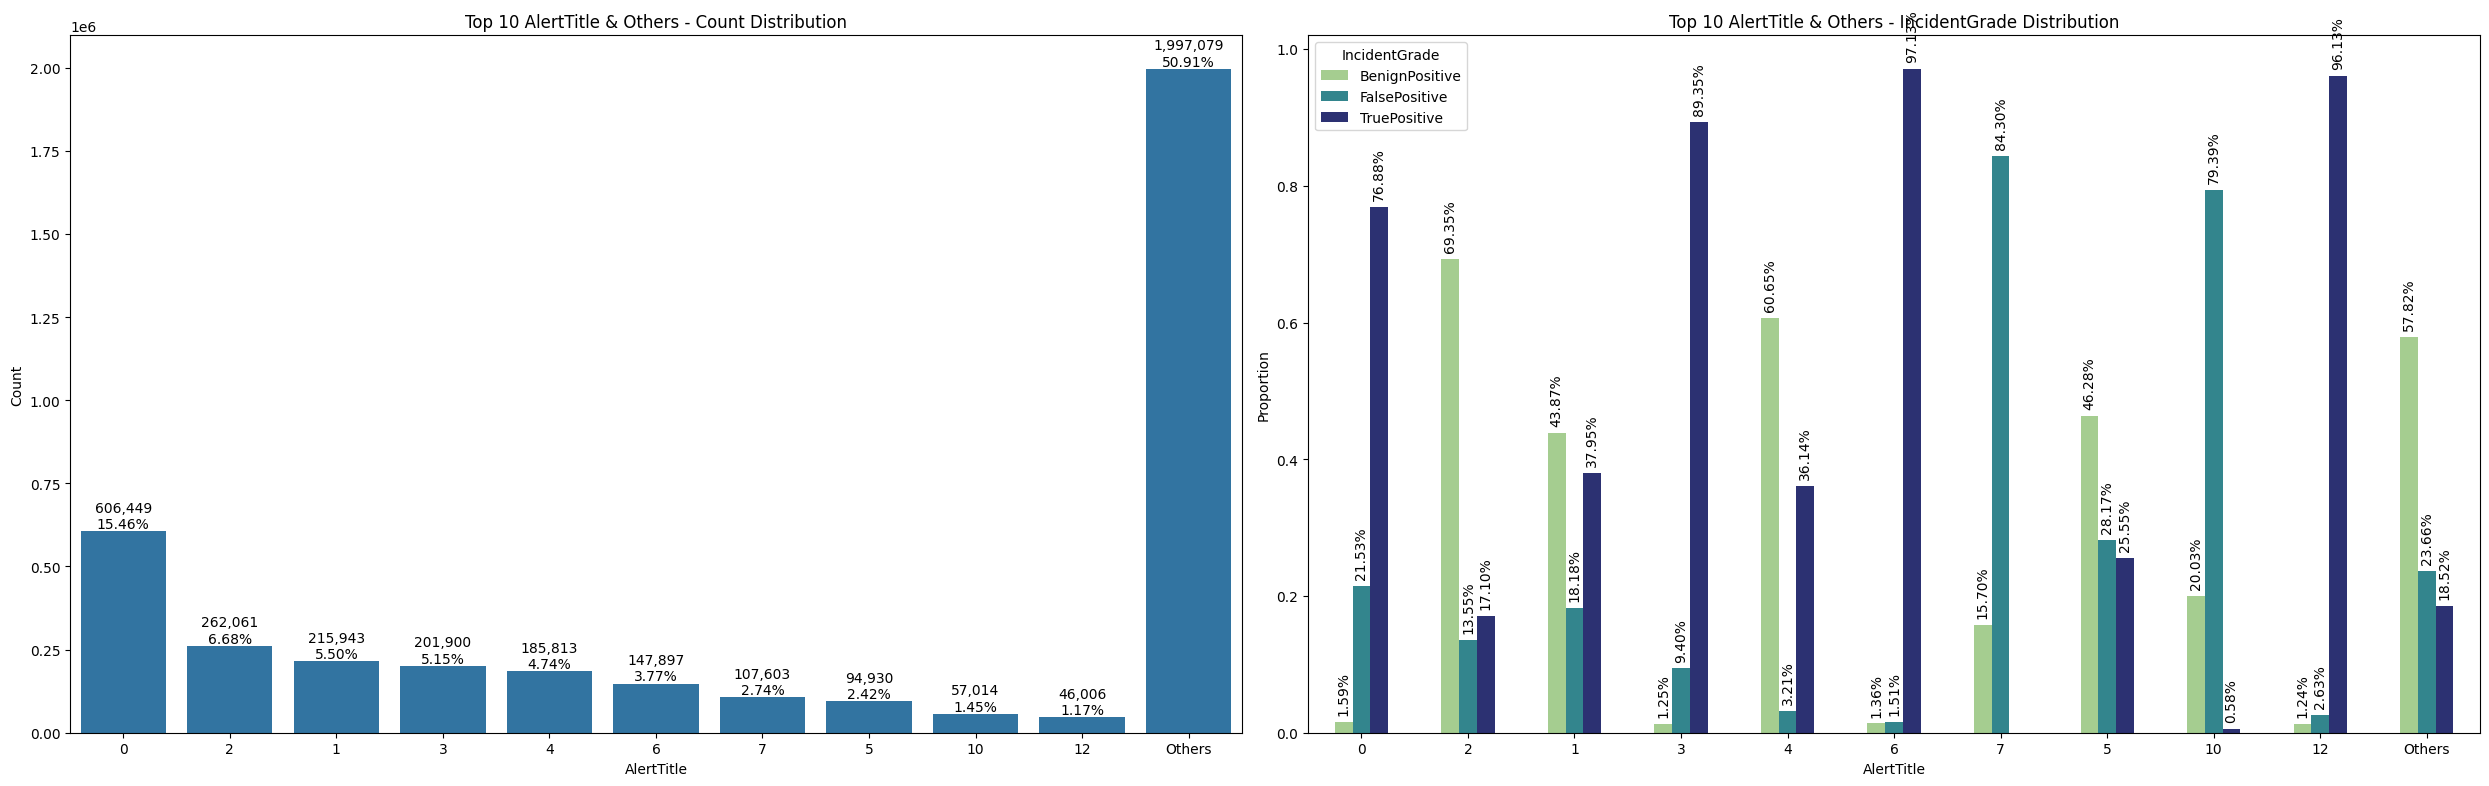

In [168]:
# AlertTitle analysis
plot_feature_distribution(clean_df, 'AlertTitle')

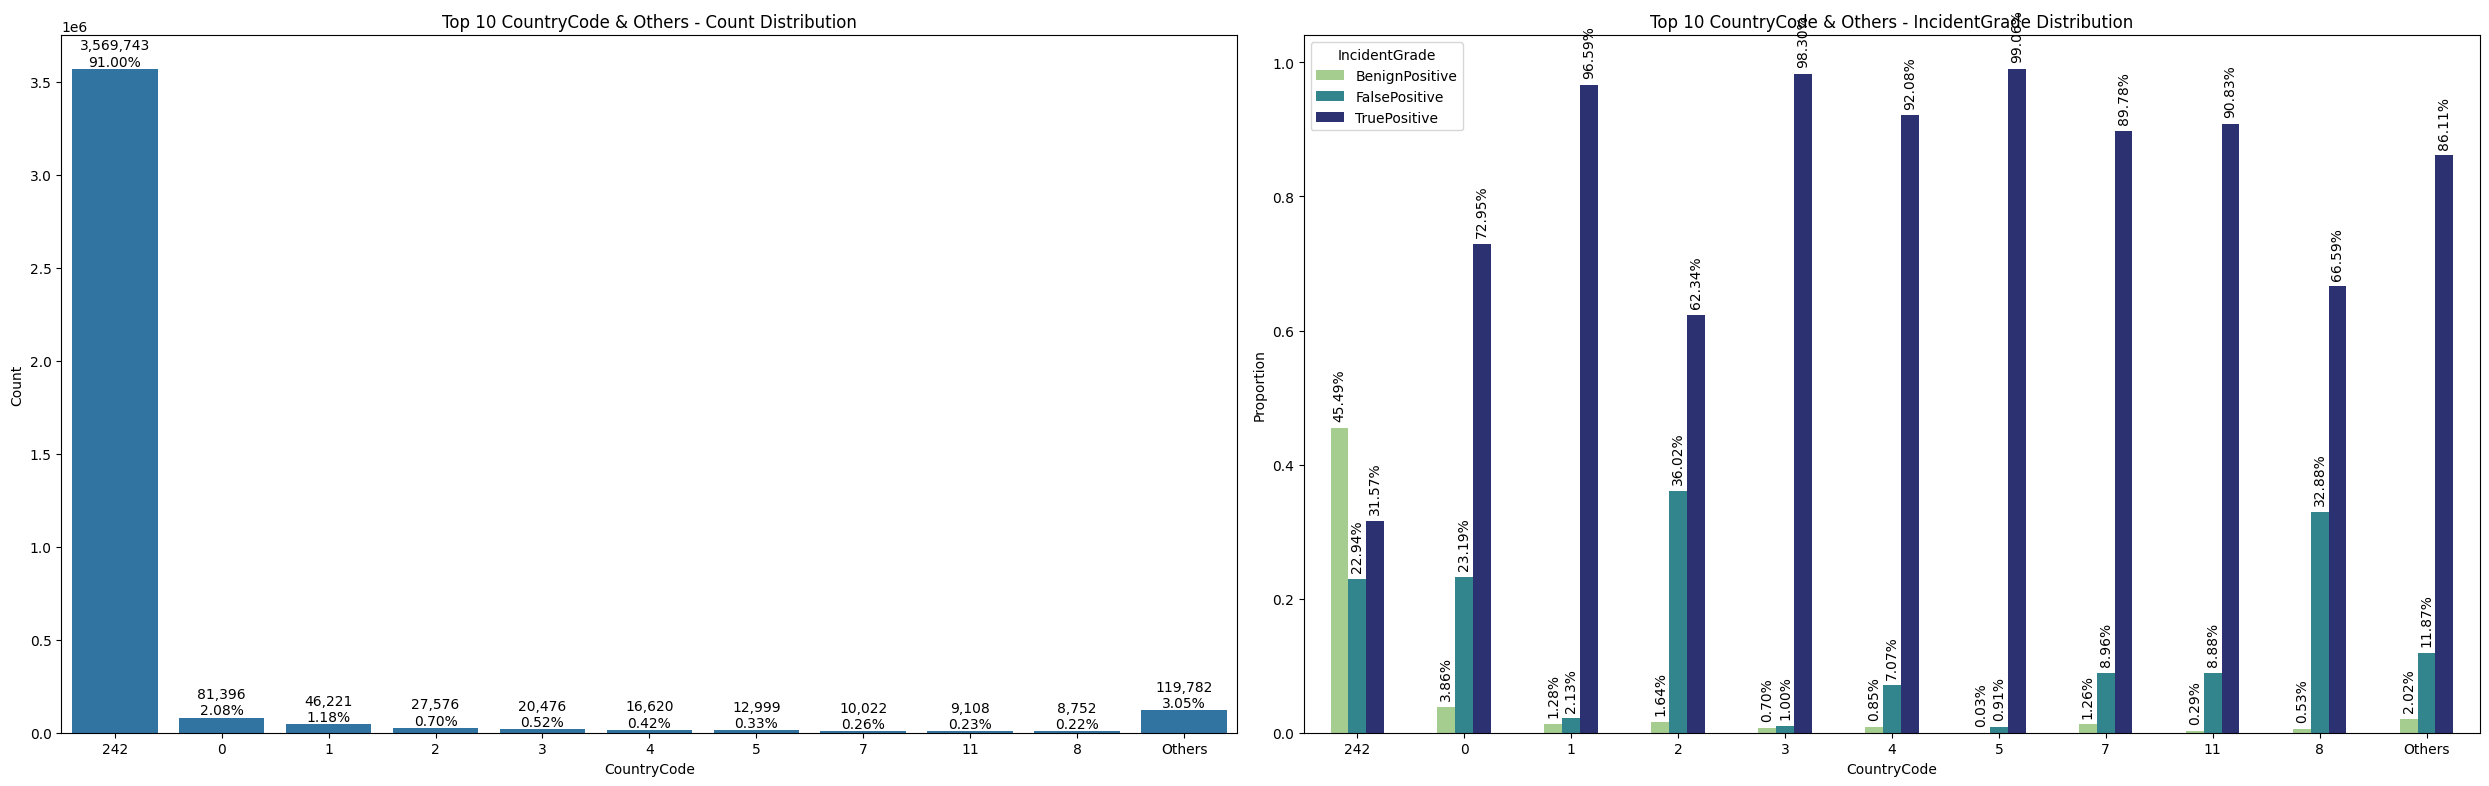

In [169]:
# Country analysis
plot_feature_distribution(clean_df, 'CountryCode')

In [170]:
# Country 242 Analysis
if 'CountryCode' in clean_df.columns and 'State' in clean_df.columns:
    country_242 = clean_df[clean_df['CountryCode'] == 242]
    print(f"No. of States in Country 242: {country_242['State'].nunique()}\n")

    counts = country_242['State'].value_counts()
    percentages = (counts / counts.sum()) * 100

    country_242_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(country_242_df.sort_index(ascending=True))

No. of States in Country 242: 3



Count  Percentage
State                     
1            3    0.000084
12           1    0.000028
1445   3569739   99.999888

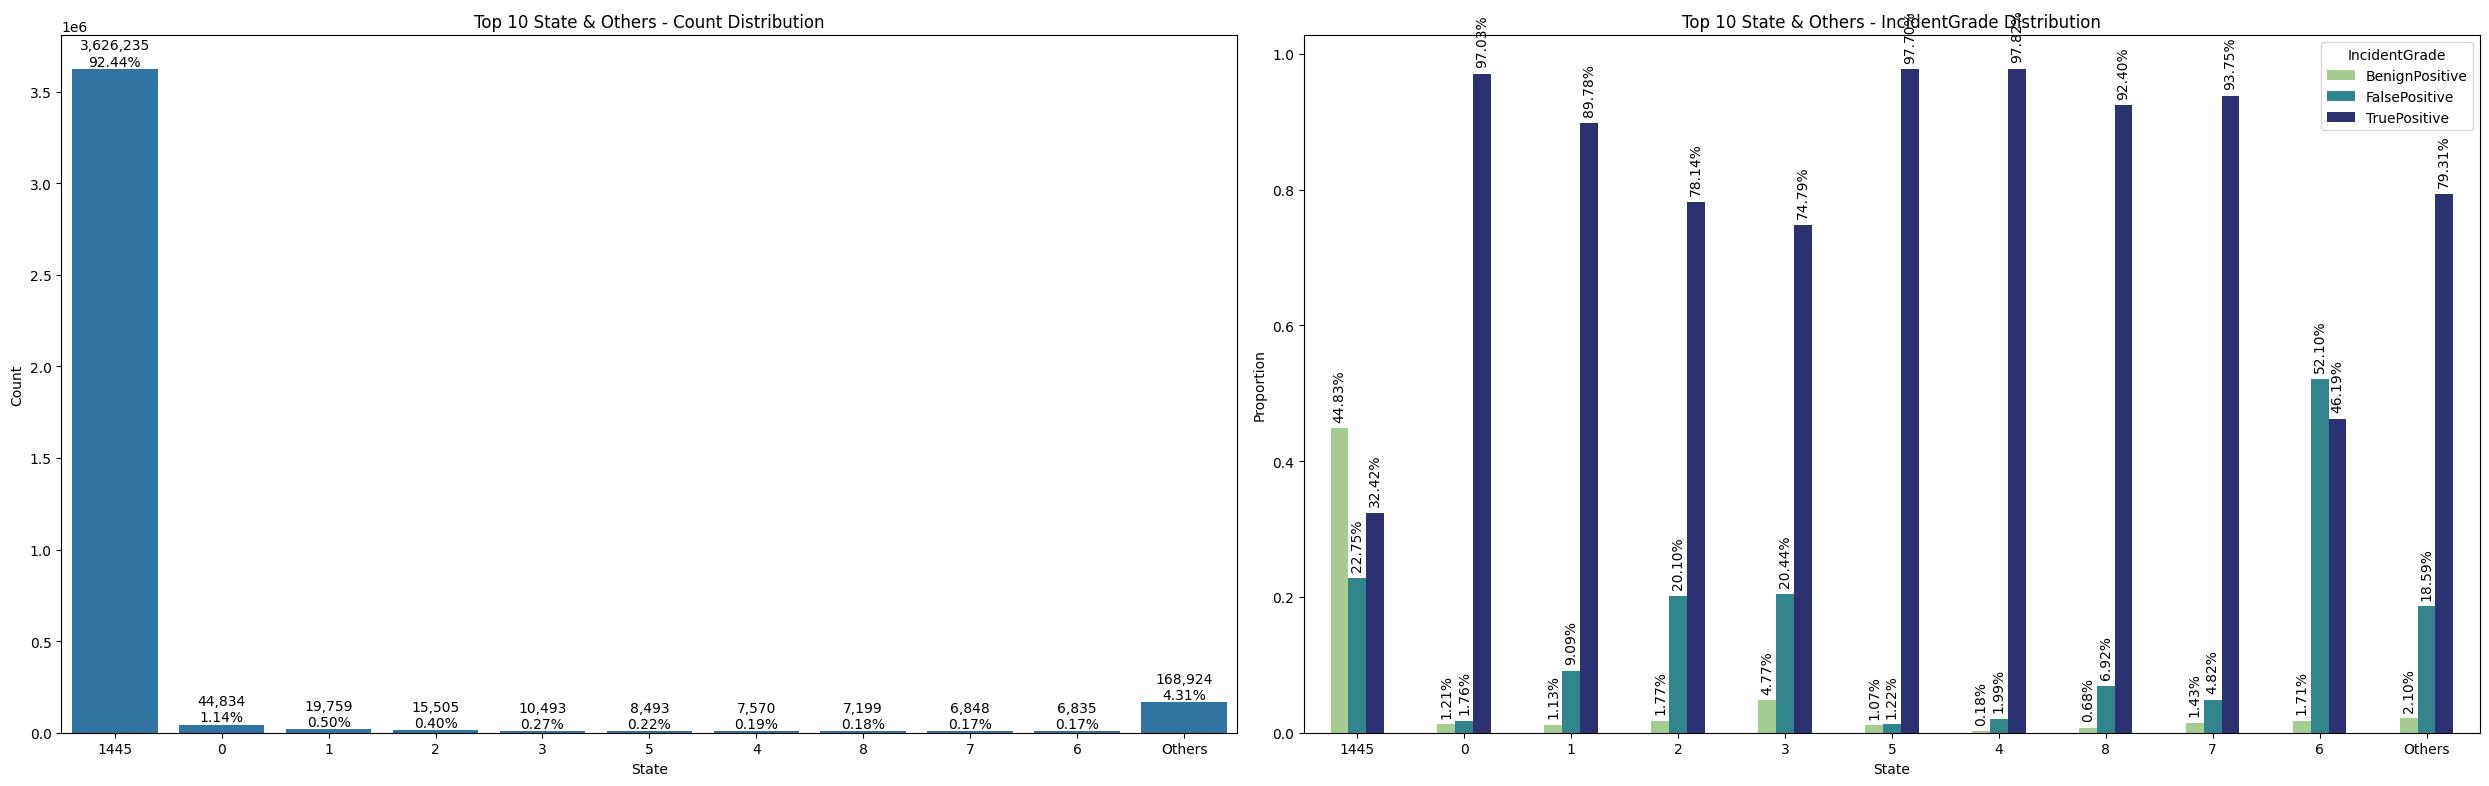

In [171]:
# State analysis
plot_feature_distribution(clean_df, 'State')

In [172]:
# State 1445 Analysis
if 'State' in clean_df.columns and 'City' in clean_df.columns:
    state_1445 = clean_df[clean_df['State'] == 1445]
    print(f"No. of Cities in State 1445: {state_1445['City'].nunique()}")

    counts = state_1445['City'].value_counts()
    percentages = (counts / counts.sum()) * 100

    state_1445_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    display(state_1445_df.sort_values(by='Percentage', ascending=False).head())

No. of Cities in State 1445: 24


Count  Percentage
City                      
10630  3625781   99.987480
3          293    0.008080
379         84    0.002316
314         40    0.001103
1318         5    0.000138

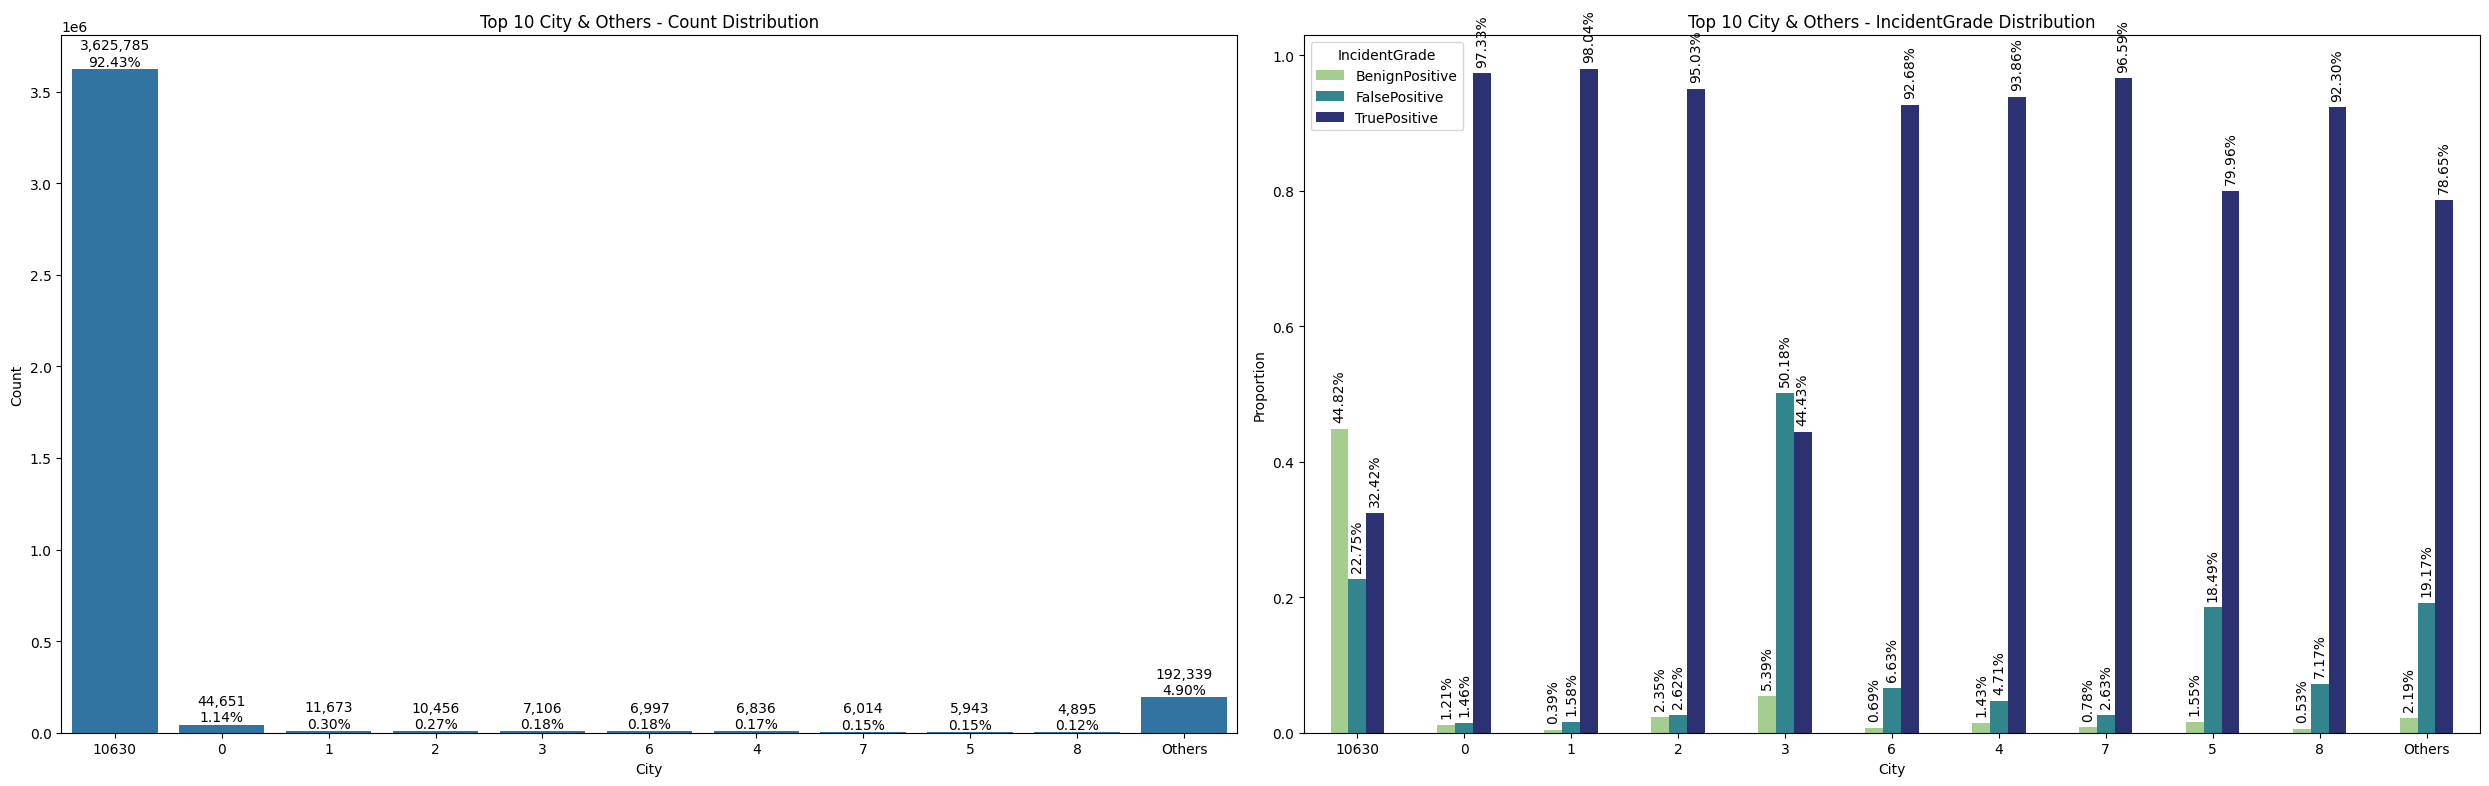

In [173]:
# Ctiy analysis
plot_feature_distribution(clean_df, 'City')

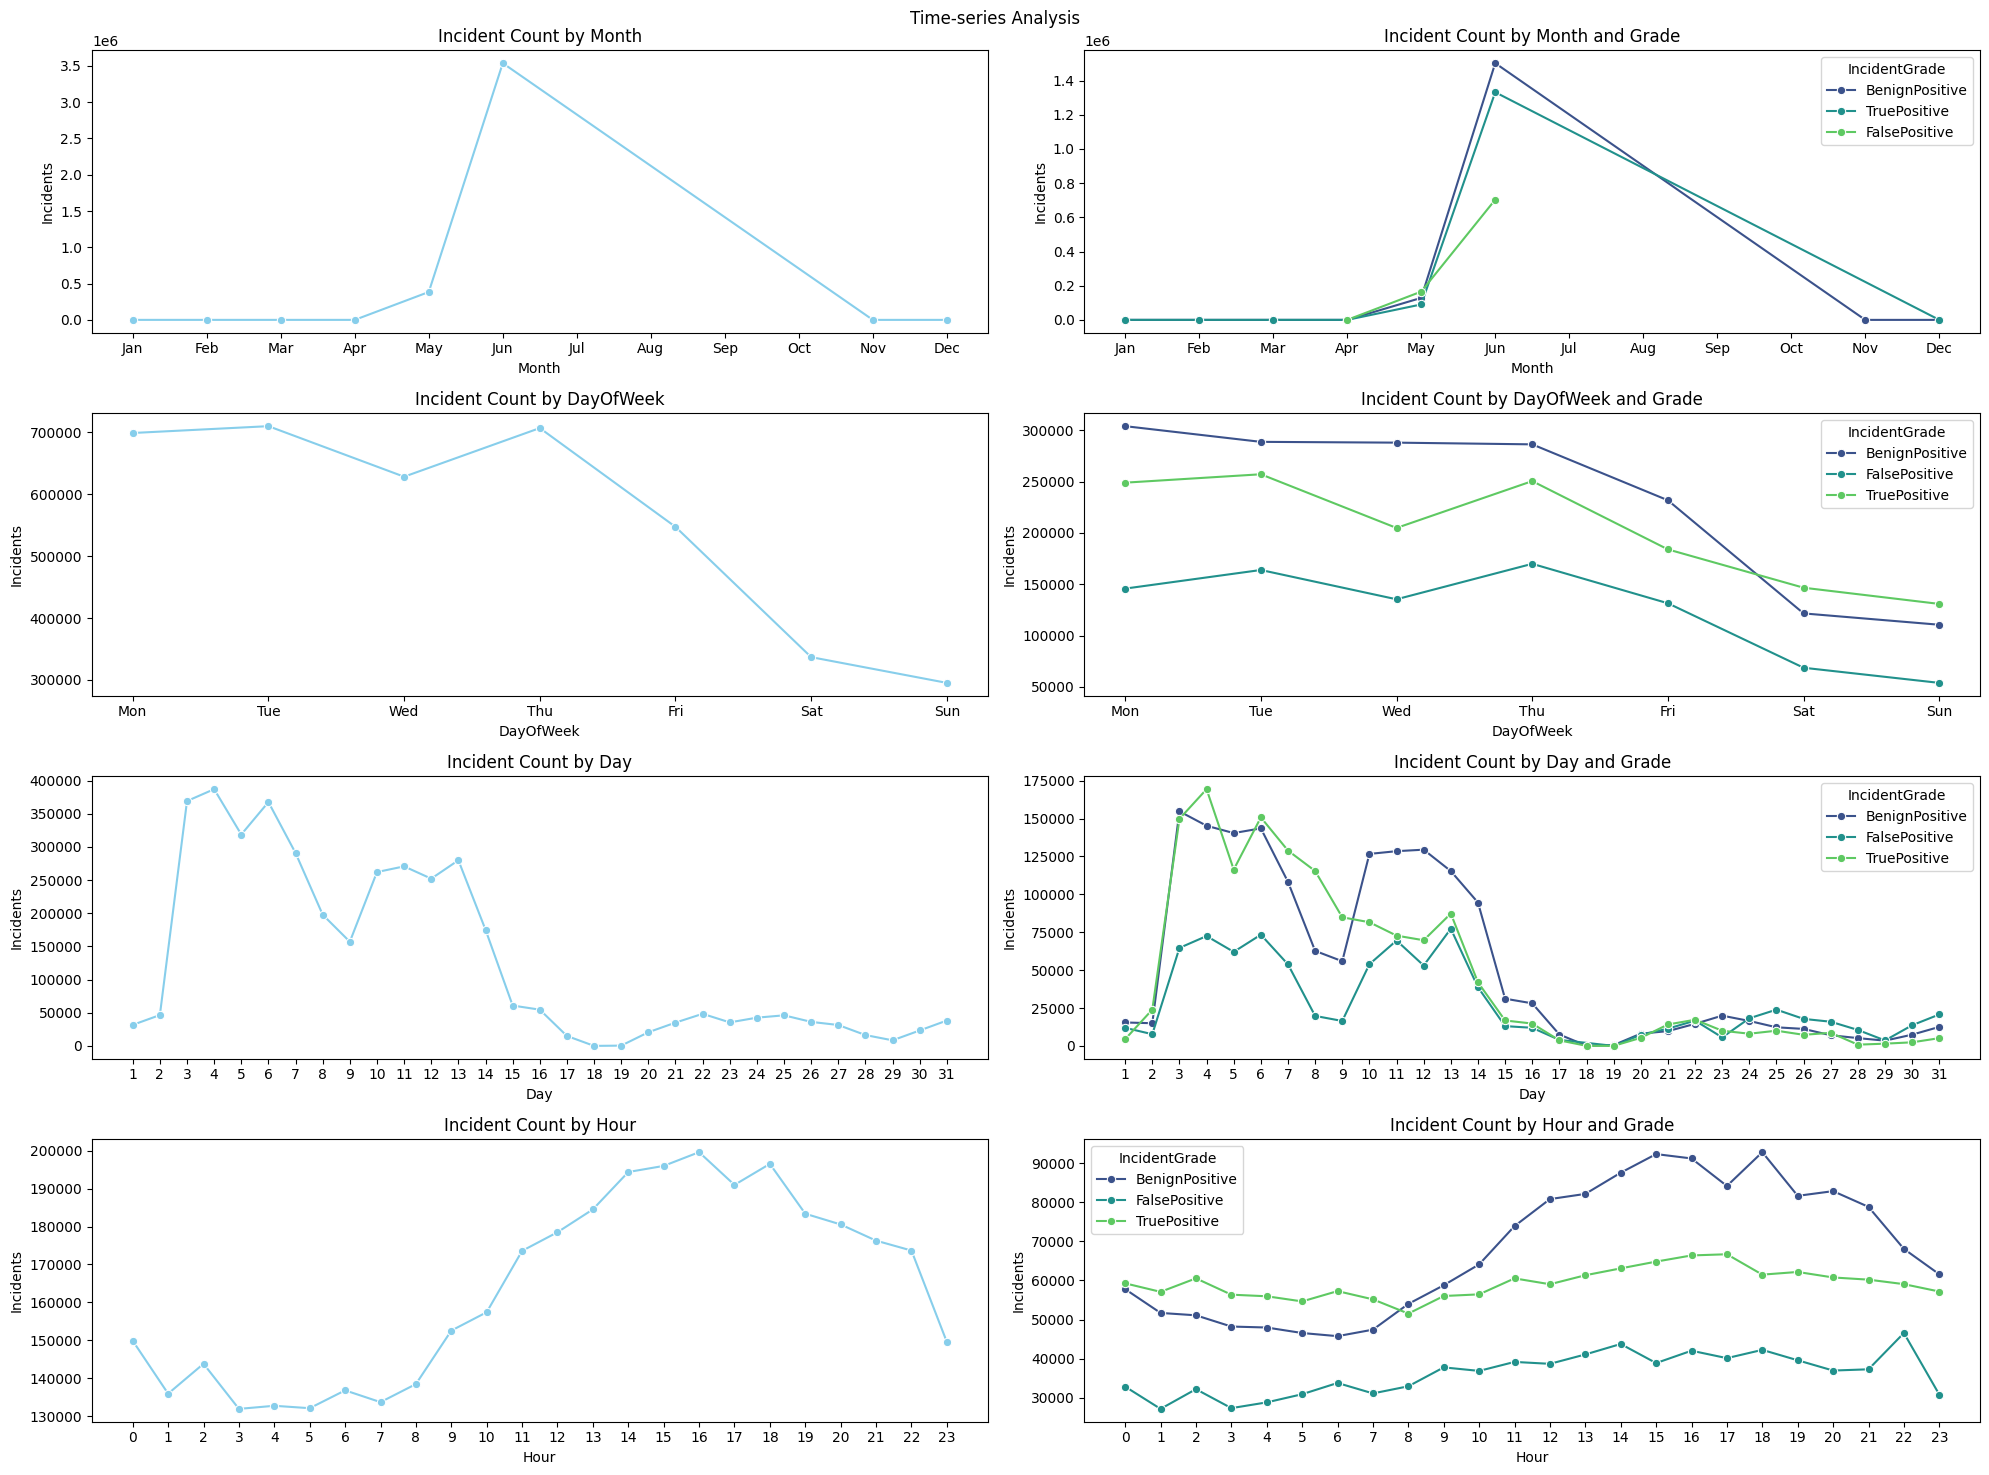

In [174]:
# TIME-SERIES ANALYSIS
def plot_time_series(ax1, ax2, df, col, label_map=None):

    # Plot total count
    counts = df[col].value_counts().sort_index()
    sns.lineplot(ax=ax1, x=counts.index, y=counts.values, marker='o', color='skyblue')
    ax1.set_title(f'Incident Count by {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Incidents')
    if label_map:
        ax1.set_xticks(list(label_map.keys()))
        ax1.set_xticklabels(list(label_map.values()))
    else:
        ax1.set_xticks(sorted(df[col].unique()))

    # Plot count by IncidentGrade
    grouped = df.groupby([col, 'IncidentGrade']).size().reset_index(name='Count')
    sns.lineplot(ax=ax2, data=grouped, x=col, y='Count', hue='IncidentGrade', marker='o', palette='viridis')
    ax2.set_title(f'Incident Count by {col} and Grade')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Incidents')
    if label_map:
        ax2.set_xticks(list(label_map.keys()))
        ax2.set_xticklabels(list(label_map.values()))
    else:
        ax2.set_xticks(sorted(df[col].unique()))

def analyze_temporal_patterns(df):
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))
    plt.suptitle("Time-series Analysis")
    axes = axes.flatten()

    label_maps = {
        'DayOfWeek': {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'},
        'Month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    }

    time_columns = ['Month', 'DayOfWeek', 'Day', 'Hour']

    for i, col in enumerate(time_columns):
        label_map = label_maps.get(col)
        plot_time_series(axes[2*i], axes[2*i+1], df, col, label_map)

    plt.tight_layout()
    plt.show()

analyze_temporal_patterns(clean_df)

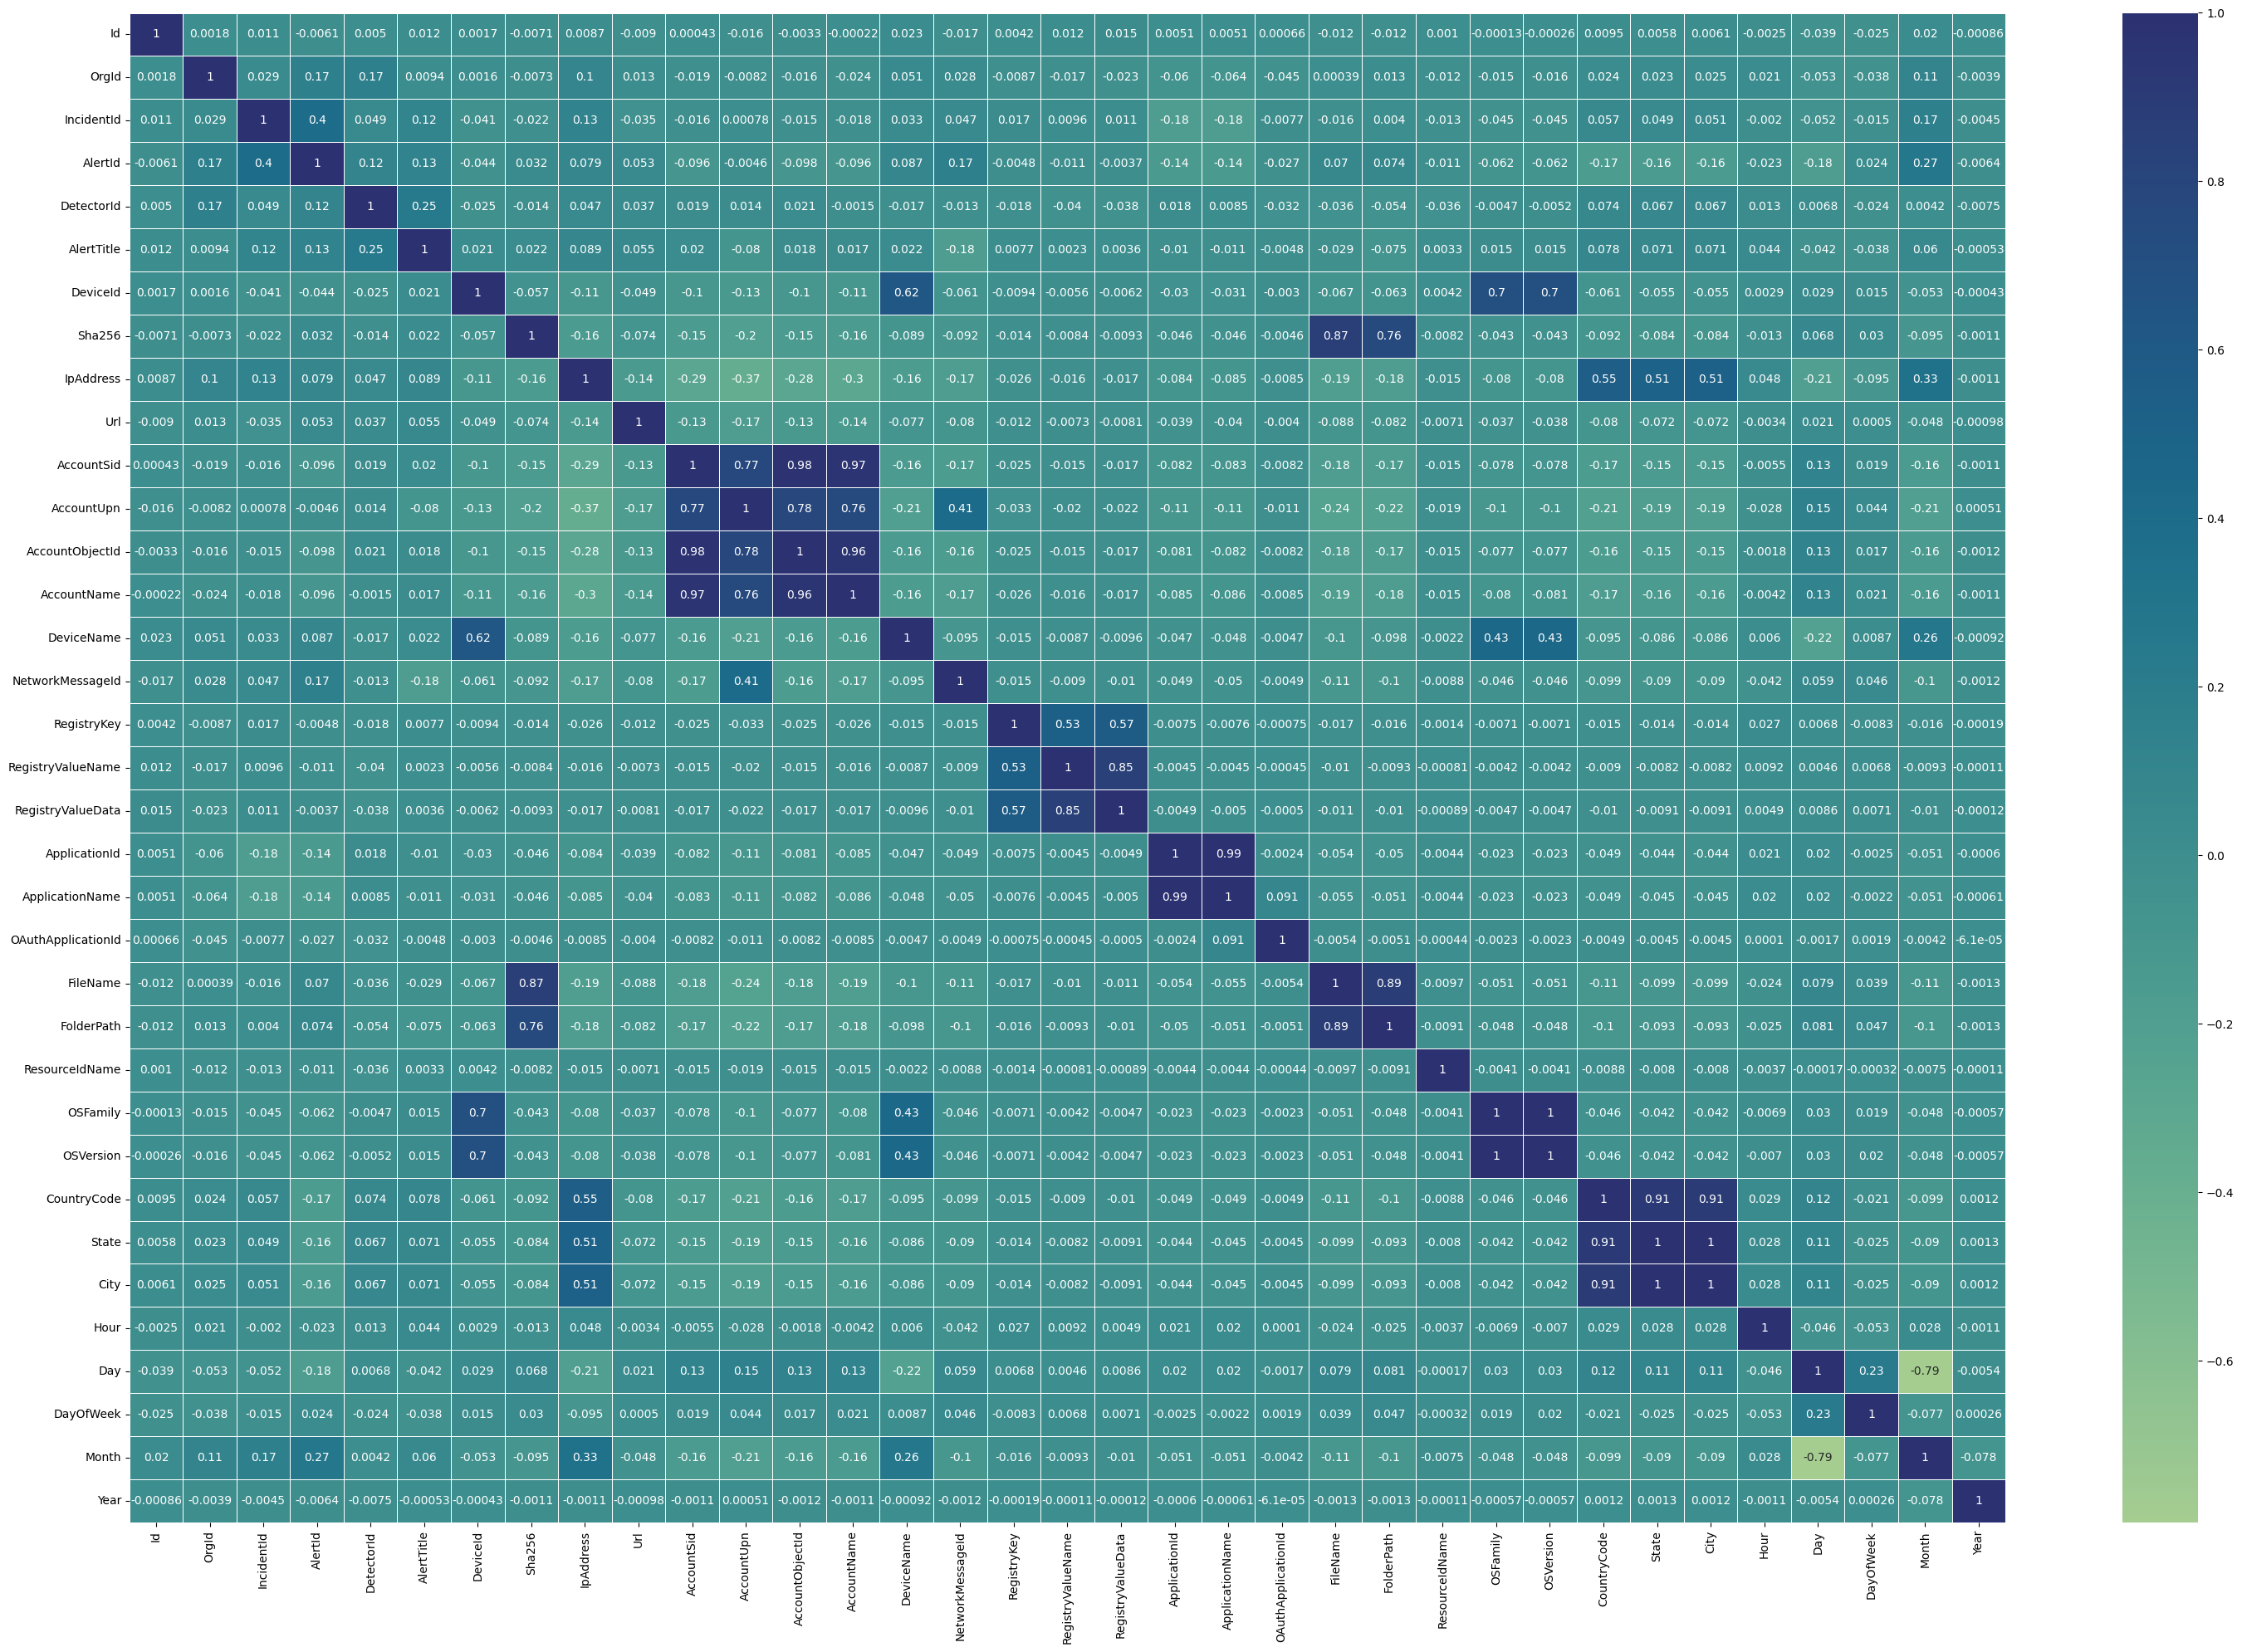

In [175]:
plt.figure(figsize = (30, 20))
sns.heatmap(clean_df[num_features].corr(), cmap = 'crest', annot = True, linewidth = 0.5)
plt.tight_layout()
plt.show()

### **Feature Engineering**

In [176]:
clean_df

Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0        1245540519230    657       11767    87199         524         563   
1        1400159342154      3       91158   632273           2           2   
2        1279900255923    145       32247   131719        2932       10807   
3          60129547292    222       15294   917686           0           0   
4         515396080539    363        7615     5944          27          18   
...                ...    ...         ...      ...         ...         ...   
4147985   171798692464     42         391   638112         135        7322   
4147987   541165881145    262        3017   227156         139         120   
4147988   438086666953   1323       31001   304819         219         196   
4147989  1297080124487     47        3653     7243          57          29   
4147990   627065226886     70        4243    19142           1           1   

                  Category   IncidentGrade         EntityType EvidenceRole  \
0          LateralMovement  BenignPositive               User     Impacted   
1        CommandAndControl  BenignPositive            Machine     Impacted   
2          LateralMovement  BenignPositive            Process      Related   
3            InitialAccess   FalsePositive  CloudLogonSession      Related   
4                Discovery  BenignPositive               User     Impacted   
...                    ...             ...                ...          ...   
4147985            Malware  BenignPositive            Machine     Impacted   
4147987      InitialAccess  BenignPositive               User     Impacted   
4147988      InitialAccess  BenignPositive               User     Impacted   
4147989  CommandAndControl   FalsePositive                 Ip      Related   
4147990      InitialAccess  BenignPositive            Mailbox     Impacted   

         DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0           98799  138268     360606  160396        2610        3699   
1            1239  138268     360606  160396      441377      673934   
2           98799    4296     360606  160396      441377      673934   
3           98799  138268     360606  160396      441377      673934   
4           98799  138268     360606  160396      133549      673934   
...           ...     ...        ...     ...         ...         ...   
4147985         4  138268     360606  160396      441377      673934   
4147987     98799  138268     360606  160396       13354       13012   
4147988     98799  138268     360606  160396       95744      172717   
4147989     98799  138268       1084  160396      441377      673934   
4147990     98799  138268     360606  160396       53146       59351   

         AccountObjectId  AccountName  DeviceName  NetworkMessageId  \
0                 425863          863      153085            529644   
1                 425863       453297        2833            529644   
2                 425863       453297      153085            529644   
3                 425863       453297      153085            529644   
4                 425863       136104      153085            529644   
...                  ...          ...         ...               ...   
4147985           425863       453297           4            529644   
4147987            13489        14567      153085            529644   
4147988            96809       107151      153085            529644   
4147989           425863       453297      153085            529644   
4147990            53421        25428      153085            529644   

         RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  \
0               1631                635                860           2251   
1               1631                635                860           2251   
2               1631                635                860           2251   
3               1631                635                860           2251   
4               1631                635    

In [177]:
# List of features to drop(Highly correlated features, low impact features & some pure identity features like Ids)
features_to_drop = [
    "AccountSid", "AccountUpn", "Sha256", "FolderPath", "RegistryValueName", "OSFamily", "City", "CountryCode", "ApplicationId", "IncidentId",  
    "FileName", "OAuthApplicationId", "ResourceIdName", "RegistryKey", "Id", "AccountObjectId", "AlertId", "NetworkMessageId", "RegistryValueData"
]

test_df = clean_df.copy()
# Drop the selected columns from the dataset
test_df = test_df.drop(columns=features_to_drop)
print("Remaining Features:", len(test_df.columns))
print(test_df.columns)

Remaining Features: 20
Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'DeviceId', 'IpAddress', 'Url',
       'AccountName', 'DeviceName', 'ApplicationName', 'OSVersion', 'State',
       'Hour', 'Day', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')


In [178]:
cat_features = [feature for feature in test_df.columns if test_df[feature].dtype == 'O']
num_features = [feature for feature in test_df.columns if test_df[feature].dtype != 'O']

print("Categorical features", cat_features)
print("Numerical features", num_features)

Categorical features ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
Numerical features ['OrgId', 'DetectorId', 'AlertTitle', 'DeviceId', 'IpAddress', 'Url', 'AccountName', 'DeviceName', 'ApplicationName', 'OSVersion', 'State', 'Hour', 'Day', 'DayOfWeek', 'Month', 'Year']


In [179]:
# Chi-square test
'''
Hypothesis:

Null Hypothesis (H₀): The categorical feature and IncidentGrade are independent (no association).
Alternative Hypothesis (H₁): The categorical feature and IncidentGrade are dependent (significant association exists).
'''
chi2_statistics, chi2_test, p_values = [], [], [] 

for feature in cat_features:
    contingency_table = pd.crosstab(test_df['IncidentGrade'], test_df[feature])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_statistics.append(chi2_stat)
    p_values.append(p_val)
    
    if p_val < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Accept Null Hypothesis')

chi2_result = pd.DataFrame({
    'Categorical Features': cat_features,
    'Chi-2 Statistic': chi2_statistics,
    'p-value': p_values,
    'Hypothesis Result': chi2_test
})

chi2_result = chi2_result.sort_values('Chi-2 Statistic', ascending=False)
chi2_result

Categorical Features  Chi-2 Statistic  p-value       Hypothesis Result
1        IncidentGrade     7.845390e+06      0.0  Reject Null Hypothesis
0             Category     9.533710e+05      0.0  Reject Null Hypothesis
2           EntityType     8.924482e+05      0.0  Reject Null Hypothesis
3         EvidenceRole     1.173275e+05      0.0  Reject Null Hypothesis

In [180]:
# ANOVA
'''
Hypothesis:

Null Hypothesis (H₀): The numerical feature and IncidentGrde are independent (no association).
Alternative Hypothesis (H₁): The numerical feature and IncidentGrde are dependent (significant association exists).
'''
anova_test = []

for feature in num_features:
    groups = [test_df[test_df['IncidentGrade'] == grade][feature].dropna() for grade in test_df['IncidentGrade'].unique()]
    f_stat, p_value = f_oneway(*groups)

    if p_value < 0.05:
        result = 'Reject Null Hypothesis'
    else:
        result = 'Accept Null Hypothesis'
    
    anova_test.append([feature, f_stat, p_value, result])

# Create DataFrame with F-score and p-value
anova_results = pd.DataFrame(anova_test, columns=['Numerical Feature', 'F-score', 'p-value', 'Hypothesis Result'])
anova_results = anova_results.sort_values(by='F-score', ascending=False)
anova_results 

Numerical Feature        F-score       p-value       Hypothesis Result
10             State  178300.262948  0.000000e+00  Reject Null Hypothesis
7         DeviceName   70492.344812  0.000000e+00  Reject Null Hypothesis
12               Day   68748.492555  0.000000e+00  Reject Null Hypothesis
14             Month   54605.350747  0.000000e+00  Reject Null Hypothesis
4          IpAddress   53970.835028  0.000000e+00  Reject Null Hypothesis
0              OrgId   49731.223095  0.000000e+00  Reject Null Hypothesis
2         AlertTitle   43509.364050  0.000000e+00  Reject Null Hypothesis
1         DetectorId   33749.238954  0.000000e+00  Reject Null Hypothesis
6        AccountName   22266.847297  0.000000e+00  Reject Null Hypothesis
5                Url   21630.162302  0.000000e+00  Reject Null Hypothesis
3           DeviceId   17029.476059  0.000000e+00  Reject Null Hypothesis
9          OSVersion   10762.427716  0.000000e+00  Reject Null Hypothesis
11              Hour    8429.718354  0.000000e+00  Reject Null Hypothesis
13         DayOfWeek    3573.147200  0.000000e+00  Reject Null Hypothesis
8    ApplicationName     999.354643  0.000000e+00  Reject Null Hypothesis
15              Year      15.240447  2.405381e-07  Reject Null Hypothesis

In [181]:
def feature_engineer(df):

    feature_engineered_df = df.copy() 
    # --- 1. Group Categories ---
    top_categories = feature_engineered_df['Category'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedCategory'] = feature_engineered_df['Category'].apply(lambda x: x if x in top_categories else 'Other')

    # --- 2. Group EntityTypes ---
    top_entity_types = feature_engineered_df['EntityType'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedEntityType'] = feature_engineered_df['EntityType'].apply(lambda x: x if x in top_entity_types else 'Other')

    # --- 3. Binary feature: IsImpacted (from EvidenceRole) ---
    feature_engineered_df['IsImpacted'] = (feature_engineered_df['EvidenceRole'] == 'Impacted').astype(int)

    # --- 4. Group AlertTitles ---
    top_alert_titles = feature_engineered_df['AlertTitle'].value_counts().nlargest(10).index
    feature_engineered_df['GroupedAlertTitle'] = feature_engineered_df['AlertTitle'].apply(lambda x: x if x in top_alert_titles else 11)

    # --- 5. Time-based features from timestamp ---
    feature_engineered_df['IsWeekend'] = feature_engineered_df['DayOfWeek'].isin([5, 6]).astype(int)
    feature_engineered_df['IsBusinessHour'] = feature_engineered_df['Hour'].between(9, 18).astype(int)

    # --- 6. Create flags for dominant values in geographical columns ---
    feature_engineered_df['IsMajorState'] = (feature_engineered_df['State'] == 1445).astype(int)

    # --- 7. OS-based features ---
    feature_engineered_df['IsOSVersion66'] = (feature_engineered_df['OSVersion'] == 66).astype(int)
    
    feature_engineered_df = feature_engineered_df.drop(columns=['Category', 'EntityType', 'EvidenceRole', 'AlertTitle', 'State', 'OSVersion'])

    return feature_engineered_df

fe_test_df = feature_engineer(test_df)
fe_test_df

OrgId  DetectorId   IncidentGrade  DeviceId  IpAddress     Url  \
0          657         524  BenignPositive     98799     360606  160396   
1            3           2  BenignPositive      1239     360606  160396   
2          145        2932  BenignPositive     98799     360606  160396   
3          222           0   FalsePositive     98799     360606  160396   
4          363          27  BenignPositive     98799     360606  160396   
...        ...         ...             ...       ...        ...     ...   
4147985     42         135  BenignPositive         4     360606  160396   
4147987    262         139  BenignPositive     98799     360606  160396   
4147988   1323         219  BenignPositive     98799     360606  160396   
4147989     47          57   FalsePositive     98799       1084  160396   
4147990     70           1  BenignPositive     98799     360606  160396   

         AccountName  DeviceName  ApplicationName  Hour  Day  DayOfWeek  \
0                863      153085             3421    22    4          1   
1             453297        2833             3421    12    3          0   
2             453297      153085             3421     3    8          5   
3             453297      153085             3421    12   12          2   
4             136104      153085             3421    17    6          3   
...              ...         ...              ...   ...  ...        ...   
4147985       453297           4             3421    20    3          0   
4147987        14567      153085             3421     3    4          1   
4147988       107151      153085             3421    19    4          1   
4147989       453297      153085             3421     0   15          5   
4147990        25428      153085             3421    16   11          1   

         Month  Year    GroupedCategory  GroupedEntityType  IsImpacted  \
0            6  2024              Other               User           1   
1            6  2024  CommandAndControl            Machine           1   
2            6  2024              Other            Process           0   
3            6  2024      InitialAccess  CloudLogonSession           0   
4            6  2024          Discovery               User           1   
...        ...   ...                ...                ...         ...   
4147985      6  2024            Malware            Machine           1   
4147987      6  2024      InitialAccess               User           1   
4147988      6  2024      InitialAccess               User           1   
4147989      6  2024  CommandAndControl                 Ip           0   
4147990      6  2024      InitialAccess            Mailbox           1   

         GroupedAlertTitle  IsWeekend  IsBusinessHour  IsMajorState  \
0                       11          0               0             1   
1                        2          0               1             1   
2                       11          1               0             1   
3                        0          0               1             1   
4                       11          0               1             1   
...                    ...        ...             ...           ...   
4147985                 11          0               0             1   
4147987                 11          0               0             1   
4147988                 11          0               0             1   
4147989                 11          1               0             1   
4147990                  1          0               1             1   

         IsOSVersion66  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  
...                ...  
4147985              0  
4147987              1  
4147988              1  
4147989              1  
4147990              1  

[3922695 rows x 22 columns]

In [182]:
fe_test_df.nunique()

OrgId                  4400
DetectorId             5970
IncidentGrade             3
DeviceId              46260
IpAddress            173786
Url                   65600
AccountName          222314
DeviceName            74791
ApplicationName        1514
Hour                     24
Day                      31
DayOfWeek                 7
Month                     8
Year                      2
GroupedCategory          11
GroupedEntityType        11
IsImpacted                2
GroupedAlertTitle        11
IsWeekend                 2
IsBusinessHour            2
IsMajorState              2
IsOSVersion66             2
dtype: int64

In [183]:
FE_cat_features = [feature for feature in fe_test_df.columns if fe_test_df[feature].dtype == 'O']
FE_num_features = [feature for feature in fe_test_df.columns if fe_test_df[feature].dtype != 'O']

print(f"Categorical features: {len(FE_cat_features)} - {FE_cat_features}")
print(f"Numerical features: {len(FE_num_features)} - {FE_num_features}")

Categorical features: 3 - ['IncidentGrade', 'GroupedCategory', 'GroupedEntityType']
Numerical features: 19 - ['OrgId', 'DetectorId', 'DeviceId', 'IpAddress', 'Url', 'AccountName', 'DeviceName', 'ApplicationName', 'Hour', 'Day', 'DayOfWeek', 'Month', 'Year', 'IsImpacted', 'GroupedAlertTitle', 'IsWeekend', 'IsBusinessHour', 'IsMajorState', 'IsOSVersion66']


In [184]:
columns_to_encode = ['GroupedCategory', 'GroupedEntityType']
label_encoders_test = {} # Dictionary to store encoders for each column

for column in columns_to_encode:
    le_test = LabelEncoder()
    fe_test_df[column] = le_test.fit_transform(fe_test_df[column])  
    label_encoders_test[column] = le_test  # Store encoder for this column

In [185]:
fe_test_df

OrgId  DetectorId   IncidentGrade  DeviceId  IpAddress     Url  \
0          657         524  BenignPositive     98799     360606  160396   
1            3           2  BenignPositive      1239     360606  160396   
2          145        2932  BenignPositive     98799     360606  160396   
3          222           0   FalsePositive     98799     360606  160396   
4          363          27  BenignPositive     98799     360606  160396   
...        ...         ...             ...       ...        ...     ...   
4147985     42         135  BenignPositive         4     360606  160396   
4147987    262         139  BenignPositive     98799     360606  160396   
4147988   1323         219  BenignPositive     98799     360606  160396   
4147989     47          57   FalsePositive     98799       1084  160396   
4147990     70           1  BenignPositive     98799     360606  160396   

         AccountName  DeviceName  ApplicationName  Hour  Day  DayOfWeek  \
0                863      153085             3421    22    4          1   
1             453297        2833             3421    12    3          0   
2             453297      153085             3421     3    8          5   
3             453297      153085             3421    12   12          2   
4             136104      153085             3421    17    6          3   
...              ...         ...              ...   ...  ...        ...   
4147985       453297           4             3421    20    3          0   
4147987        14567      153085             3421     3    4          1   
4147988       107151      153085             3421    19    4          1   
4147989       453297      153085             3421     0   15          5   
4147990        25428      153085             3421    16   11          1   

         Month  Year  GroupedCategory  GroupedEntityType  IsImpacted  \
0            6  2024                8                 10           1   
1            6  2024                0                  4           1   
2            6  2024                8                  8           0   
3            6  2024                6                  1           0   
4            6  2024                2                 10           1   
...        ...   ...              ...                ...         ...   
4147985      6  2024                7                  4           1   
4147987      6  2024                6                 10           1   
4147988      6  2024                6                 10           1   
4147989      6  2024                0                  3           0   
4147990      6  2024                6                  6           1   

         GroupedAlertTitle  IsWeekend  IsBusinessHour  IsMajorState  \
0                       11          0               0             1   
1                        2          0               1             1   
2                       11          1               0             1   
3                        0          0               1             1   
4                       11          0               1             1   
...                    ...        ...             ...           ...   
4147985                 11          0               0             1   
4147987                 11          0               0             1   
4147988                 11          0               0             1   
4147989                 11          1               0             1   
4147990                  1          0               1             1   

         IsOSVersion66  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  
...                ...  
4147985              0  
4147987              1  
4147988              1  
4147989              1  
4147990              1  

[3922695 rows x 22 columns]

In [186]:
# Cleaned Dataset
fe_test_df.to_csv(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Processed\Test_DS_Cleaned.csv", index=False)